In [2]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/Users/vishalbrahmananda/Documents/Capstone UIC BaseBall/kansas_university.csv')

# Display the first few rows, data types, and check for missing values
data_info = data.info()
first_rows = data.head()

data_info, first_rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5332 entries, 0 to 5331
Columns: 167 entries, PitchNo to CatcherThrowLocationConfidence
dtypes: float64(109), int64(14), object(44)
memory usage: 6.8+ MB


(None,
    PitchNo        Date         Time  PAofInning  PitchofPA  \
 0        1  2023-04-21  18:00:52.90           1          1   
 1        2  2023-04-21  18:01:08.50           1          2   
 2        3  2023-04-21  18:01:23.47           1          3   
 3        4  2023-04-21  18:01:39.47           1          4   
 4        5  2023-04-21  18:01:56.26           1          5   
 
                Pitcher   PitcherId PitcherThrows PitcherTeam         Batter  \
 0  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
 1  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
 2  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
 3  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
 4  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
 
    ...  ThrowTrajectoryZc1 ThrowTrajectoryZc2 PitchReleaseConfidence  \
 0  ...                 NaN                NaN            

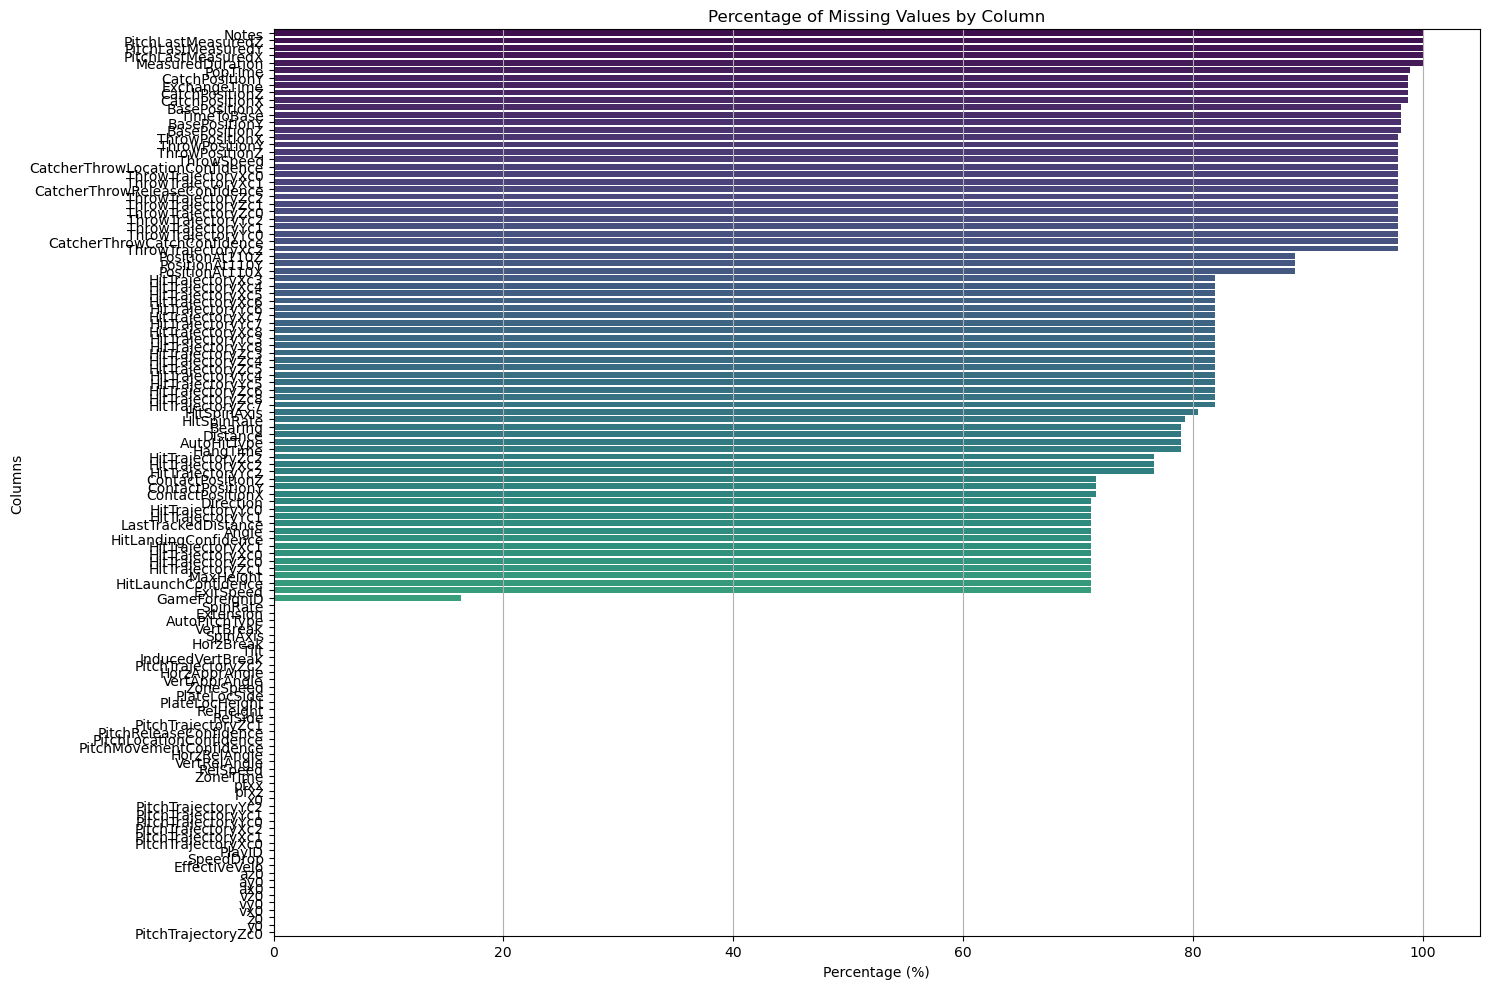

In [3]:
# Missing Values Analysis

# Calculate the percentage of missing values for each column
missing_values = (data.isnull().sum() / len(data)) * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

# Visualize the missing values
plt.figure(figsize=(15, 10))
sns.barplot(y=missing_values.index, x=missing_values.values, palette="viridis")
plt.title('Percentage of Missing Values by Column')
plt.xlabel('Percentage (%)')
plt.ylabel('Columns')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

In [4]:
# 1. Removing Columns with High Missing Values

# Define a threshold for removal (e.g., columns with more than 80% missing values)
threshold = 80

# Columns to be removed
columns_to_remove = missing_values[missing_values > threshold].index

# Drop these columns from the dataset
cleaned_data = data.drop(columns=columns_to_remove)

# Checking the shape of the cleaned data
cleaned_data.shape

(5332, 115)

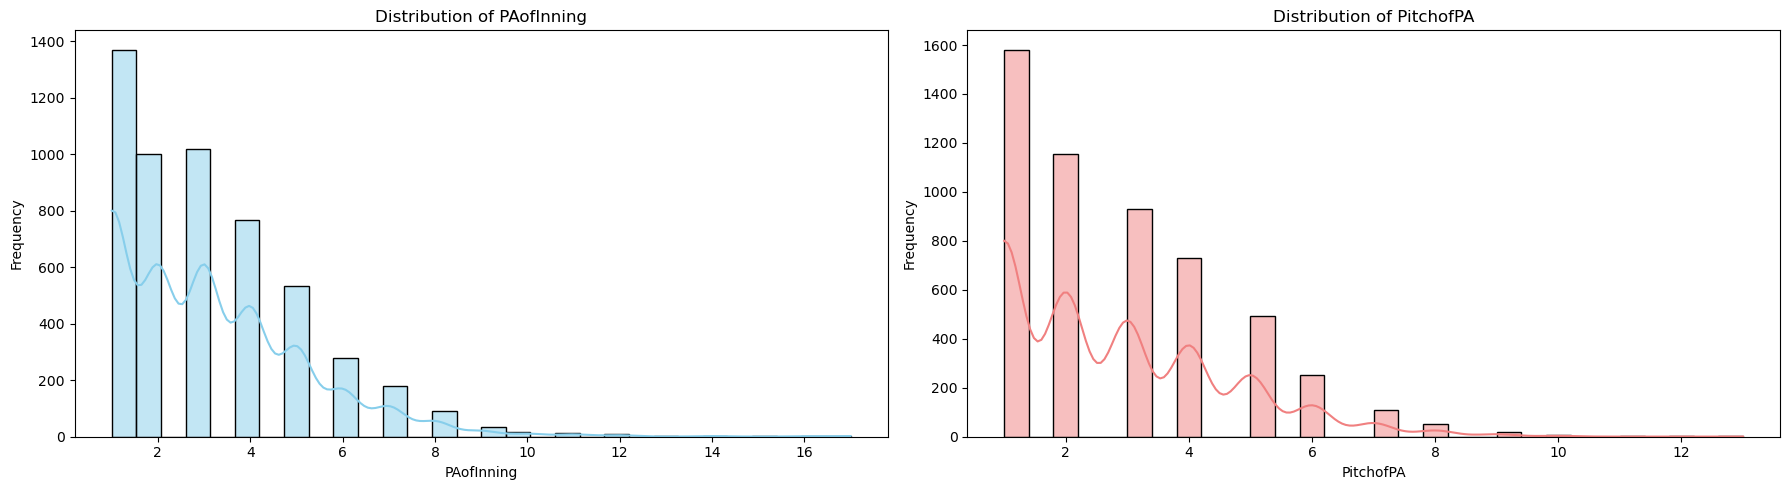

In [6]:
# Visualization of distribution for key numerical columns

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Distribution of PAofInning
sns.histplot(cleaned_data['PAofInning'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of PAofInning')
axes[0].set_xlabel('PAofInning')
axes[0].set_ylabel('Frequency')

# Distribution of PitchofPA
sns.histplot(cleaned_data['PitchofPA'], bins=30, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Distribution of PitchofPA')
axes[1].set_xlabel('PitchofPA')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


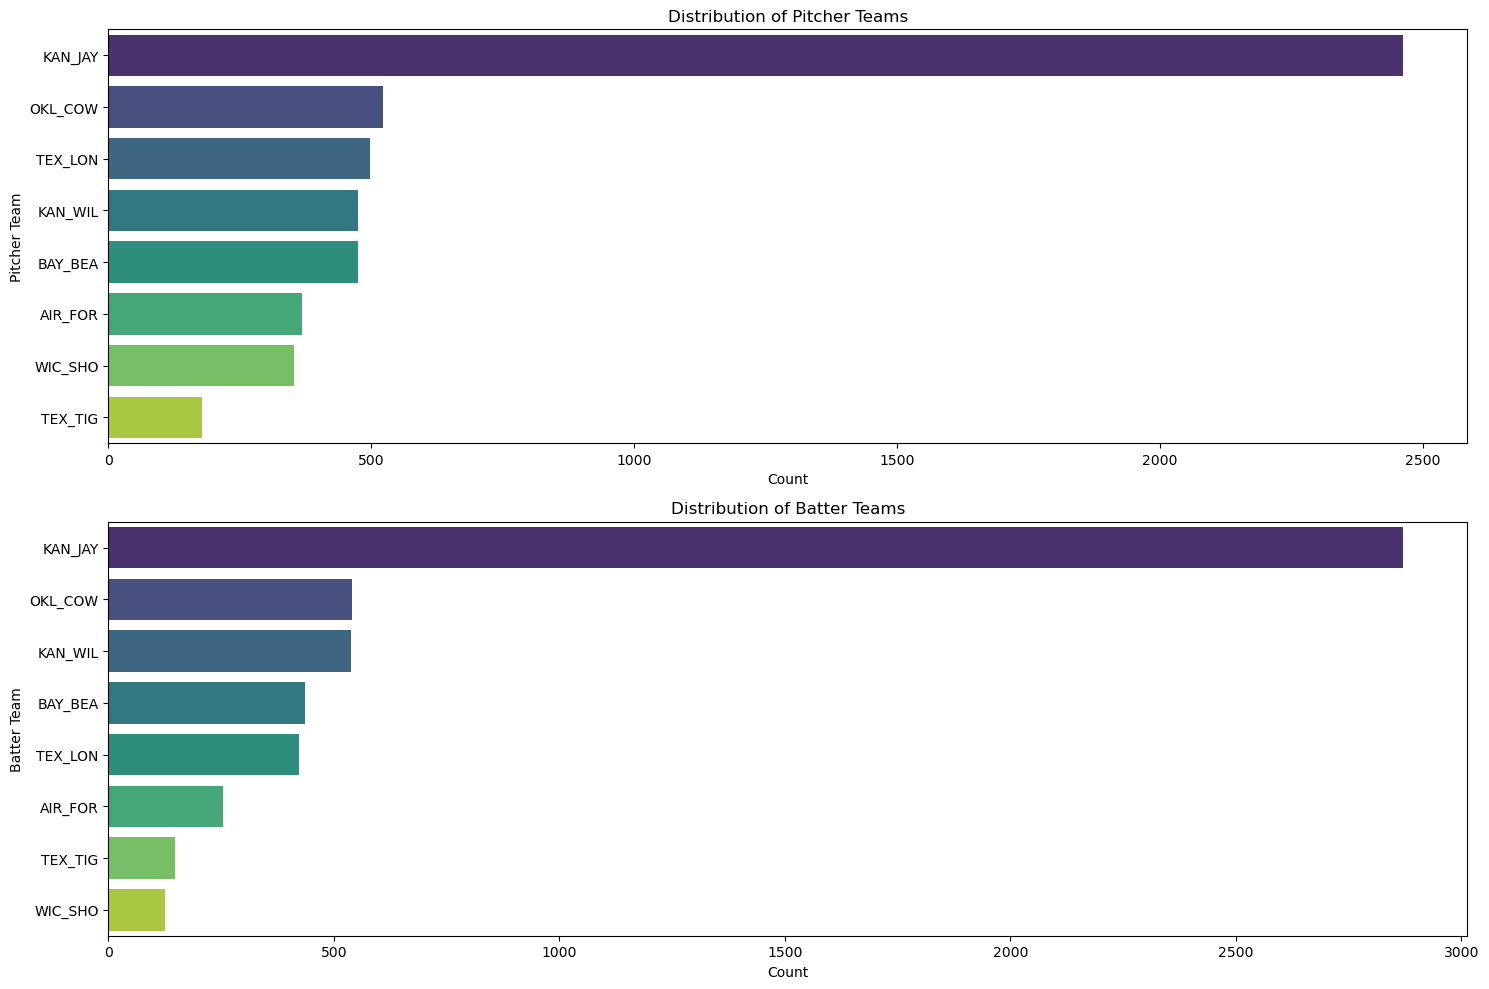

In [7]:
# Visualization of distribution for key categorical columns

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Distribution of PitcherTeam
sns.countplot(y=cleaned_data['PitcherTeam'], ax=axes[0], palette="viridis", order=cleaned_data['PitcherTeam'].value_counts().index)
axes[0].set_title('Distribution of Pitcher Teams')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Pitcher Team')

# Distribution of BatterTeam
sns.countplot(y=cleaned_data['BatterTeam'], ax=axes[1], palette="viridis", order=cleaned_data['BatterTeam'].value_counts().index)
axes[1].set_title('Distribution of Batter Teams')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Batter Team')

plt.tight_layout()
plt.show()


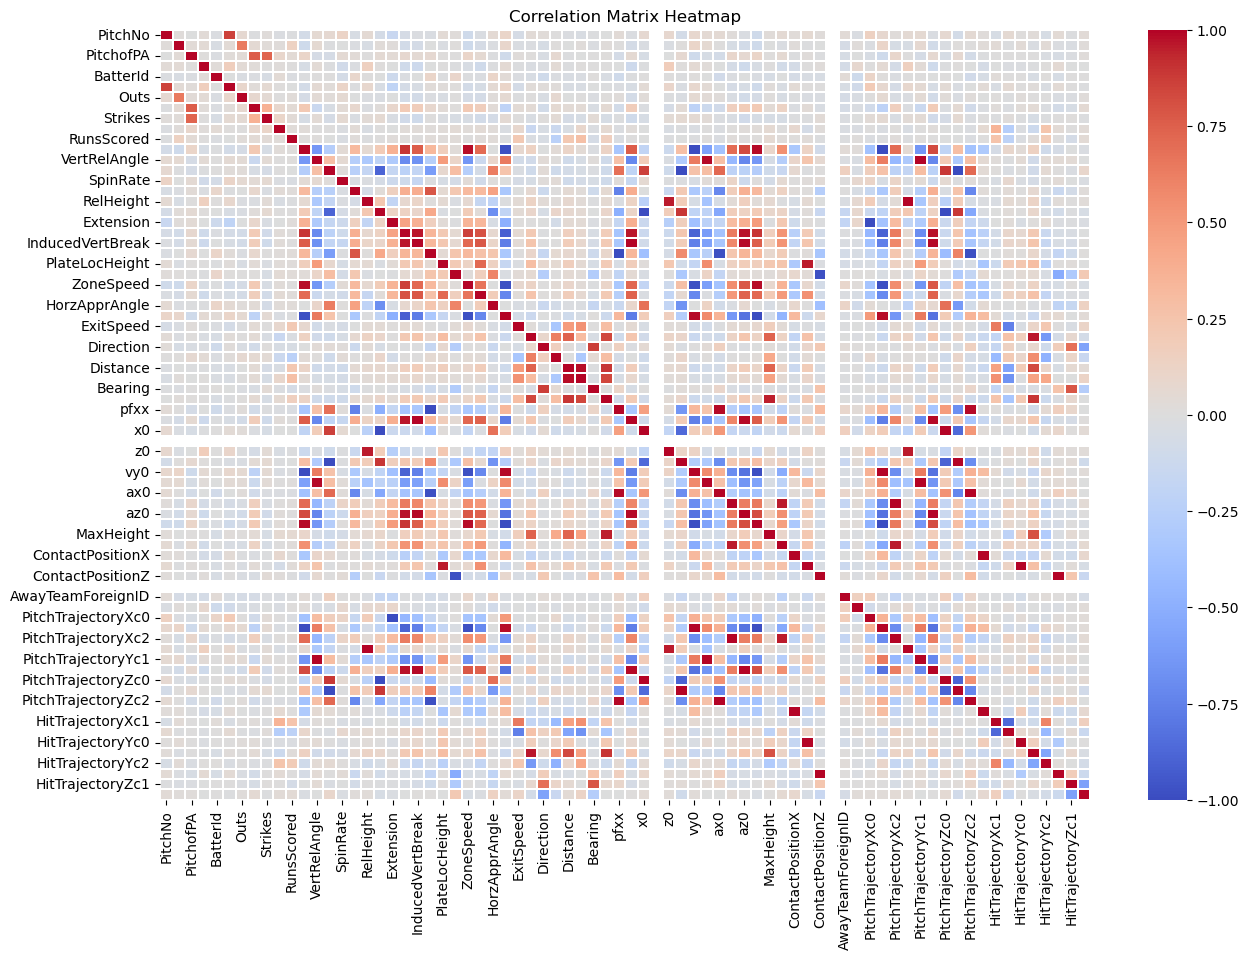

In [8]:
# Correlation analysis for numerical columns
correlation_matrix = cleaned_data.corr()

# Display the heatmap for correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.1)
plt.title('Correlation Matrix Heatmap')
plt.show()


### The heatmap presents the correlation matrix for the numerical columns in the dataset:

#### Darker red regions indicate strong positive correlations between columns.
#### Darker blue regions denote strong negative correlations between columns.
#### Lighter shades (near white) signify weak or negligible correlations.

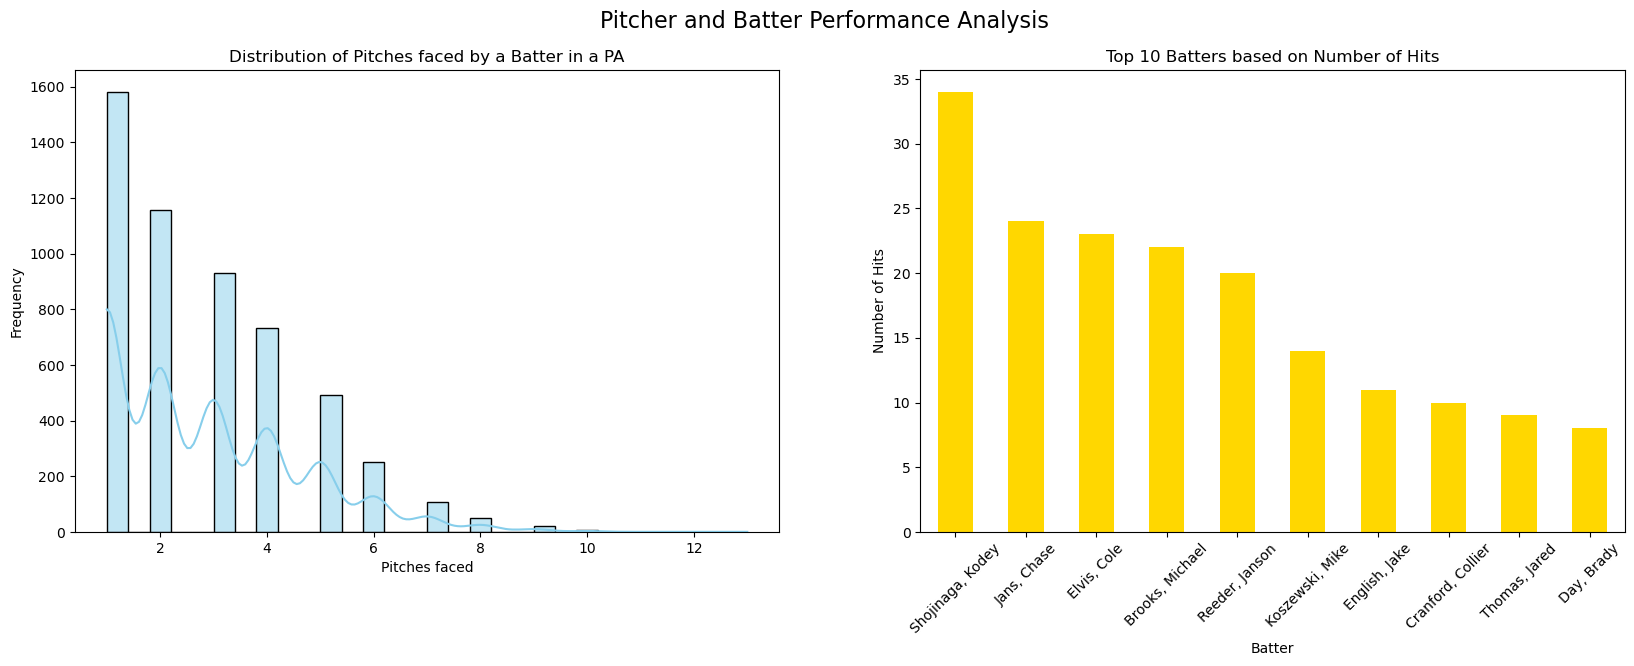

In [12]:
# Recreate the 'IsHit' column based on 'PlayResult'
hit_terms = ["Single", "Double", "Triple", "HomeRun"]
cleaned_data['IsHit'] = cleaned_data['PlayResult'].isin(hit_terms).astype(int)

# Recompute top batters based on number of hits
top_batters = cleaned_data[cleaned_data['IsHit'] == 1]['Batter'].value_counts().head(10)

# Setting up the subplots and visualizing again
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Pitcher and Batter Performance Analysis', fontsize=16)

# Distribution of 'PitchofPA' (Pitches faced by a Batter in a Plate Appearance)
sns.histplot(data=cleaned_data, x='PitchofPA', kde=True, ax=axes[0], color='skyblue', bins=30)
axes[0].set_title('Distribution of Pitches faced by a Batter in a PA')
axes[0].set_xlabel('Pitches faced')
axes[0].set_ylabel('Frequency')

# Top 10 batters based on number of hits
top_batters.plot(kind='bar', ax=axes[1], color='gold')
axes[1].set_title('Top 10 Batters based on Number of Hits')
axes[1].set_xlabel('Batter')
axes[1].set_ylabel('Number of Hits')
axes[1].tick_params(axis='x', rotation=45)



In [13]:
# Checking available columns in the cleaned dataset
available_columns = cleaned_data.columns

available_columns


Index(['PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher',
       'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter',
       ...
       'HitTrajectoryYc2', 'HitTrajectoryZc0', 'HitTrajectoryZc1',
       'HitTrajectoryZc2', 'PitchReleaseConfidence', 'PitchLocationConfidence',
       'PitchMovementConfidence', 'HitLaunchConfidence',
       'HitLandingConfidence', 'IsHit'],
      dtype='object', length=116)

In [14]:
# Filter out rows where BatterTeam is KAN_JAY
kan_jay_batters = data[data['BatterTeam'] == 'KAN_JAY']

# Group by Batter and opposing Pitcher to get counts of relevant statistics
grouped_data = kan_jay_batters.groupby(['Batter', 'Pitcher']).agg({
    'TaggedPitchType': 'count',
    'TaggedHitType': lambda x: x[x.notnull()].count(),
    'PitchCall': lambda x: (x == 'StrikeCalled').sum()
}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['Batter', 'Pitcher', 'TotalPitches', 'TotalHits', 'TotalStrikes']

grouped_data.head()

Batter        Pitcher  TotalPitches  TotalHits  TotalStrikes
0      Baker, Jake  Shuger, Jason             5          5             1
1      Baker, Jake  Wilson, Brody             4          4             2
2  Brooks, Michael     Abram, Ben            14         14             2
3  Brooks, Michael  Benge, Carson            10         10             3
4  Brooks, Michael  Boerema, Owen            24         24             8

In [15]:
# Filter the dataset for "KAN_JAY" batters
kan_jay_batters = cleaned_data[cleaned_data['BatterTeam'] == 'KAN_JAY']

# Define hit types
hit_types = ['GroundBall', 'FlyBall', 'LineDrive', 'Popup', 'Bunt']

# Calculate hits based on the refined definition
refined_hits = kan_jay_batters.groupby('Batter')['TaggedHitType'].apply(lambda x: x.isin(hit_types).sum())

# Calculate at-bats for each player (total number of rows for each player)
at_bats = kan_jay_batters['Batter'].value_counts()

# Calculate refined batting averages
refined_batting_averages = refined_hits / at_bats

# Sort the refined batting averages in descending order
refined_batting_averages = refined_batting_averages.sort_values(ascending=False)

refined_batting_averages


Shojinaga, Kodey     0.249042
Reeder, Janson       0.191126
Cranford, Collier    0.182243
Kline, Jackson       0.175573
Gerety, Tyler        0.164179
Kelly, Cooper        0.162500
Leto, Luke           0.156250
Jans, Chase          0.152672
Elvis, Cole          0.144654
Brooks, Michael      0.141914
Hunt, Sam            0.141176
English, Jake        0.137652
Cobb, Jackson        0.115385
Koszewski, Mike      0.092857
Baker, Jake          0.000000
dtype: float64

/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/1096919606.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_batters['Date'] = pd.to_datetime(kan_jay_batters['Date'])


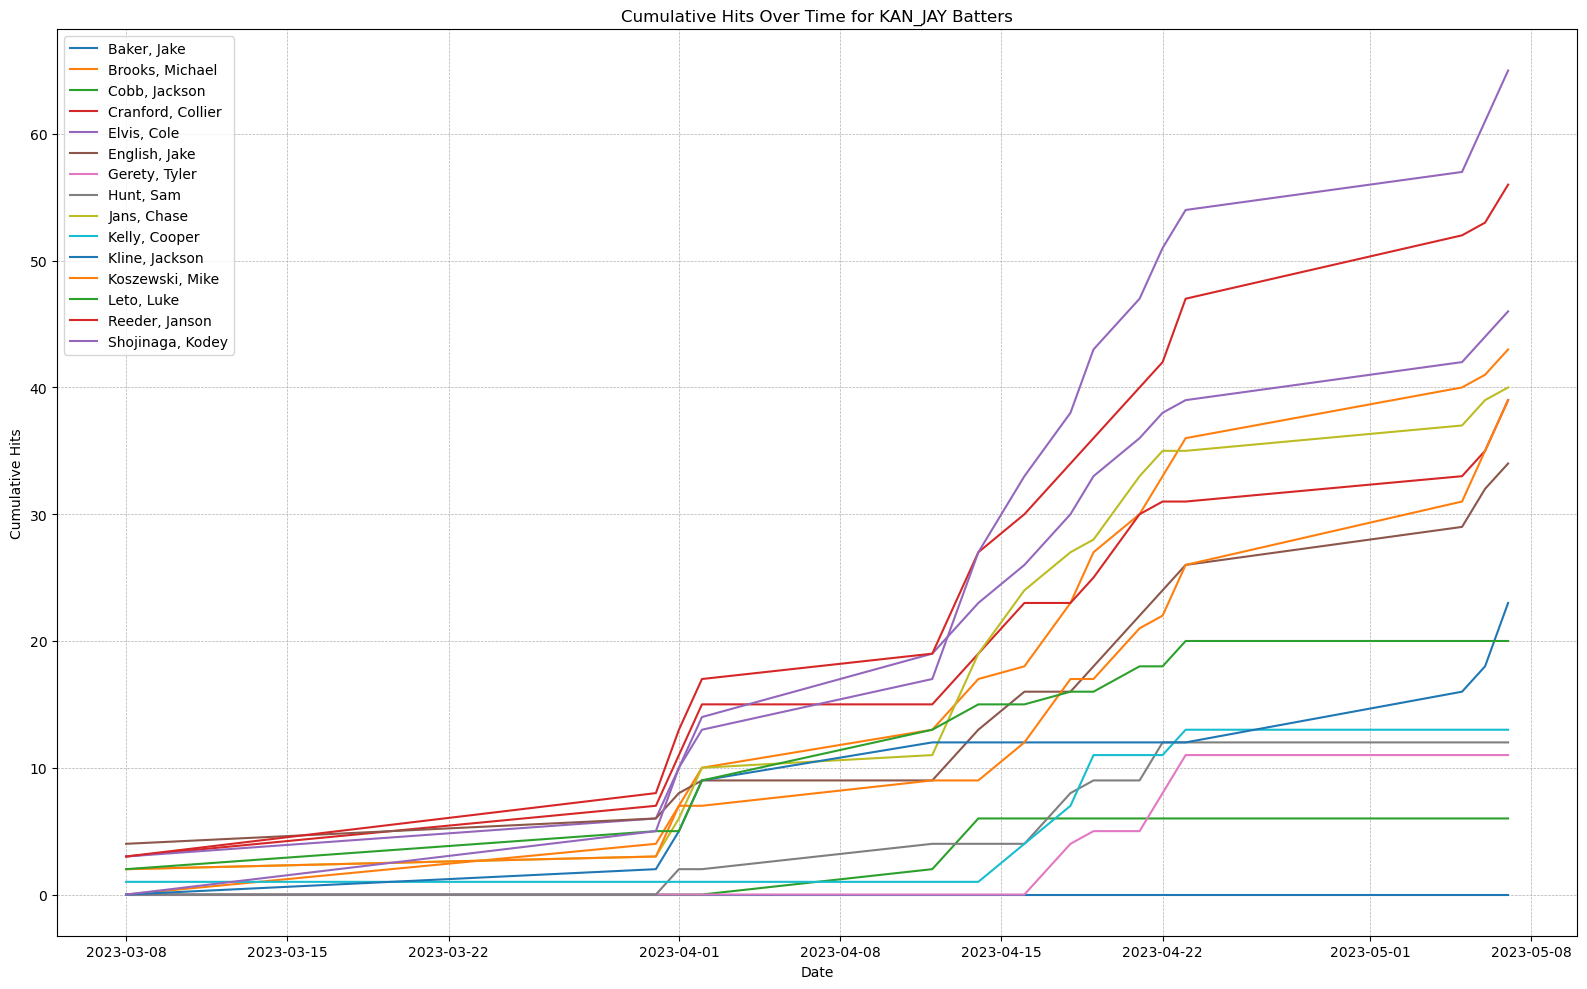

In [16]:
# Calculate cumulative hits over time for each key batter
kan_jay_batters['Date'] = pd.to_datetime(kan_jay_batters['Date'])
cumulative_hits = kan_jay_batters.groupby(['Batter', 'Date'])['TaggedHitType'].apply(lambda x: x.isin(hit_types).sum()).groupby(level=0).cumsum().reset_index()
cumulative_hits = cumulative_hits.pivot(index='Date', columns='Batter', values='TaggedHitType').fillna(method='ffill').fillna(0)

# Plot the cumulative hits over time for each key batter
plt.figure(figsize=(16, 10))
for batter in cumulative_hits.columns:
    plt.plot(cumulative_hits.index, cumulative_hits[batter], label=batter)

plt.title("Cumulative Hits Over Time for KAN_JAY Batters")
plt.xlabel("Date")
plt.ylabel("Cumulative Hits")
plt.legend(loc="upper left")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [113]:
# Calculating individual batting averages and the total team batting average for the KAN_JAY team.

# Filtering the dataset for the KAN_JAY team
kan_jay_batters = data[data['BatterTeam'] == 'KAN_JAY']

# Criteria for at-bats and hits
hits_criteria = kan_jay_batters['PlayResult'].isin(['Single', 'Double', 'Triple', 'HomeRun'])
at_bats_criteria = ~kan_jay_batters['PlayResult'].isin(['Walk', 'HitByPitch', 'Sacrifice', 'Undefined']) & \
                   ~kan_jay_batters['PitchCall'].isin(['BallCalled', 'HitByPitch', 'Undefined'])

# Calculating individual batting averages
individual_batting_averages = kan_jay_batters[hits_criteria].groupby('Batter')['PlayResult'].count() / kan_jay_batters[at_bats_criteria].groupby('Batter')['PlayResult'].count()

# Calculating total team batting average
total_hits = kan_jay_batters[hits_criteria]['PlayResult'].count()
total_at_bats = kan_jay_batters[at_bats_criteria]['PlayResult'].count()
total_team_batting_average = total_hits / total_at_bats if total_at_bats > 0 else 0

# Displaying individual batting averages and total team batting average
individual_batting_averages, total_team_batting_average



(Batter
 Brooks, Michael      0.511628
 Cobb, Jackson        0.166667
 Cranford, Collier    0.238095
 Elvis, Cole          0.511111
 English, Jake        0.333333
 Gerety, Tyler        0.272727
 Hunt, Sam            0.363636
 Jans, Chase          0.600000
 Kelly, Cooper        0.307692
 Kline, Jackson       0.318182
 Koszewski, Mike      0.358974
 Leto, Luke           0.400000
 Reeder, Janson       0.370370
 Shojinaga, Kodey     0.531250
 Name: PlayResult, dtype: float64,
 0.417607223476298)

/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/3086839565.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  individual_batting_averages = individual_batting_averages.append(pd.Series(total_team_batting_average, index=['Total Team Average']))


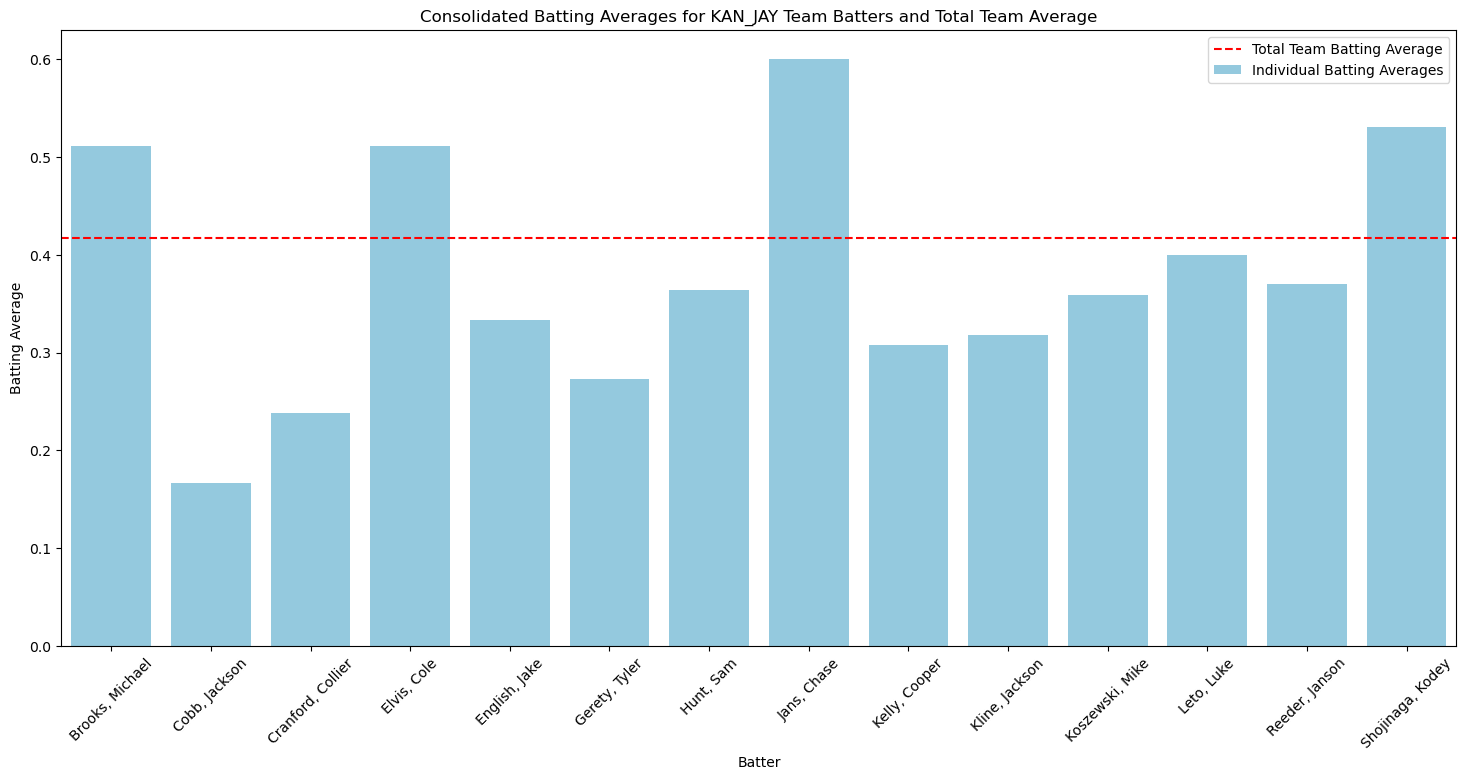

In [115]:
# Re-adding the total team batting average to the DataFrame for visualization, ensuring it's correctly included
individual_batting_averages = individual_batting_averages.append(pd.Series(total_team_batting_average, index=['Total Team Average']))

# Removing the total team average from the individual batting averages for separate plotting
individual_batting_averages_excluding_team = individual_batting_averages.drop('Total Team Average')

# Setting up the plot
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)
plt.title("Consolidated Batting Averages for KAN_JAY Team Batters and Total Team Average")

# Plotting individual batting averages
sns.barplot(x=individual_batting_averages_excluding_team.index, y=individual_batting_averages_excluding_team.values, color='skyblue', label='Individual Batting Averages')

# Plotting total team batting average
plt.axhline(y=total_team_batting_average, color='red', linestyle='--', label='Total Team Batting Average')

# Adding legend, labels, and annotations
plt.legend()
plt.ylabel('Batting Average')
plt.xlabel('Batter')

# Show the plot
plt.show()


### On-Base Percentage (OBP): This metric gives us an idea of how often a batter reaches base for any reason other than a fielding error, fielder's choice, dropped/uncaught third strike, fielder's obstruction, or catcher's interference. 

### Slugging Percentage (SLG): This metric gives us an idea of a player's power-hitting ability. It's calculated as total bases divided by at-bats.

In [18]:
# Calculate components for OBP
hits_obp = kan_jay_batters.groupby('Batter')['TaggedHitType'].apply(lambda x: x.isin(hit_types).sum())
walks = kan_jay_batters.groupby('Batter')['KorBB'].apply(lambda x: (x == 'Walk').sum())

# Calculate OBP for each batter
on_base_percentage = (hits_obp + walks) / at_bats

# Sort OBP in descending order
on_base_percentage = on_base_percentage.sort_values(ascending=False)

on_base_percentage


Shojinaga, Kodey     0.272031
Gerety, Tyler        0.238806
Reeder, Janson       0.215017
Kline, Jackson       0.213740
Kelly, Cooper        0.212500
Cranford, Collier    0.196262
Brooks, Michael      0.188119
Jans, Chase          0.187023
English, Jake        0.182186
Hunt, Sam            0.176471
Cobb, Jackson        0.173077
Leto, Luke           0.171875
Elvis, Cole          0.166667
Koszewski, Mike      0.111905
Baker, Jake          0.111111
dtype: float64

In [81]:
# Calculating Batting Average and On-Base Percentage for each KAN_JAY batter

# Filtering to include only KAN_JAY batters
kan_jay_batters = data[data['BatterTeam'] == 'KAN_JAY']

# Identifying hits from PlayResult
hits = kan_jay_batters['PlayResult'].isin(['Single', 'Double', 'Triple', 'HomeRun'])

# Approximating At Bats (excluding walks, hit by pitch, sacrifices, and undefined plays)
at_bats = ~kan_jay_batters['PlayResult'].isin(['Walk', 'HitByPitch', 'Sacrifice', 'Undefined']) & \
          ~kan_jay_batters['PitchCall'].isin(['BallCalled', 'HitByPitch', 'Undefined'])

# Walks and Hit By Pitch
walks = kan_jay_batters['PitchCall'] == 'BallCalled'
hit_by_pitch = kan_jay_batters['PitchCall'] == 'HitByPitch'

# Calculating Batting Average (BA)
batting_average = kan_jay_batters.groupby('Batter').apply(lambda x: x[hits].shape[0] / x[at_bats].shape[0] if x[at_bats].shape[0] > 0 else 0)

# Calculating On-Base Percentage (OBP)
on_base_percentage = kan_jay_batters.groupby('Batter').apply(lambda x: (x[hits].shape[0] + x[walks].shape[0] + x[hit_by_pitch].shape[0]) / 
                                                               (x[at_bats].shape[0] + x[walks].shape[0] + x[hit_by_pitch].shape[0]) 
                                                               if (x[at_bats].shape[0] + x[walks].shape[0] + x[hit_by_pitch].shape[0]) > 0 else 0)

batting_average, on_base_percentage

/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2913106397.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  batting_average = kan_jay_batters.groupby('Batter').apply(lambda x: x[hits].shape[0] / x[at_bats].shape[0] if x[at_bats].shape[0] > 0 else 0)
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2913106397.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if (x[at_bats].shape[0] + x[walks].shape[0] + x[hit_by_pitch].shape[0]) > 0 else 0)
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2913106397.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  on_base_percentage = kan_jay_batters.groupby('Batter').apply(lambda x: (x[hits].shape[0] + x[walks].shape[0] + x[hit_by_pitch].shape[0]) /
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2913106397.py:22: UserWarning: Boolean Series key will be reindexed to match DataFrame inde

(Batter
 Baker, Jake          0.000000
 Brooks, Michael      0.511628
 Cobb, Jackson        0.166667
 Cranford, Collier    0.238095
 Elvis, Cole          0.511111
 English, Jake        0.333333
 Gerety, Tyler        0.272727
 Hunt, Sam            0.363636
 Jans, Chase          0.600000
 Kelly, Cooper        0.307692
 Kline, Jackson       0.318182
 Koszewski, Mike      0.358974
 Leto, Luke           0.400000
 Reeder, Janson       0.370370
 Shojinaga, Kodey     0.531250
 dtype: float64,
 Batter
 Baker, Jake          1.000000
 Brooks, Michael      0.881356
 Cobb, Jackson        0.821429
 Cranford, Collier    0.721739
 Elvis, Cole          0.867470
 English, Jake        0.842857
 Gerety, Tyler        0.794872
 Hunt, Sam            0.854167
 Jans, Chase          0.890411
 Kelly, Cooper        0.795455
 Kline, Jackson       0.819277
 Koszewski, Mike      0.812030
 Leto, Luke           0.812500
 Reeder, Janson       0.780645
 Shojinaga, Kodey     0.818182
 dtype: float64)

In [108]:
# Re-evaluating the statistics with the updated criteria provided by the user.

# Filter the dataset for batters of the KAN_JAY team
kan_jay_batters = data[data['BatterTeam'] == 'KAN_JAY']

# Define the criteria for hits, at bats, walks, and hit by pitch
hits_criteria = kan_jay_batters['PlayResult'].isin(['Single', 'Double', 'Triple', 'HomeRun'])
at_bats_criteria = ~kan_jay_batters['PlayResult'].isin(['Walk', 'HitByPitch', 'Sacrifice', 'Undefined']) & \
                   ~kan_jay_batters['PitchCall'].isin(['BallCalled', 'HitByPitch', 'Undefined'])
walks_criteria = kan_jay_batters['PitchCall'] == 'BallCalled'
hit_by_pitch_criteria = kan_jay_batters['PitchCall'] == 'HitByPitch'

# Recalculate the statistics
batting_average = kan_jay_batters[hits_criteria].groupby('Batter')['PlayResult'].count() / kan_jay_batters[at_bats_criteria].groupby('Batter')['PlayResult'].count()
on_base_percentage = (kan_jay_batters[hits_criteria | walks_criteria | hit_by_pitch_criteria].groupby('Batter')['PlayResult'].count()) / \
                     (kan_jay_batters[at_bats_criteria | walks_criteria | hit_by_pitch_criteria].groupby('Batter')['PlayResult'].count())

# Calculating Slugging Percentage
base_hits = kan_jay_batters[kan_jay_batters['PlayResult'].isin(['Single', 'Double', 'Triple', 'HomeRun'])]
base_hits['Bases'] = base_hits['PlayResult'].map({'Single': 1, 'Double': 2, 'Triple': 3, 'HomeRun': 4})
slugging_percentage = base_hits.groupby('Batter')['Bases'].sum() / kan_jay_batters[at_bats_criteria].groupby('Batter')['PlayResult'].count()

# Calculating number of walks
number_of_walks = kan_jay_batters[walks_criteria].groupby('Batter')['PitchCall'].count()

# Creating the DataFrame with the calculated stats
batter_stats = pd.DataFrame({
    'Batting Average': batting_average,
    'On-Base Percentage': on_base_percentage,
    'Slugging Percentage': slugging_percentage,
    'Number of Walks': number_of_walks
}).fillna(0)  # Filling NaN values with 0

# Removing 'Jake Baker' from the DataFrame
batter_stats_without_jake_baker = batter_stats[batter_stats.index != 'Baker, Jake']

# Display the updated table without 'Jake Baker'
batter_stats_without_jake_baker.reset_index()


/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/4191157894.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_hits['Bases'] = base_hits['PlayResult'].map({'Single': 1, 'Double': 2, 'Triple': 3, 'HomeRun': 4})


Batter  Batting Average  On-Base Percentage  \
0     Brooks, Michael         0.511628            0.881356   
1       Cobb, Jackson         0.166667            0.821429   
2   Cranford, Collier         0.238095            0.721739   
3         Elvis, Cole         0.511111            0.867470   
4       English, Jake         0.333333            0.842857   
5       Gerety, Tyler         0.272727            0.794872   
6           Hunt, Sam         0.363636            0.854167   
7         Jans, Chase         0.600000            0.890411   
8       Kelly, Cooper         0.307692            0.795455   
9      Kline, Jackson         0.318182            0.819277   
10    Koszewski, Mike         0.358974            0.812030   
11         Leto, Luke         0.400000            0.812500   
12     Reeder, Janson         0.370370            0.780645   
13   Shojinaga, Kodey         0.531250            0.818182   

    Slugging Percentage  Number of Walks  
0              0.906977              129  
1              0.333333               22  
2              0.357143               71  
3              1.044444              120  
4              0.636364              107  
5              0.363636               28  
6              0.545455               37  
7              0.925000              106  
8              0.307692               30  
9              0.363636               61  
10             0.538462               93  
11             0.550000               44  
12             0.740741              100  
13             0.703125              100

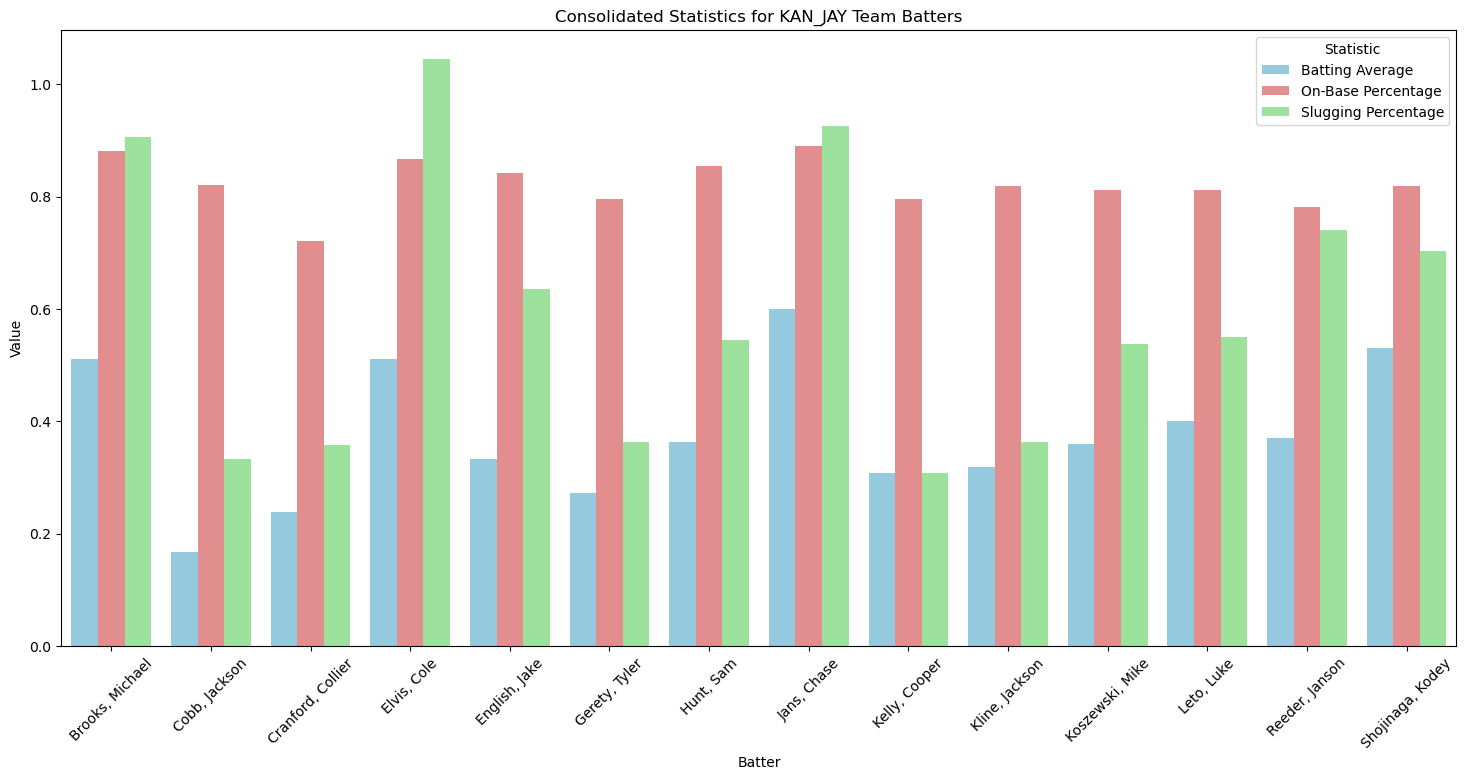

In [111]:
# Changing the colors in the consolidated bar graph for better distinction
batter_stats_viz = batter_stats_without_jake_baker.drop(columns=['Number of Walks'])
# Melting the dataframe for easy plotting with seaborn
melted_batter_stats = batter_stats_viz.reset_index().melt(id_vars=['Batter'], var_name='Statistic', value_name='Value')
# Custom colors for each statistic
custom_colors = ['skyblue', 'lightcoral', 'lightgreen']

# Setting up the plot with new colors
plt.figure(figsize=(18, 8))
plt.xticks(rotation=45)
plt.title("Consolidated Statistics for KAN_JAY Team Batters")

# Plotting with custom colors
sns.barplot(x='Batter', y='Value', hue='Statistic', data=melted_batter_stats, palette=custom_colors)

# Adding legend and labels
plt.ylabel('Value')
plt.xlabel('Batter')

# Show the plot
plt.show()


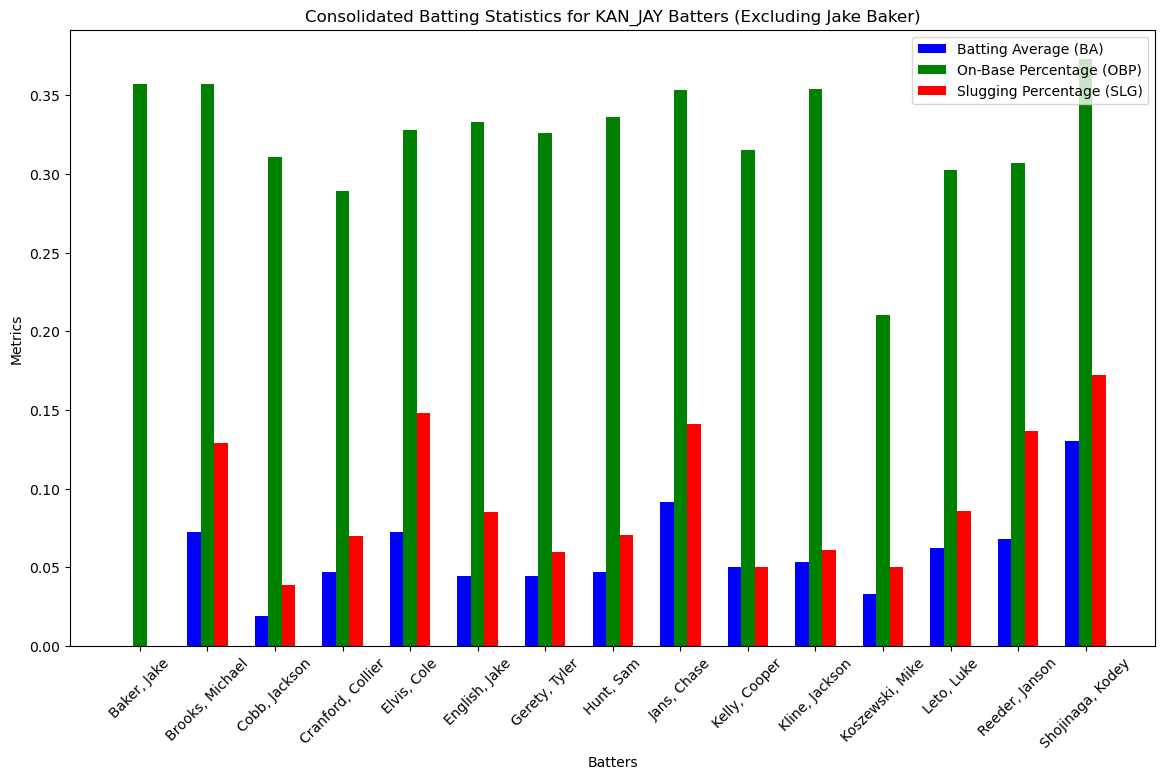

In [100]:
# Creating the visualization based on the updated calculations excluding 'Jake Baker'

# Extracting data for plotting
batter_names_excluding_jake = batter_stats_without_jake_baker['Batter']
ba_excluding_jake = batter_stats_without_jake_baker['Batting Average']
obp_excluding_jake = batter_stats_without_jake_baker['On-Base Percentage']
slg_excluding_jake = batter_stats_without_jake_baker['Slugging Percentage']

# Recalculating the positions for each group of bars on the x-axis
index_excluding_jake = np.arange(len(batter_names_excluding_jake))
bar_width = 0.2
bar1_excluding_jake = index_excluding_jake - bar_width
bar2_excluding_jake = index_excluding_jake
bar3_excluding_jake = index_excluding_jake + bar_width

# Creating the consolidated graph
plt.figure(figsize=(14, 8))
plt.bar(bar1_excluding_jake, ba_excluding_jake, width=bar_width, label='Batting Average (BA)', color='blue')
plt.bar(bar2_excluding_jake, obp_excluding_jake, width=bar_width, label='On-Base Percentage (OBP)', color='green')
plt.bar(bar3_excluding_jake, slg_excluding_jake, width=bar_width, label='Slugging Percentage (SLG)', color='red')

# Adding labels and title
plt.xlabel('Batters')
plt.ylabel('Metrics')
plt.title('Consolidated Batting Statistics for KAN_JAY Batters (Excluding Jake Baker)')
plt.xticks(index_excluding_jake, batter_names_excluding_jake, rotation=45)
plt.legend(loc='upper right')

# Display the plot
plt.show()


In [19]:
# Calculate components for SLG
singles = kan_jay_batters.groupby('Batter')['PlayResult'].apply(lambda x: (x == 'Single').sum())
doubles = kan_jay_batters.groupby('Batter')['PlayResult'].apply(lambda x: (x == 'Double').sum())
triples = kan_jay_batters.groupby('Batter')['PlayResult'].apply(lambda x: (x == 'Triple').sum())
home_runs = kan_jay_batters.groupby('Batter')['PlayResult'].apply(lambda x: (x == 'HomeRun').sum())

# Calculate SLG for each batter
slugging_percentage = (singles + 2 * doubles + 3 * triples + 4 * home_runs) / at_bats

# Sort SLG in descending order
slugging_percentage = slugging_percentage.sort_values(ascending=False)

slugging_percentage


Shojinaga, Kodey     0.172414
Elvis, Cole          0.147799
Jans, Chase          0.141221
Reeder, Janson       0.136519
Brooks, Michael      0.128713
Leto, Luke           0.085938
English, Jake        0.085020
Hunt, Sam            0.070588
Cranford, Collier    0.070093
Kline, Jackson       0.061069
Gerety, Tyler        0.059701
Kelly, Cooper        0.050000
Koszewski, Mike      0.050000
Cobb, Jackson        0.038462
Baker, Jake          0.000000
dtype: float64

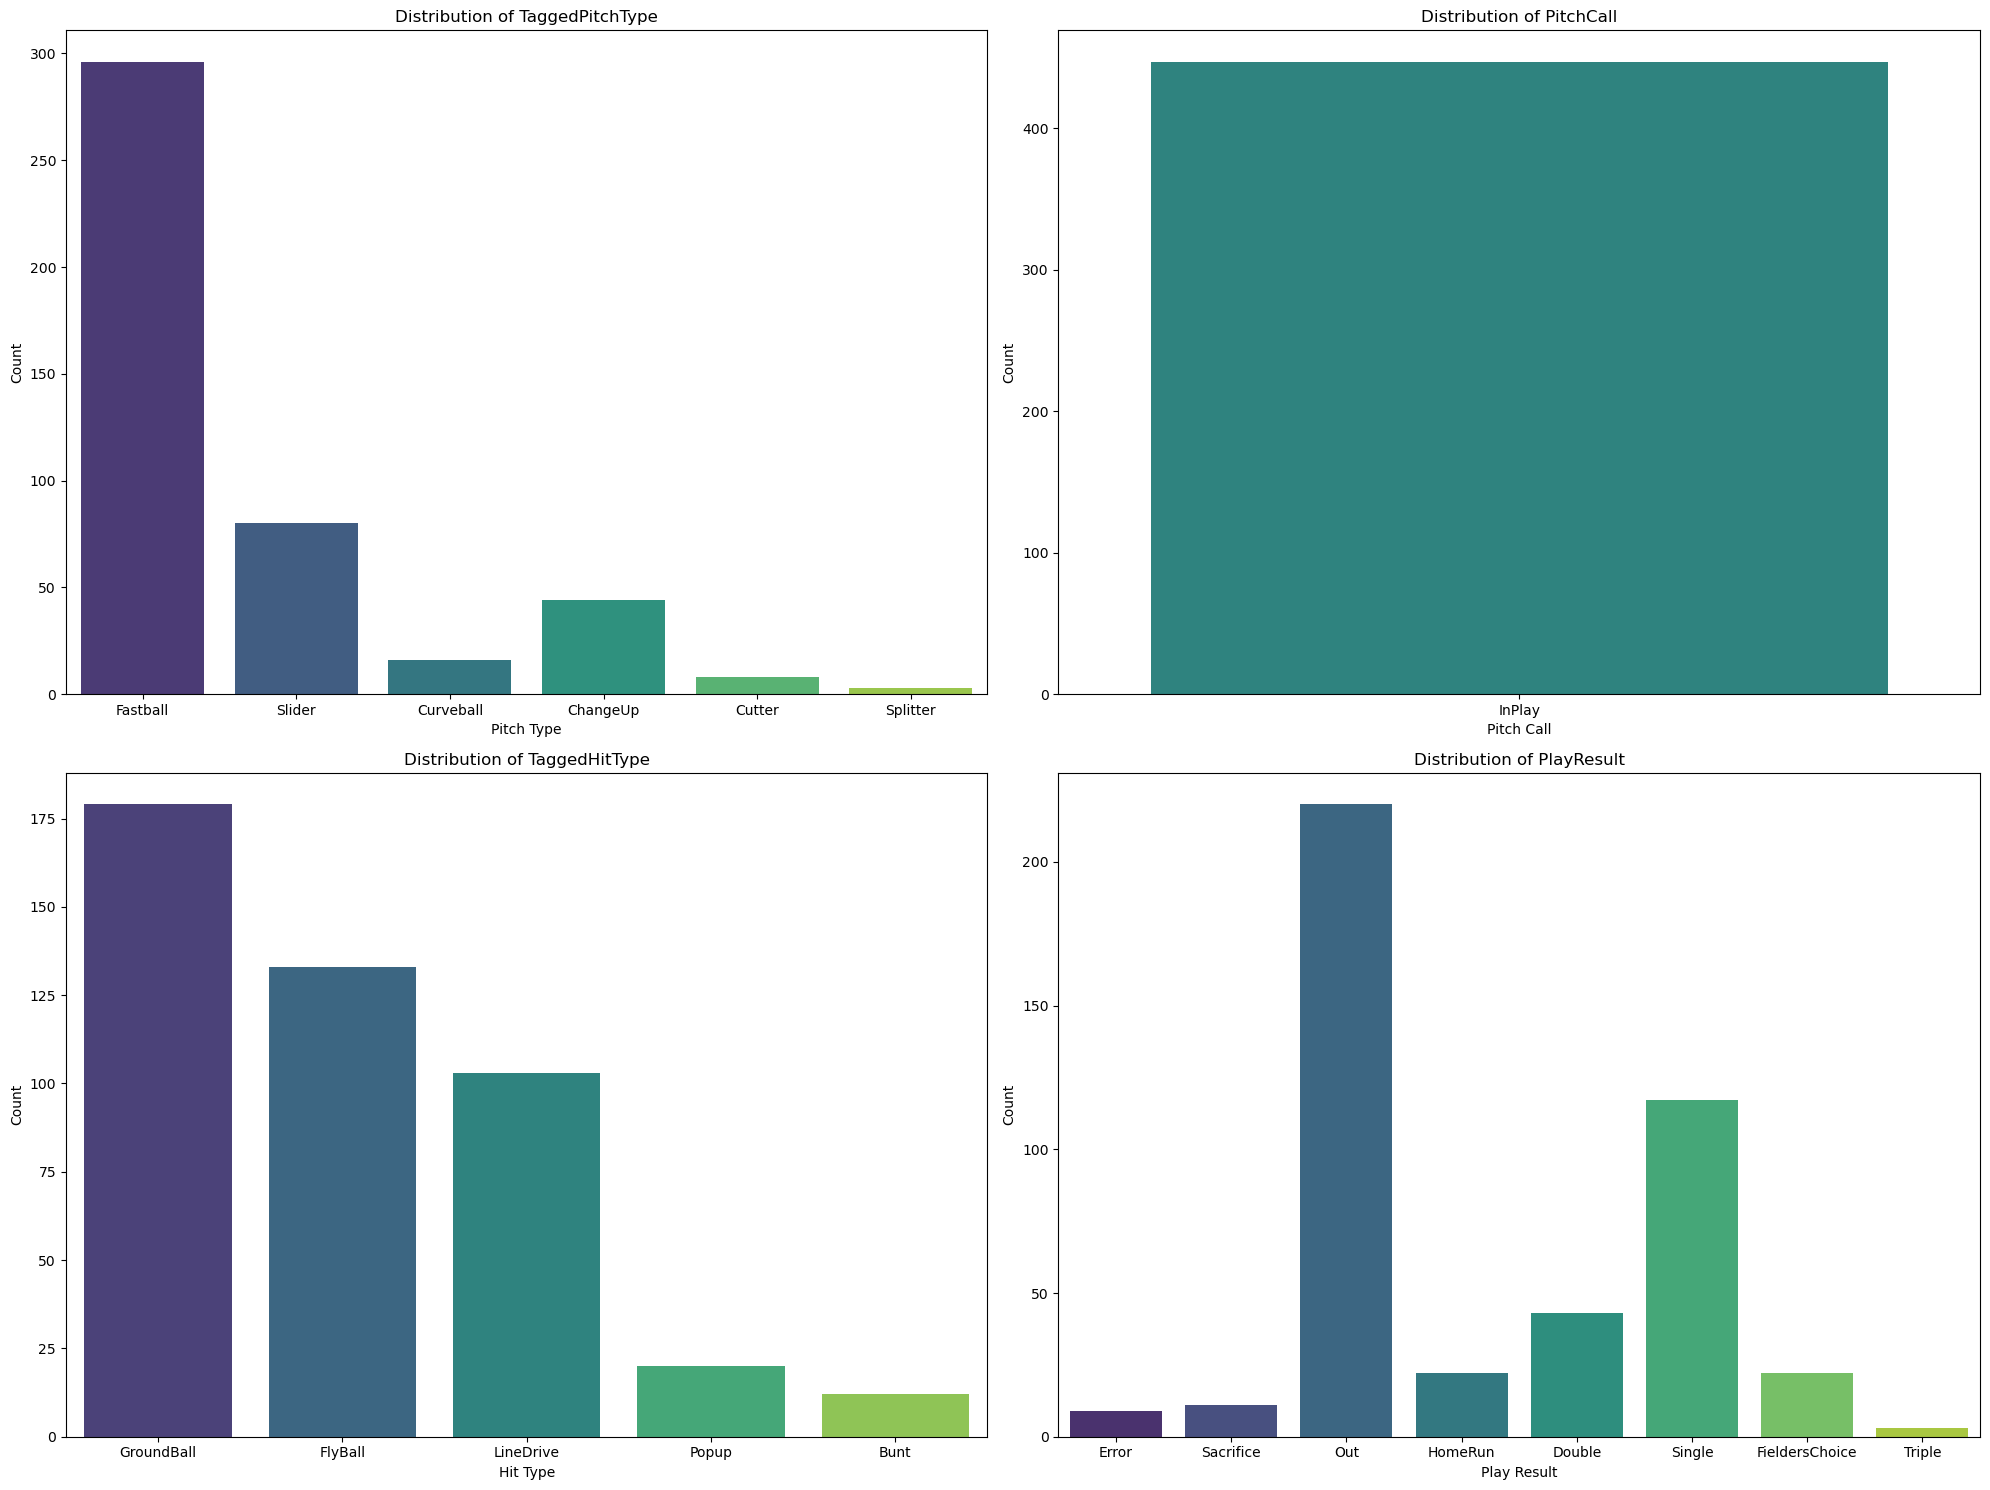

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and has been loaded correctly

# Filter data for "KAN_JAY" batters and exclude 'Undefined' values
kan_jay_data = data[(data['BatterTeam'] == 'KAN_JAY') & 
                    (data['TaggedPitchType'] != 'Undefined') & 
                    (data['PitchCall'] != 'Undefined') &
                    (data['TaggedHitType'] != 'Undefined') & 
                    (data['PlayResult'] != 'Undefined')]

# Set up the figure and axes
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Visualization of TaggedPitchType
sns.countplot(data=kan_jay_data, x='TaggedPitchType', ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Distribution of TaggedPitchType')
axes[0, 0].set_xlabel('Pitch Type')
axes[0, 0].set_ylabel('Count')

# Visualization of PitchCall
sns.countplot(data=kan_jay_data, x='PitchCall', ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribution of PitchCall')
axes[0, 1].set_xlabel('Pitch Call')
axes[0, 1].set_ylabel('Count')

# Visualization of TaggedHitType
sns.countplot(data=kan_jay_data, x='TaggedHitType', ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Distribution of TaggedHitType')
axes[1, 0].set_xlabel('Hit Type')
axes[1, 0].set_ylabel('Count')

# Visualization of PlayResult
sns.countplot(data=kan_jay_data, x='PlayResult', ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribution of PlayResult')
axes[1, 1].set_xlabel('Play Result')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()


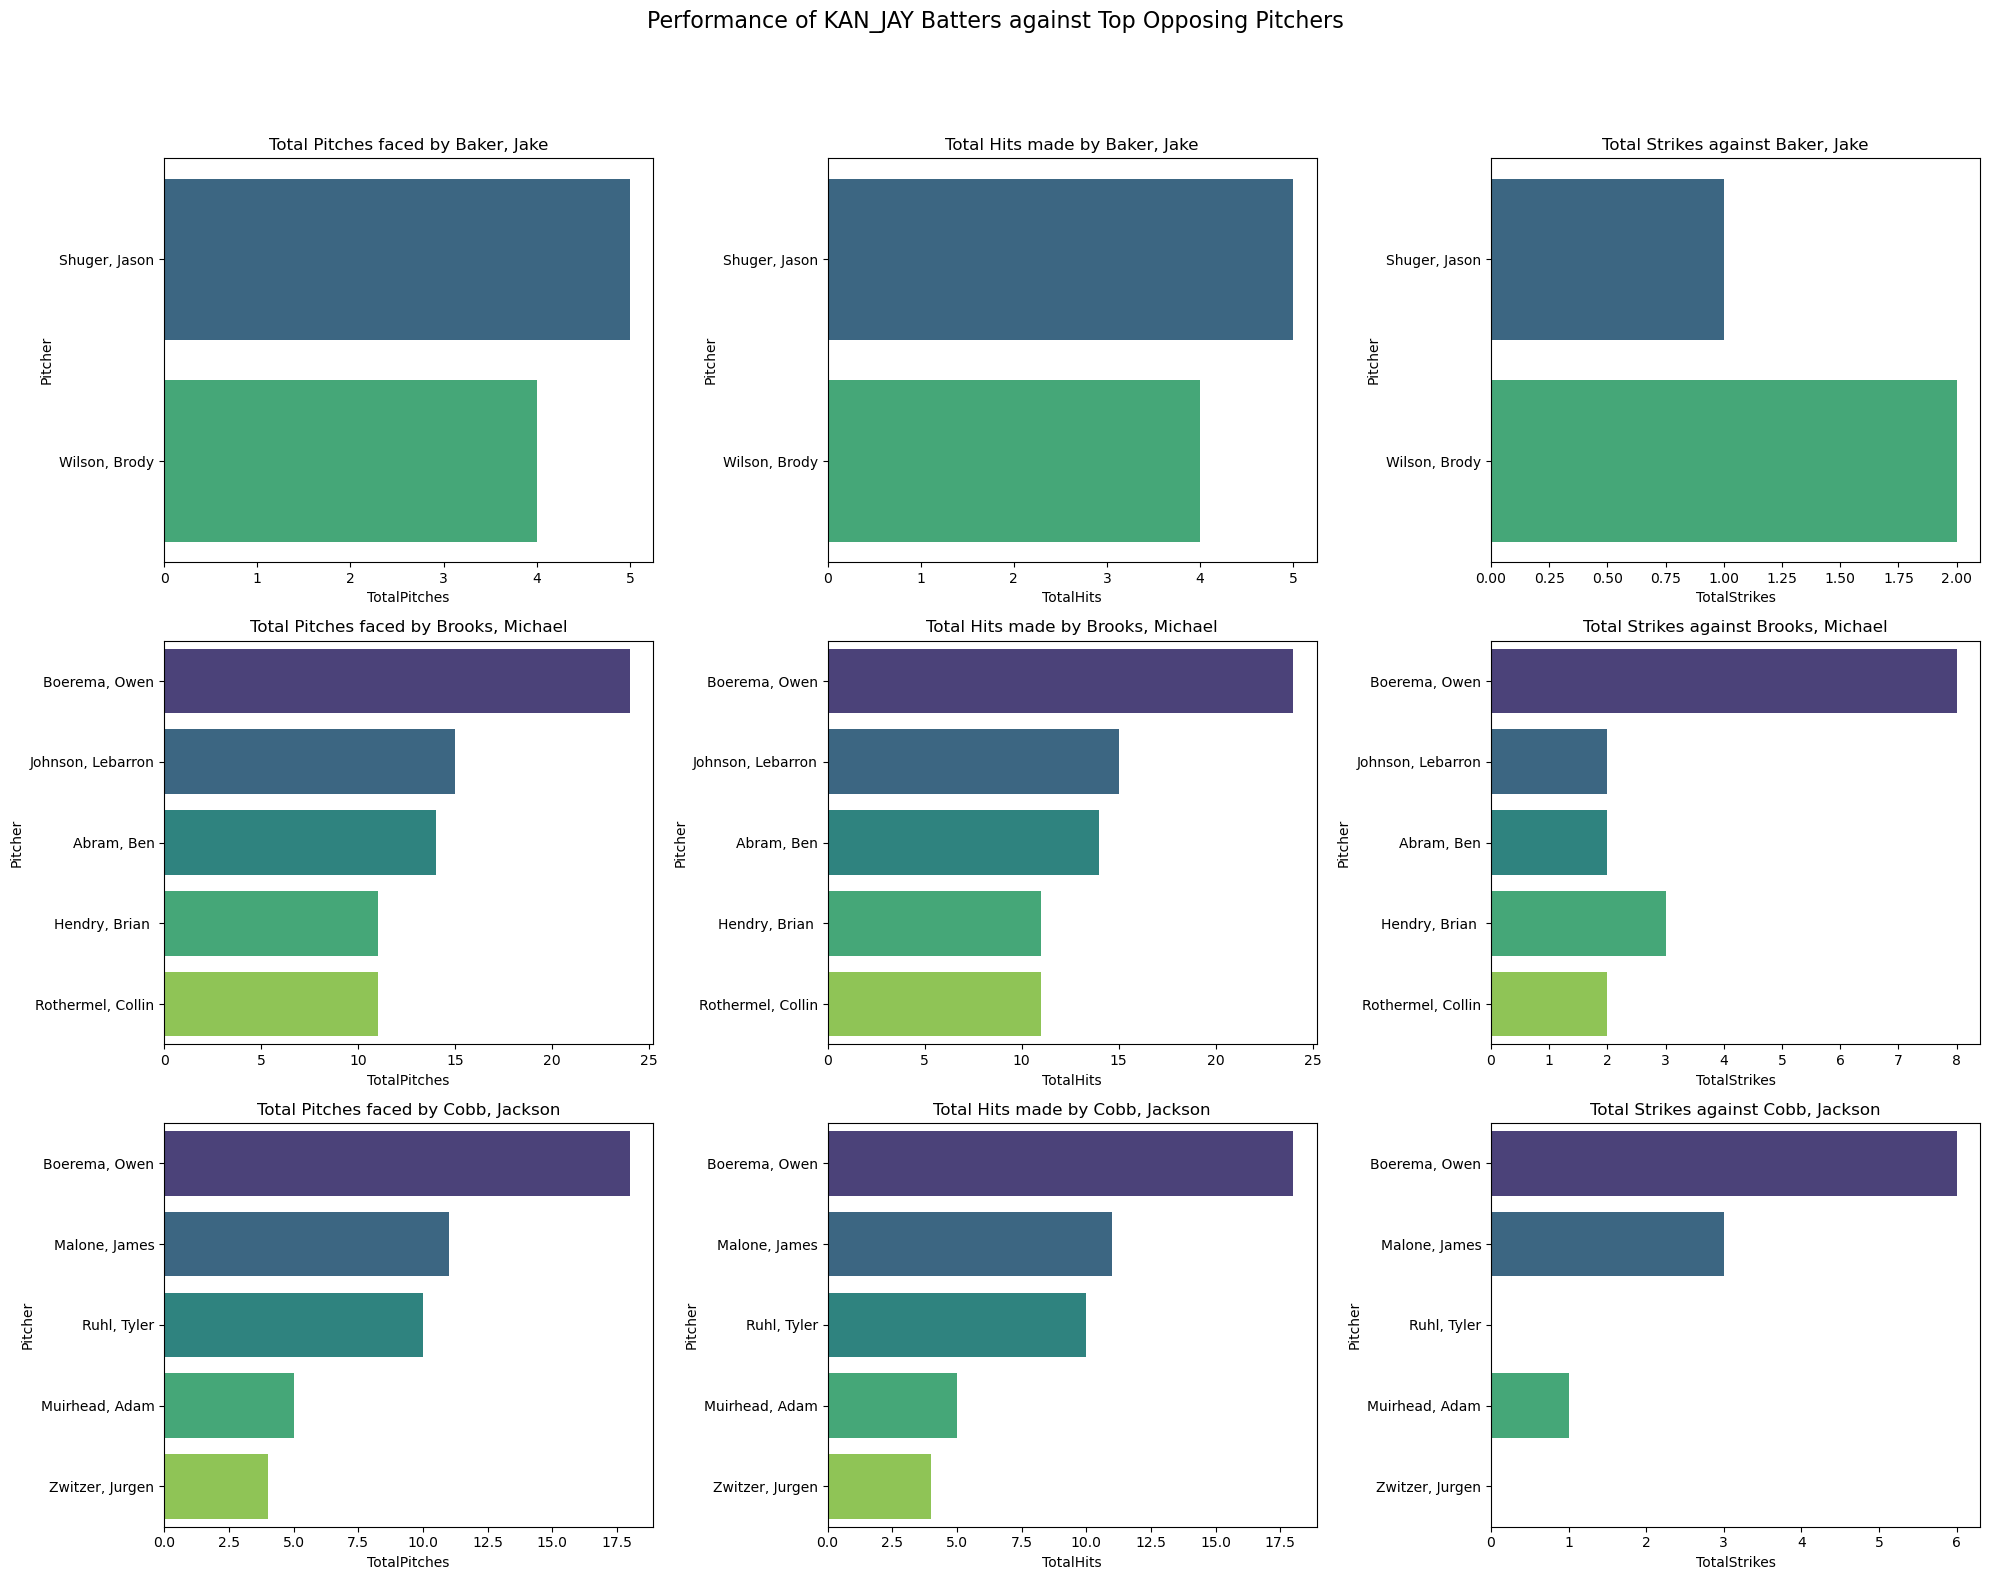

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a few batters for visualization
sample_batters = grouped_data['Batter'].unique()[:3]

# Number of top pitchers to consider for each batter based on the number of pitches faced
top_pitchers = 5

# Create improved visualizations for each sample batter
fig, axes = plt.subplots(len(sample_batters), 3, figsize=(20, 15))
fig.suptitle('Performance of KAN_JAY Batters against Top Opposing Pitchers', fontsize=16, y=1.05)

for idx, batter in enumerate(sample_batters):
    batter_data = grouped_data[grouped_data['Batter'] == batter]
    
    # Select top pitchers based on total pitches
    batter_data = batter_data.nlargest(top_pitchers, 'TotalPitches')
    
    # Plot TotalPitches
    sns.barplot(ax=axes[idx, 0], y='Pitcher', x='TotalPitches', data=batter_data, orient='h', palette="viridis")
    axes[idx, 0].set_title(f'Total Pitches faced by {batter}')
    
    # Plot TotalHits
    sns.barplot(ax=axes[idx, 1], y='Pitcher', x='TotalHits', data=batter_data, orient='h', palette="viridis")
    axes[idx, 1].set_title(f'Total Hits made by {batter}')
    
    # Plot TotalStrikes
    sns.barplot(ax=axes[idx, 2], y='Pitcher', x='TotalStrikes', data=batter_data, orient='h', palette="viridis")
    axes[idx, 2].set_title(f'Total Strikes against {batter}')

plt.tight_layout()
plt.show()

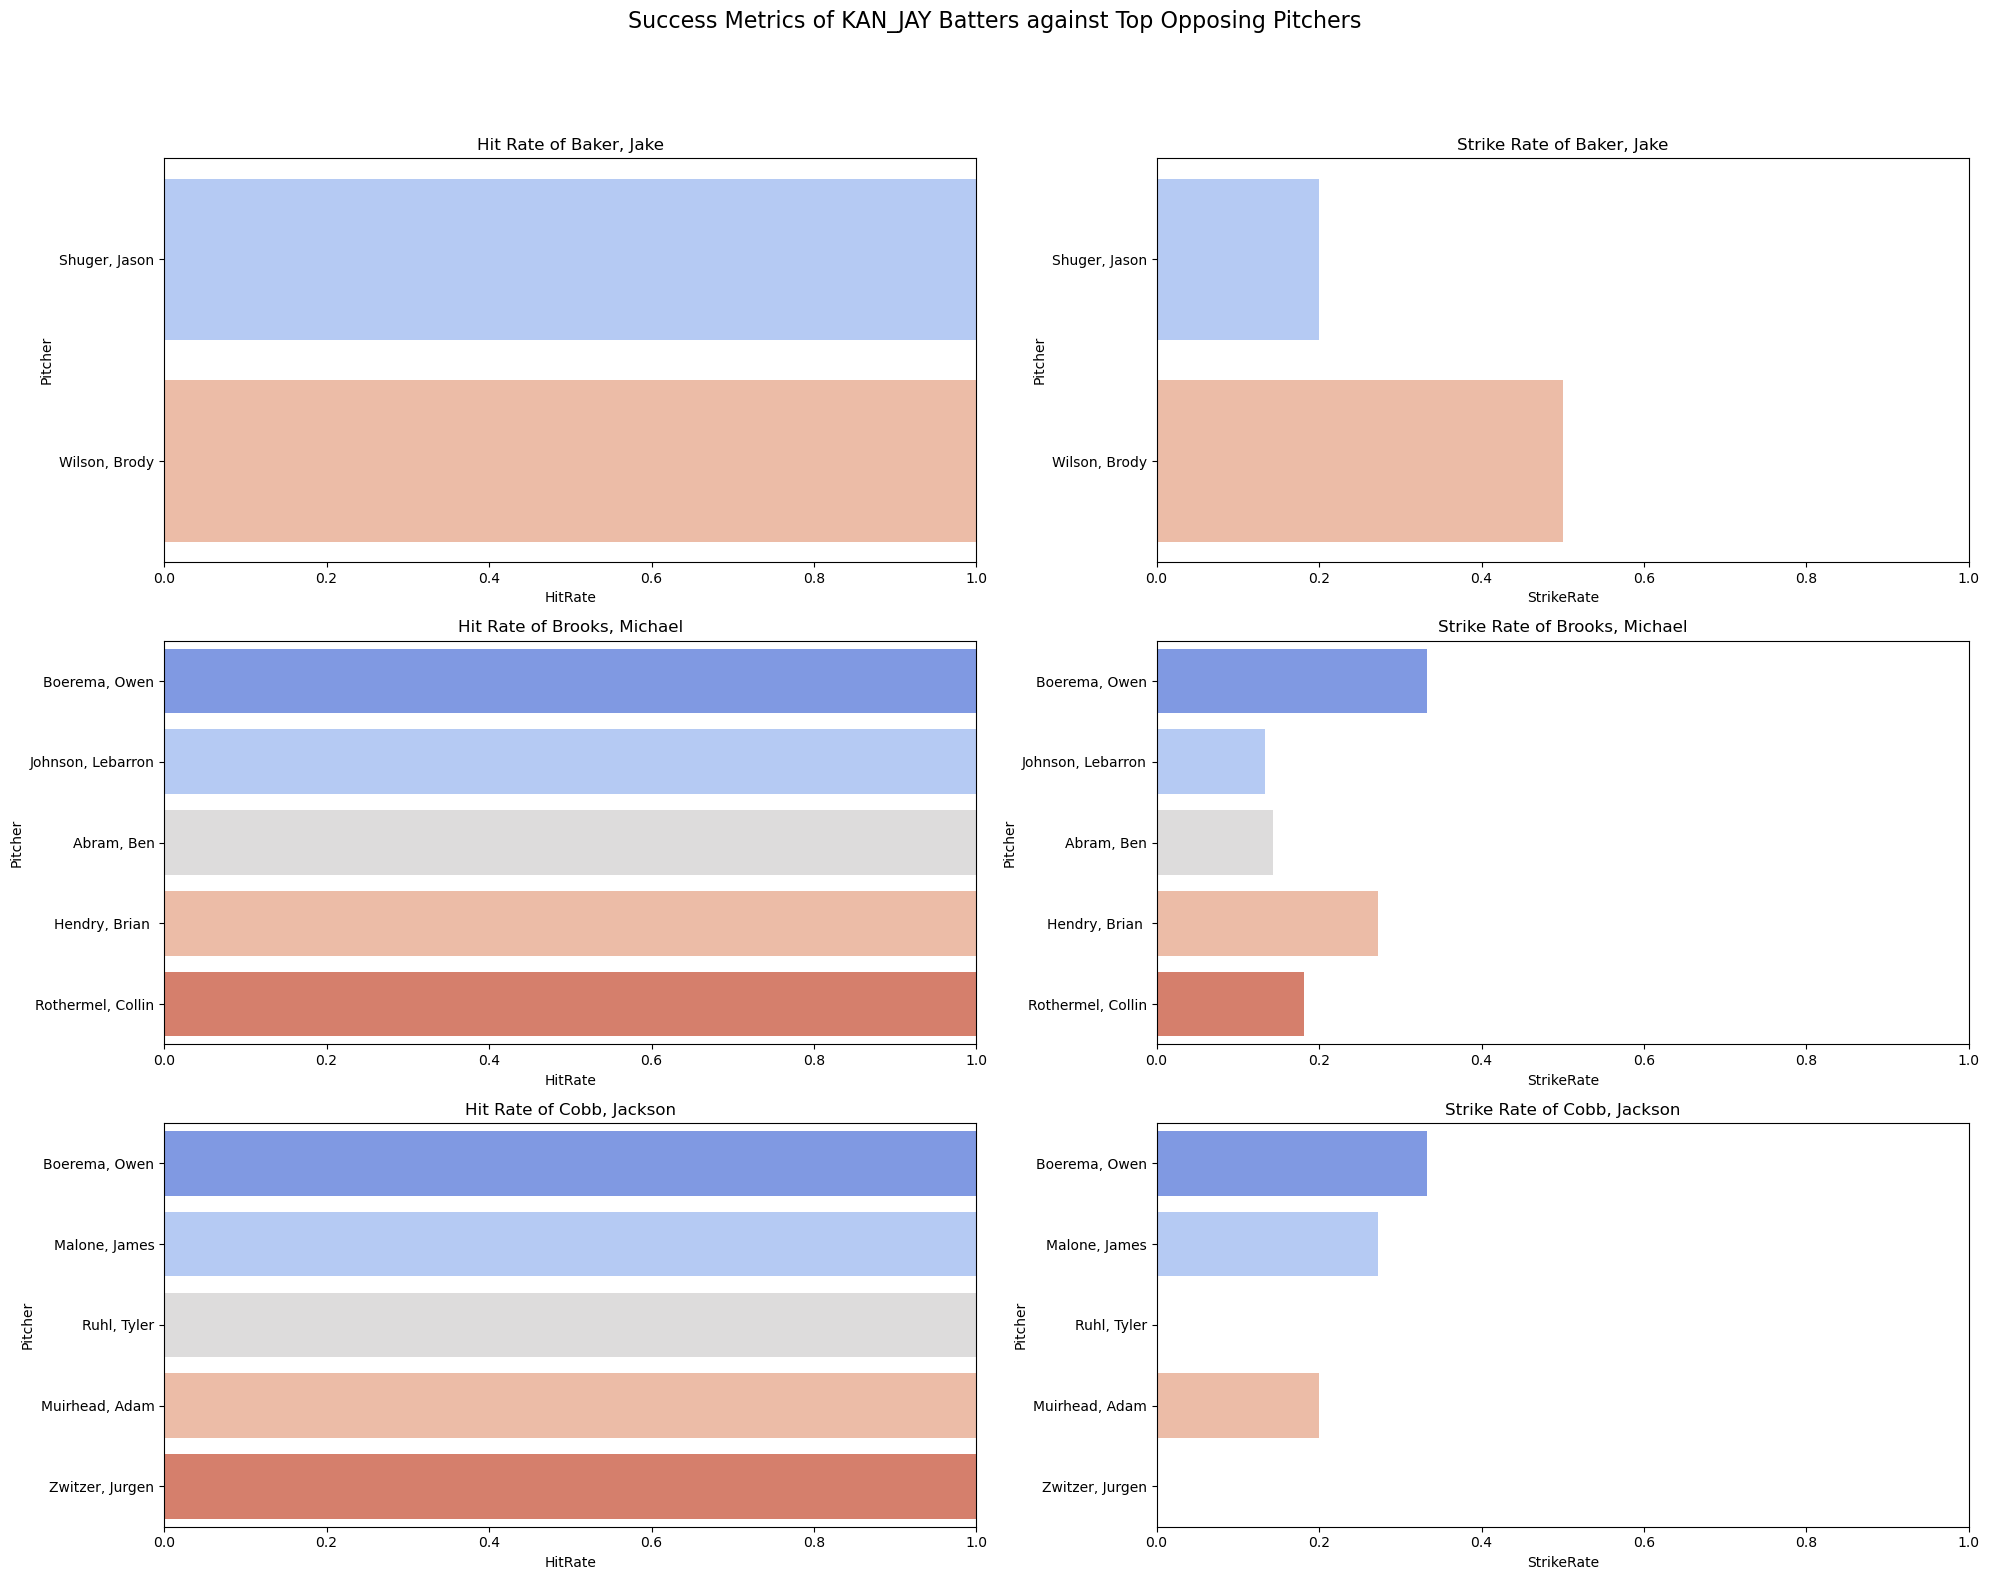

In [10]:
# Calculate hit rate and strike rate for each batter against each pitcher
grouped_data['HitRate'] = grouped_data['TotalHits'] / grouped_data['TotalPitches']
grouped_data['StrikeRate'] = grouped_data['TotalStrikes'] / grouped_data['TotalPitches']

# Create improved visualizations for Hit Rate and Strike Rate of each sample batter
fig, axes = plt.subplots(len(sample_batters), 2, figsize=(20, 15))
fig.suptitle('Success Metrics of KAN_JAY Batters against Top Opposing Pitchers', fontsize=16, y=1.05)

for idx, batter in enumerate(sample_batters):
    batter_data = grouped_data[grouped_data['Batter'] == batter]
    
    # Select top pitchers based on total pitches
    batter_data = batter_data.nlargest(top_pitchers, 'TotalPitches')
    
    # Plot Hit Rate
    sns.barplot(ax=axes[idx, 0], y='Pitcher', x='HitRate', data=batter_data, orient='h', palette="coolwarm")
    axes[idx, 0].set_title(f'Hit Rate of {batter}')
    axes[idx, 0].set_xlim(0, 1)
    
    # Plot Strike Rate
    sns.barplot(ax=axes[idx, 1], y='Pitcher', x='StrikeRate', data=batter_data, orient='h', palette="coolwarm")
    axes[idx, 1].set_title(f'Strike Rate of {batter}')
    axes[idx, 1].set_xlim(0, 1)

plt.tight_layout()
plt.show()


In [42]:
# Calculating hit rates for top KAN_JAY batters against both left-handed and right-handed pitchers
batter_handedness_data = cleaned_data[cleaned_data['Batter'].isin(top_batters_by_hits)].groupby(['Batter', 'PitcherThrows']).agg(
    TotalHits=('IsHit', 'sum'),
    TotalAtBats=('IsHit', 'count')
).reset_index()

batter_handedness_data['HitRate'] = batter_handedness_data['TotalHits'] / batter_handedness_data['TotalAtBats']

# Pivoting the data for better visualization
batter_handedness_pivot = batter_handedness_data.pivot(index='Batter', columns='PitcherThrows', values='HitRate').reset_index()

batter_handedness_pivot

PitcherThrows               Batter      Left     Right
0                    Branch, Kolby  0.083333  0.130435
1                  Brooks, Michael  0.027397  0.086957
2                  Ceccoli, Johnny  0.111111  0.093750
3                       Day, Brady  0.222222  0.130435
4              Guillemette, Garret  0.066667  0.090909
5                      Jans, Chase  0.161765  0.067010
6                      Riggio, Roc  0.166667  0.075000
7                     Rugely, Cash  0.000000  0.086207
8                  Schubart, Nolan  0.250000  0.055556
9                 Shojinaga, Kodey  0.176471  0.119048

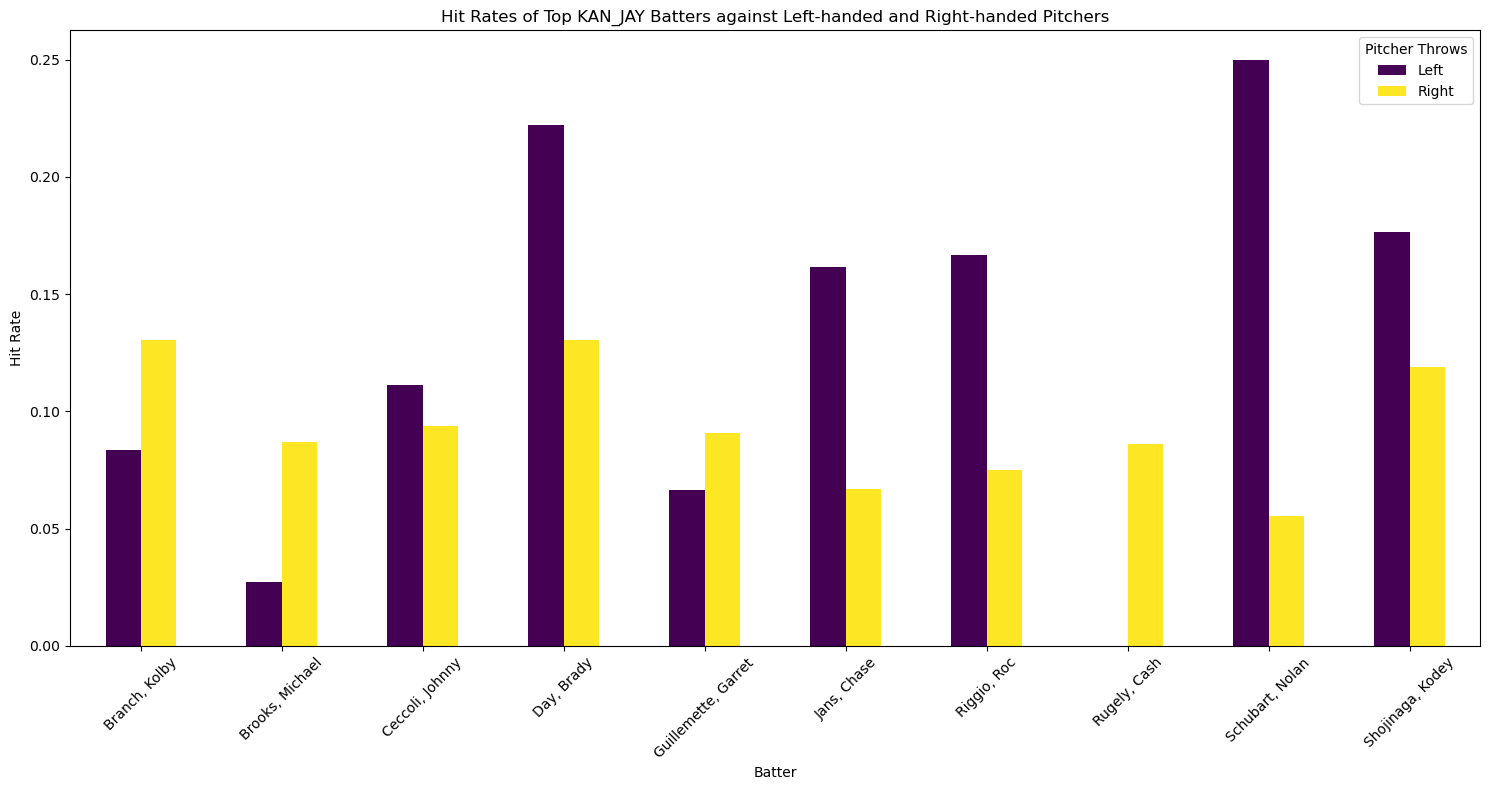

In [43]:
# Visualizing the hit rates against both types of pitchers for top batters
fig, ax = plt.subplots(figsize=(15, 8))

# Using a bar chart for better comparison
batter_handedness_pivot.plot(x='Batter', y=['Left', 'Right'], kind='bar', ax=ax, colormap='viridis')

ax.set_title('Hit Rates of Top KAN_JAY Batters against Left-handed and Right-handed Pitchers')
ax.set_xlabel('Batter')
ax.set_ylabel('Hit Rate')
ax.set_xticklabels(batter_handedness_pivot['Batter'], rotation=45)
ax.legend(title='Pitcher Throws')

plt.tight_layout()
plt.show()


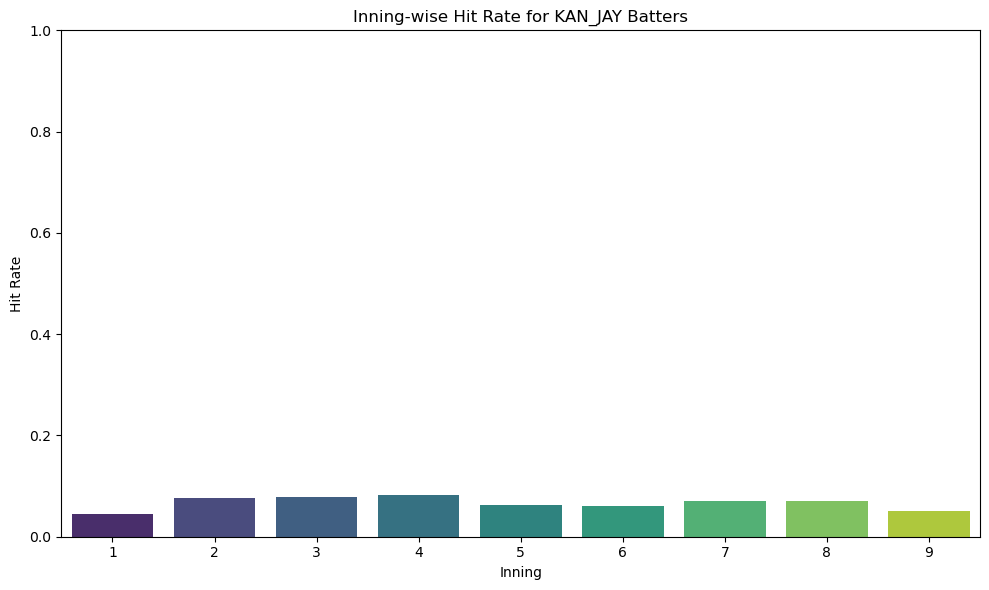

In [44]:
# Adjusting for the correct column name for hits
inning_hit_data_simple = cleaned_data.groupby('Inning').agg(
    TotalHits=('IsHit', 'sum'),
    TotalAtBats=('IsHit', 'count')
).reset_index()

inning_hit_data_simple['HitRate'] = inning_hit_data_simple['TotalHits'] / inning_hit_data_simple['TotalAtBats']

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Inning', y='HitRate', data=inning_hit_data_simple, ax=ax, palette='viridis')
ax.set_title('Inning-wise Hit Rate for KAN_JAY Batters')
ax.set_xlabel('Inning')
ax.set_ylabel('Hit Rate')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


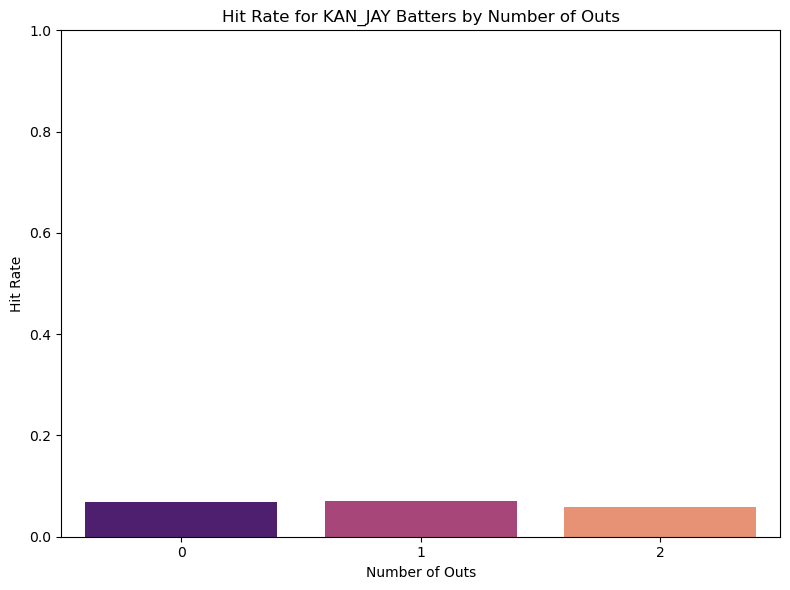

In [45]:
# Calculating hit rate based on number of outs
outs_hit_data_simple = cleaned_data.groupby('Outs').agg(
    TotalHits=('IsHit', 'sum'),
    TotalAtBats=('IsHit', 'count')
).reset_index()

outs_hit_data_simple['HitRate'] = outs_hit_data_simple['TotalHits'] / outs_hit_data_simple['TotalAtBats']

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='Outs', y='HitRate', data=outs_hit_data_simple, ax=ax, palette='magma')
ax.set_title('Hit Rate for KAN_JAY Batters by Number of Outs')
ax.set_xlabel('Number of Outs')
ax.set_ylabel('Hit Rate')
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


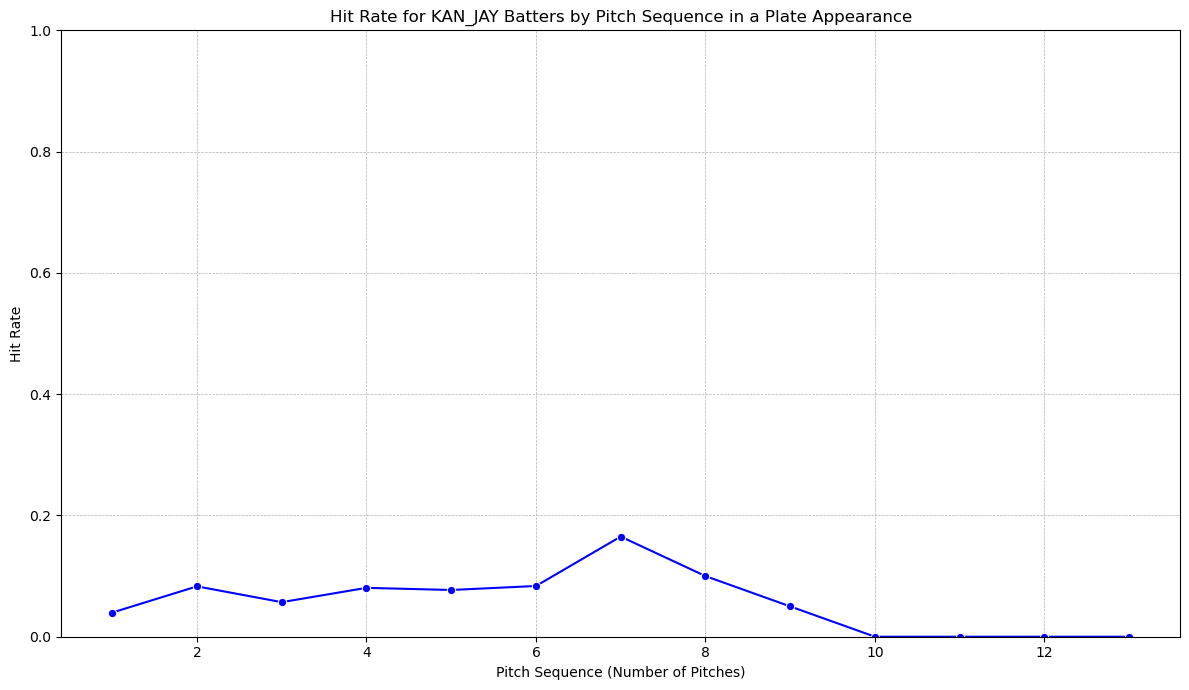

In [46]:
# Pitch Sequence Analysis
sequence_hit_data = cleaned_data.groupby('PitchofPA').agg(
    TotalHits=('IsHit', 'sum'),
    TotalAtBats=('IsHit', 'count')
).reset_index()

sequence_hit_data['HitRate'] = sequence_hit_data['TotalHits'] / sequence_hit_data['TotalAtBats']

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(x='PitchofPA', y='HitRate', data=sequence_hit_data, marker='o', color='blue')
plt.title('Hit Rate for KAN_JAY Batters by Pitch Sequence in a Plate Appearance')
plt.xlabel('Pitch Sequence (Number of Pitches)')
plt.ylabel('Hit Rate')
plt.ylim(0, 1)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


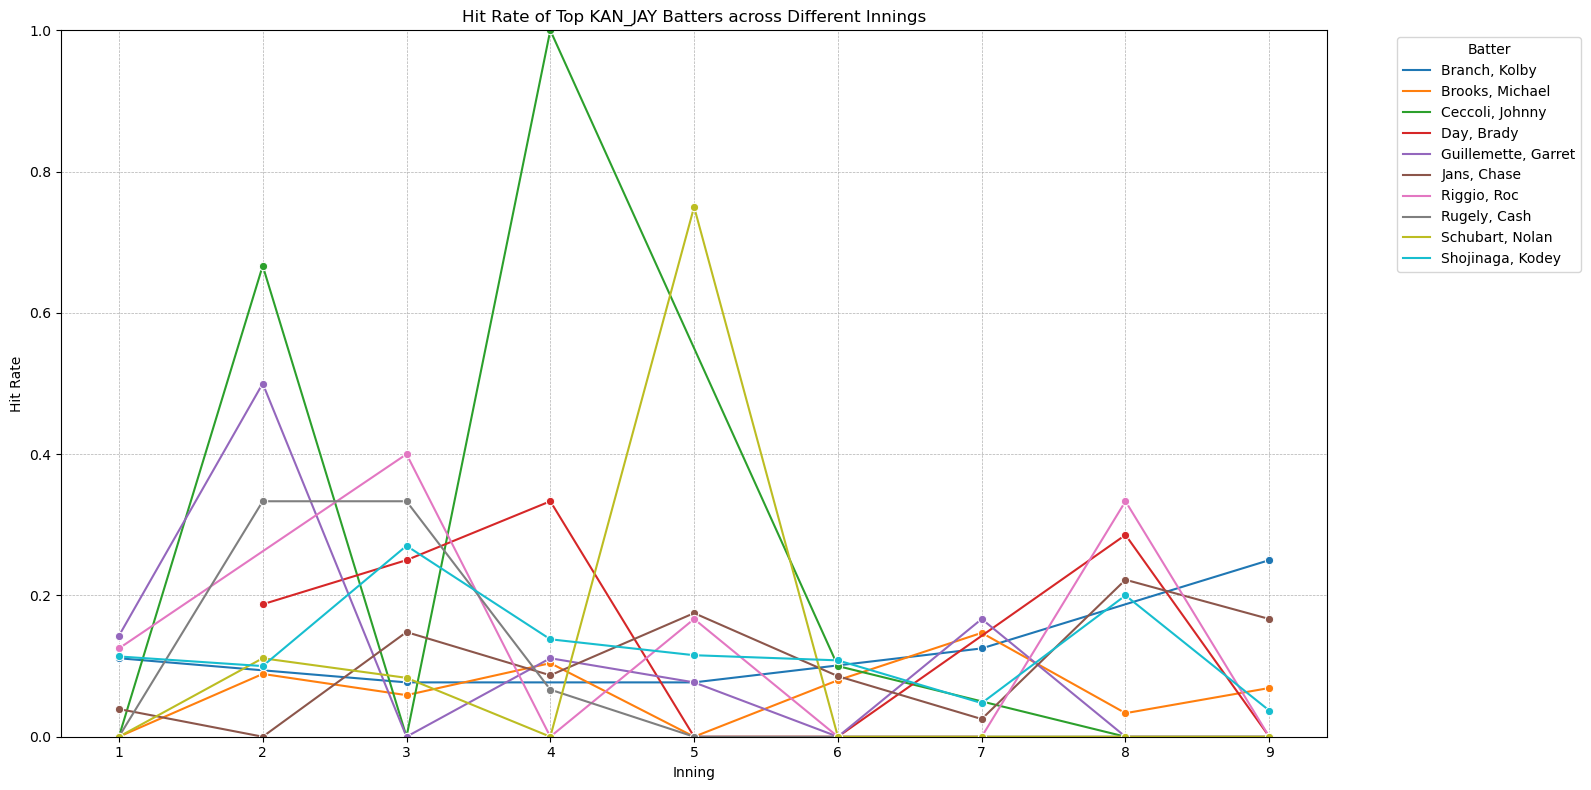

In [36]:
# Grouping data by Batter and Inning to get total hits and total at-bats
batter_inning_data = cleaned_data.groupby(['Batter', 'Inning']).agg(
    TotalHits=('IsHit', 'sum'),
    TotalAtBats=('IsHit', 'count')
).reset_index()

# Calculating hit rate based on Inning
batter_inning_data['HitRate'] = batter_inning_data['TotalHits'] / batter_inning_data['TotalAtBats']

# Filtering data for top KAN_JAY batters
batter_inning_data_top_batters = batter_inning_data[batter_inning_data['Batter'].isin(top_batters_by_hits)]

# Visualizing hit rates of top KAN_JAY batters across different innings
plt.figure(figsize=(16, 8))
sns.lineplot(data=batter_inning_data_top_batters, x='Inning', y='HitRate', hue='Batter', marker='o', palette='tab10')
plt.title('Hit Rate of Top KAN_JAY Batters across Different Innings')
plt.ylabel('Hit Rate')
plt.xlabel('Inning')
plt.ylim(0, 1)
plt.xticks(sorted(cleaned_data['Inning'].unique()))
plt.legend(title='Batter', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


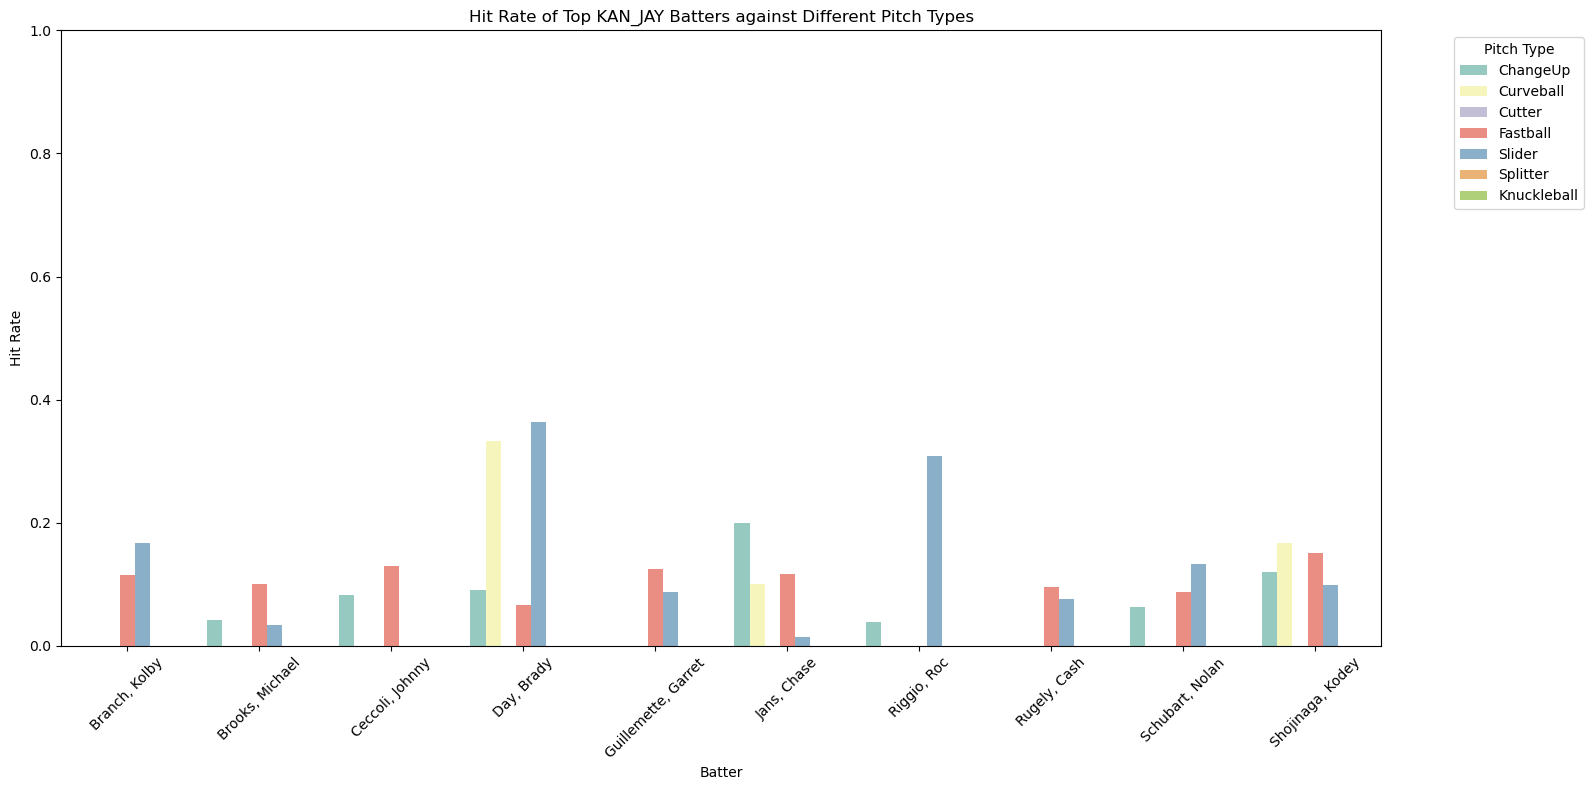

In [37]:
# Grouping data by Batter and TaggedPitchType to get total hits and total at-bats
batter_pitchtype_data = cleaned_data.groupby(['Batter', 'TaggedPitchType']).agg(
    TotalHits=('IsHit', 'sum'),
    TotalAtBats=('IsHit', 'count')
).reset_index()

# Calculating hit rate based on TaggedPitchType
batter_pitchtype_data['HitRate'] = batter_pitchtype_data['TotalHits'] / batter_pitchtype_data['TotalAtBats']

# Filtering data for top KAN_JAY batters
batter_pitchtype_data_top_batters = batter_pitchtype_data[batter_pitchtype_data['Batter'].isin(top_batters_by_hits)]

# Visualizing hit rates of top KAN_JAY batters against different pitch types
plt.figure(figsize=(16, 8))
sns.barplot(data=batter_pitchtype_data_top_batters, x='Batter', y='HitRate', hue='TaggedPitchType', palette='Set3')
plt.title('Hit Rate of Top KAN_JAY Batters against Different Pitch Types')
plt.ylabel('Hit Rate')
plt.xlabel('Batter')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Pitch Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [39]:
# Identifying pitch type preferences and vulnerabilities for each top batter
batter_pitch_preference = batter_pitchtype_data_top_batters.groupby('Batter').apply(lambda x: x.nlargest(1, 'HitRate')['TaggedPitchType'].values[0]).reset_index(name='PreferredPitch')
batter_pitch_vulnerability = batter_pitchtype_data_top_batters.groupby('Batter').apply(lambda x: x.nsmallest(1, 'HitRate')['TaggedPitchType'].values[0]).reset_index(name='VulnerablePitch')

# Merging the preferences and vulnerabilities
batter_pitch_preference_vulnerability = pd.merge(batter_pitch_preference, batter_pitch_vulnerability, on='Batter')

# Calculating performance variance for each batter across different pitch types
batter_performance_variance = batter_pitchtype_data_top_batters.groupby('Batter').agg(PerformanceVariance=('HitRate', 'var')).reset_index()

# Merging the variance data
batter_analysis_data = pd.merge(batter_pitch_preference_vulnerability, batter_performance_variance, on='Batter')

batter_analysis_data

Batter PreferredPitch VulnerablePitch  PerformanceVariance
0        Branch, Kolby         Slider        ChangeUp             0.006295
1      Brooks, Michael       Fastball       Curveball             0.001566
2      Ceccoli, Johnny       Fastball       Curveball             0.004178
3           Day, Brady         Slider        Fastball             0.024496
4  Guillemette, Garret       Fastball        ChangeUp             0.003985
5          Jans, Chase       ChangeUp          Cutter             0.006563
6          Riggio, Roc         Slider       Curveball             0.022066
7         Rugely, Cash       Fastball       Curveball             0.002526
8      Schubart, Nolan         Slider       Curveball             0.003313
9     Shojinaga, Kodey      Curveball          Cutter             0.005337

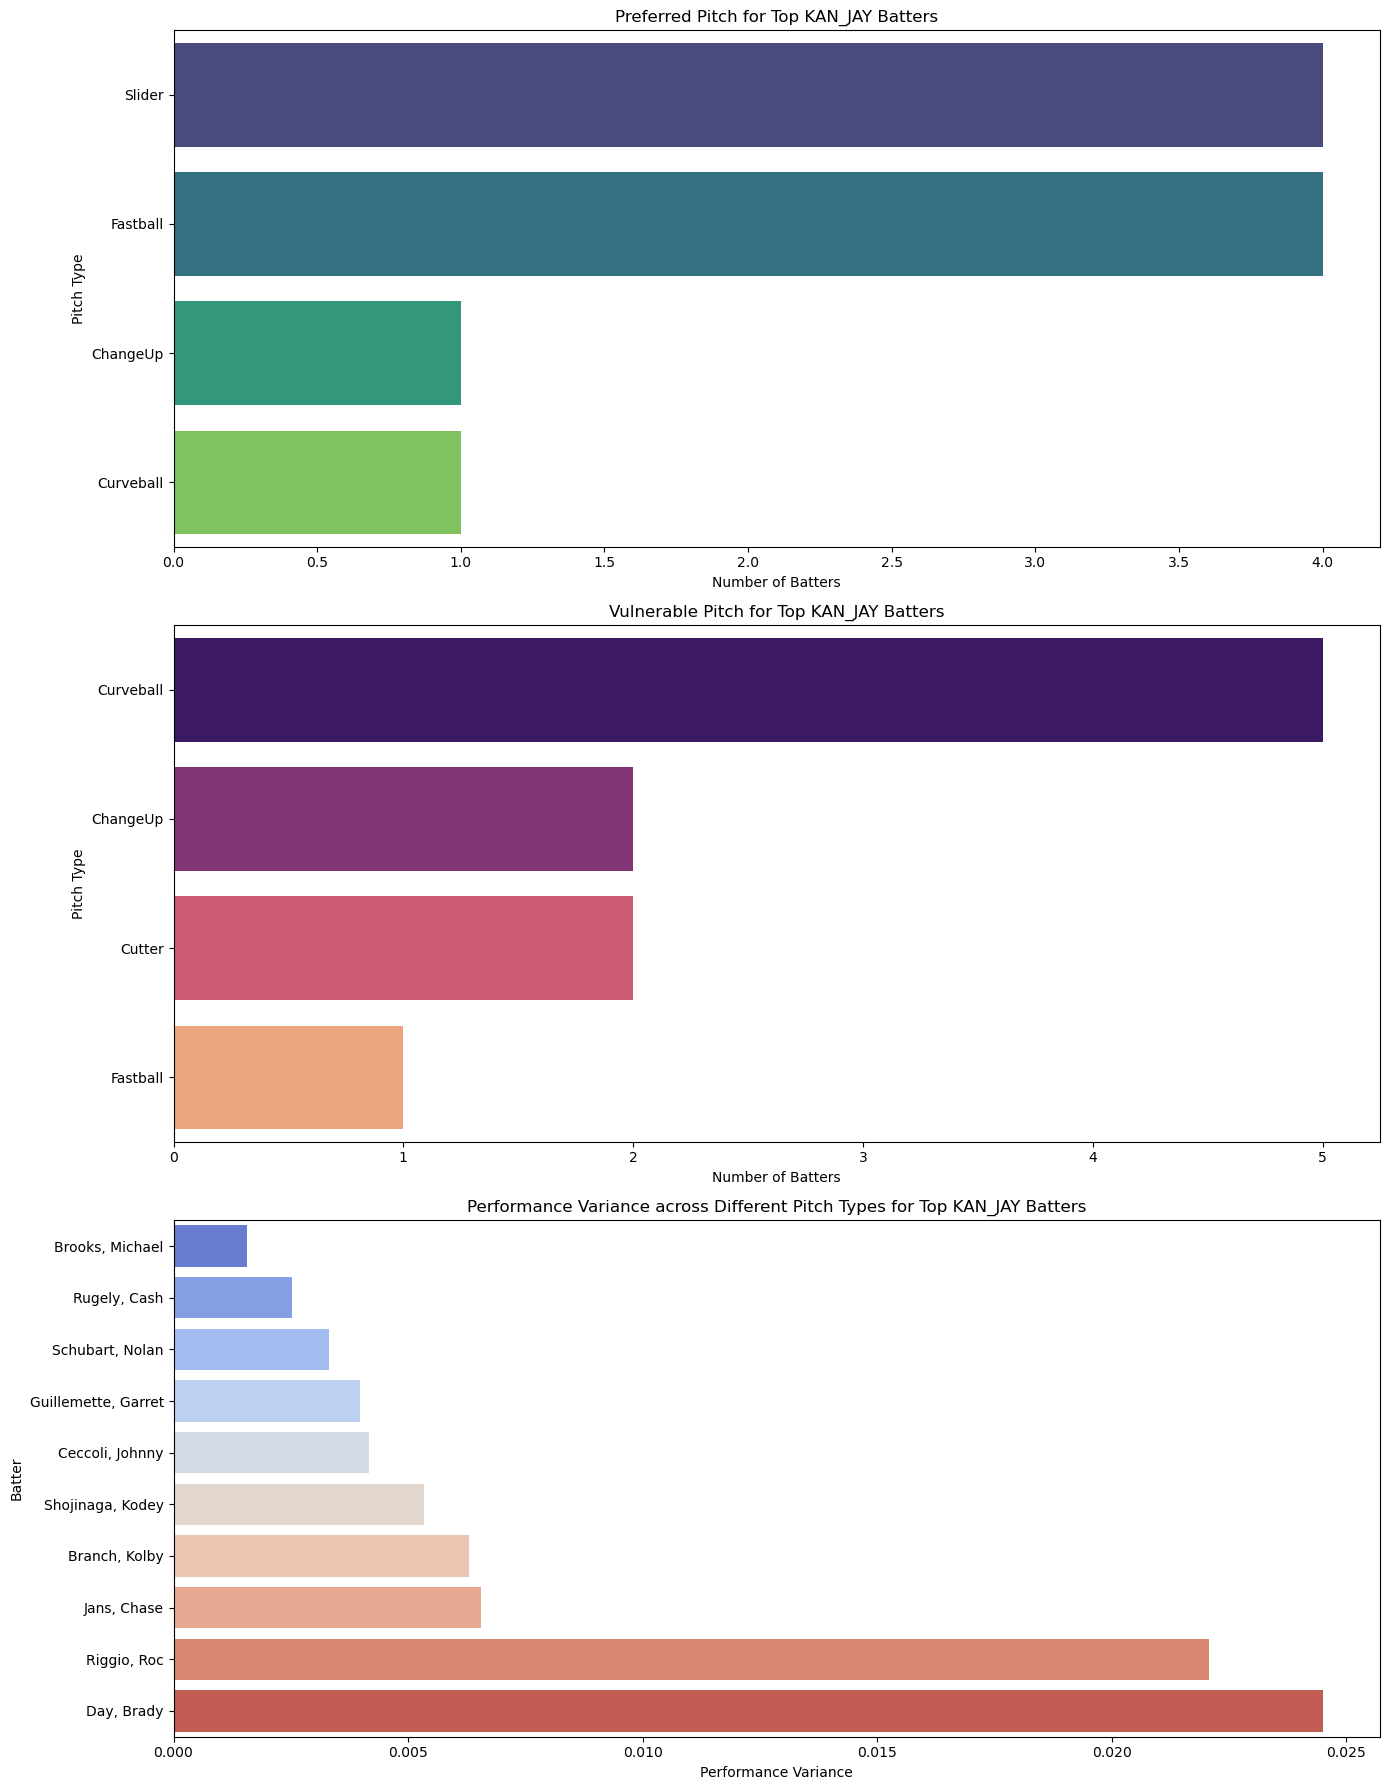

In [40]:
# Setting up the subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 18))

# Visualization for Preferred Pitch
sns.countplot(data=batter_analysis_data, y='PreferredPitch', ax=axes[0], palette='viridis', order=batter_analysis_data['PreferredPitch'].value_counts().index)
axes[0].set_title('Preferred Pitch for Top KAN_JAY Batters')
axes[0].set_xlabel('Number of Batters')
axes[0].set_ylabel('Pitch Type')

# Visualization for Vulnerable Pitch
sns.countplot(data=batter_analysis_data, y='VulnerablePitch', ax=axes[1], palette='magma', order=batter_analysis_data['VulnerablePitch'].value_counts().index)
axes[1].set_title('Vulnerable Pitch for Top KAN_JAY Batters')
axes[1].set_xlabel('Number of Batters')
axes[1].set_ylabel('Pitch Type')

# Visualization for Performance Variance
sns.barplot(data=batter_analysis_data.sort_values('PerformanceVariance', ascending=True), y='Batter', x='PerformanceVariance', ax=axes[2], palette='coolwarm')
axes[2].set_title('Performance Variance across Different Pitch Types for Top KAN_JAY Batters')
axes[2].set_xlabel('Performance Variance')
axes[2].set_ylabel('Batter')

plt.tight_layout()
plt.show()


In [37]:
# Let's redefine 'all_batters_success_data' and categorize the pitch locations again
# First, we collect the success hit data from the original DataFrame
all_batters_success_data = kan_jay_batters_cleaned.loc[:, ['Batter', 'PlateLocSide', 'PlateLocHeight', 'PlayResult']].copy()
all_batters_success_data['Success'] = all_batters_success_data['PlayResult'].isin(['Single', 'Double', 'Triple', 'HomeRun'])

# Define horizontal location categories
all_batters_success_data['HorizontalLocation'] = pd.cut(
    all_batters_success_data['PlateLocSide'],
    bins=[-float('inf'), -0.5, 0.5, float('inf')],
    labels=['Outer', 'Middle', 'Inner']
)

# Define vertical location categories
all_batters_success_data['VerticalLocation'] = pd.cut(
    all_batters_success_data['PlateLocHeight'],
    bins=[-float('inf'), 1.5, 2.5, float('inf')],
    labels=['Lower', 'Middle', 'Upper']
)

# Combine horizontal and vertical location categories
all_batters_success_data['SimplifiedLocation'] = (
    all_batters_success_data['HorizontalLocation'].astype(str) + ' ' + 
    all_batters_success_data['VerticalLocation'].astype(str)
)

# Drop rows where locations could not be categorized (NaN values)
all_batters_success_data.dropna(subset=['SimplifiedLocation'], inplace=True)

# Now create a pivot table for the success hits of all individual batters based on these simplified locations
pivot_table_simplified = all_batters_success_data.pivot_table(
    values='Success', 
    index='SimplifiedLocation', 
    columns='Batter', 
    aggfunc='mean'
)

pivot_table_simplified.reset_index(inplace=True)  # Reset index to turn 'SimplifiedLocation' back into a column

pivot_table_simplified


Batter SimplifiedLocation  Baker, Jake  Brooks, Michael  Cobb, Jackson  \
0             Inner Lower          NaN         0.000000       0.000000   
1            Inner Middle          NaN         0.111111       0.000000   
2             Inner Upper          0.0         0.041667       0.000000   
3            Middle Lower          0.0         0.052632       0.000000   
4           Middle Middle          NaN         0.258621       0.000000   
5            Middle Upper          0.0         0.035714       0.058824   
6             Outer Lower          0.0         0.000000       0.000000   
7            Outer Middle          0.0         0.045455       0.000000   
8             Outer Upper          NaN         0.000000       0.000000   
9                 nan nan          NaN              NaN            NaN   

Batter  Cranford, Collier  Elvis, Cole  English, Jake  Gerety, Tyler  \
0                0.000000     0.000000       0.000000       0.000000   
1                0.000000     0.100000       0.000000       0.000000   
2                0.066667     0.205882       0.125000       0.100000   
3                0.050000     0.105263       0.000000       0.000000   
4                0.090909     0.166667       0.031250       0.000000   
5                0.085714     0.033333       0.142857       0.142857   
6                0.000000     0.023256       0.000000       0.000000   
7                0.050000     0.018868       0.000000       0.083333   
8                0.000000     0.040816       0.071429       0.000000   
9                     NaN          NaN       0.000000            NaN   

Batter  Hunt, Sam  Jans, Chase  Kelly, Cooper  Kline, Jackson  \
0        0.000000     0.000000       0.000000        0.000000   
1        0.000000     0.214286       0.000000        0.214286   
2        0.000000     0.117647       0.153846        0.000000   
3        0.000000     0.000000       0.000000        0.111111   
4        0.266667     0.093023       0.000000        0.052632   
5        0.000000     0.136364       0.058824        0.045455   
6        0.000000     0.026316       0.000000        0.000000   
7        0.000000     0.100000       0.000000        0.000000   
8        0.000000     0.071429       0.500000        0.071429   
9             NaN          NaN            NaN             NaN   

Batter  Koszewski, Mike  Leto, Luke  Reeder, Janson  Shojinaga, Kodey  
0              0.000000    0.000000        0.000000          0.000000  
1              0.029851    0.043478        0.076923          0.071429  
2              0.018868    0.080000        0.045455          0.111111  
3              0.000000    0.000000        0.095238          0.083333  
4              0.093333    0.066667        0.147541          0.177778  
5              0.041667    0.142857        0.052632          0.320755  
6              0.000000    0.000000        0.000000          0.000000  
7              0.000000    0.000000        0.000000          0.075000  
8              0.029412    0.050000        0.000000          0.071429  
9                   NaN         NaN             NaN               NaN

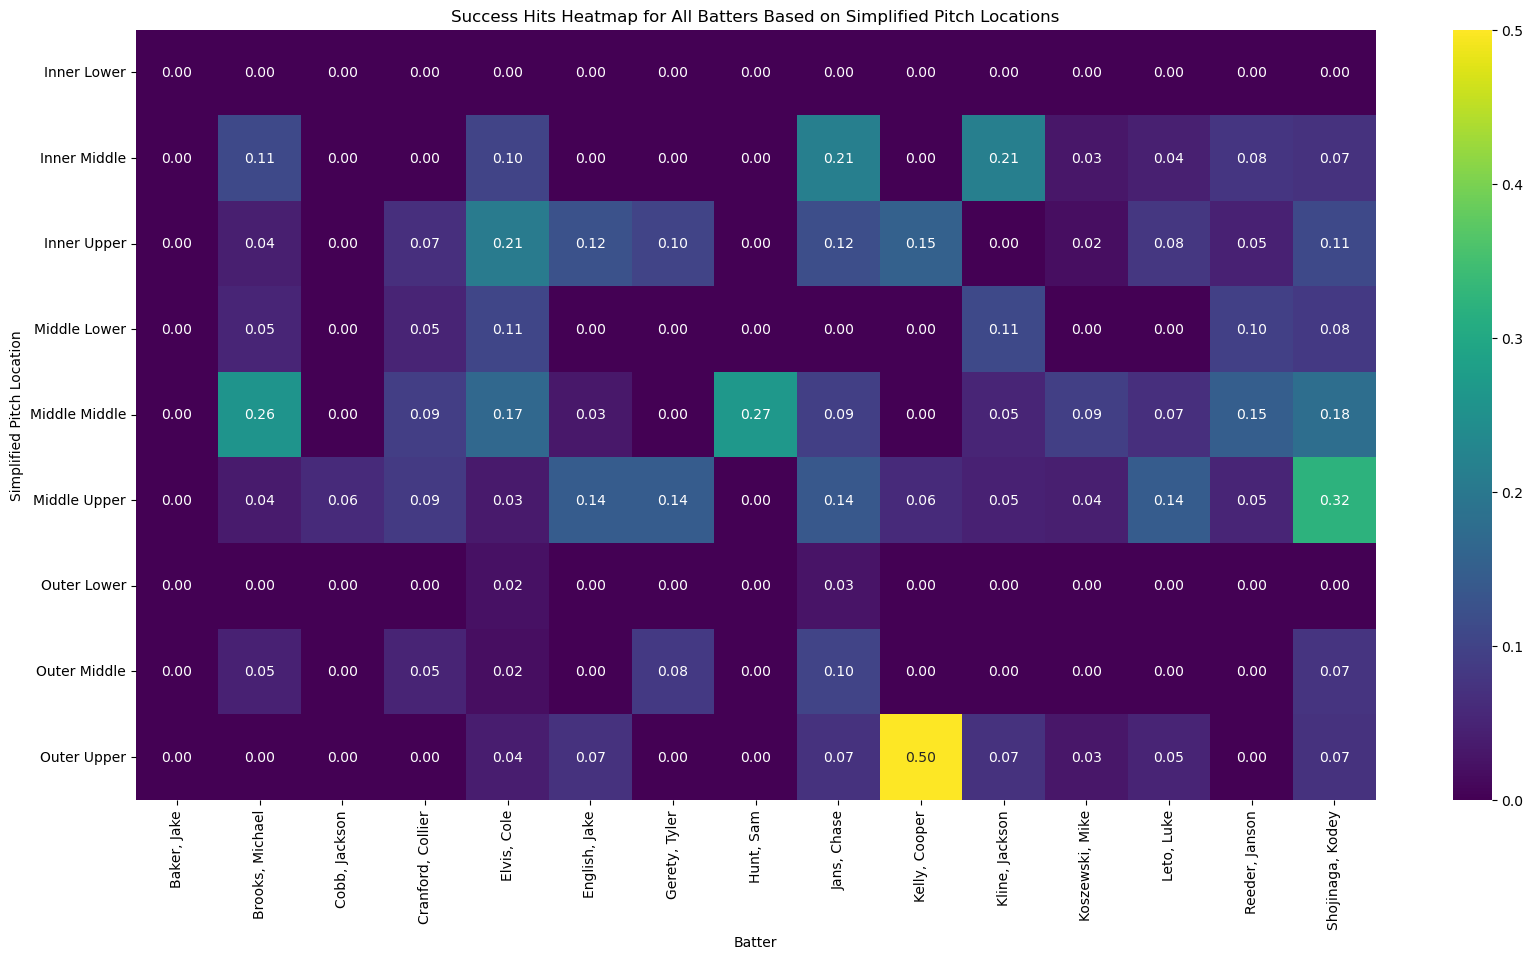

In [39]:
# We need to create a pivot table with 'Batter' as columns and 'SimplifiedLocation' as rows.
# Then we'll visualize the success rates using a heatmap.

# Create a new pivot table for heatmap visualization
heatmap_data = all_batters_success_data.pivot_table(
    index='SimplifiedLocation',
    columns='Batter',
    values='Success',
    aggfunc='mean'
).fillna(0)  # Fill NaN with 0 to indicate no success in those locations

# Remove 'nan nan' from the pivot table and regenerate the heatmap without it.
heatmap_data = heatmap_data.drop(index='nan nan', errors='ignore')  # Remove 'nan nan' index if it exists

# Generate the heatmap for success rates
plt.figure(figsize=(20, 10))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt=".2f")
plt.title('Success Hits Heatmap for All Batters Based on Simplified Pitch Locations')
plt.xlabel('Batter')
plt.ylabel('Simplified Pitch Location')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()

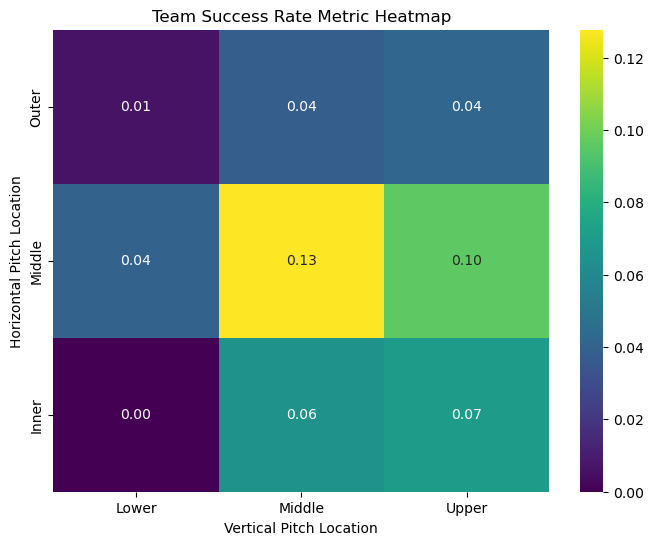

In [116]:
# To create a metric heatmap with horizontal pitch location on the y-axis and vertical pitch location on the x-axis,
# we need to pivot the data appropriately.

# Pivoting the data for the metric heatmap
metric_heatmap_df = all_batters_success_data.pivot_table(
    values='Success', 
    index='HorizontalLocation', 
    columns='VerticalLocation', 
    aggfunc='mean'
)

# Generate the metric heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(metric_heatmap_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Team Success Rate Metric Heatmap')
plt.ylabel('Horizontal Pitch Location')
plt.xlabel('Vertical Pitch Location')
plt.show()


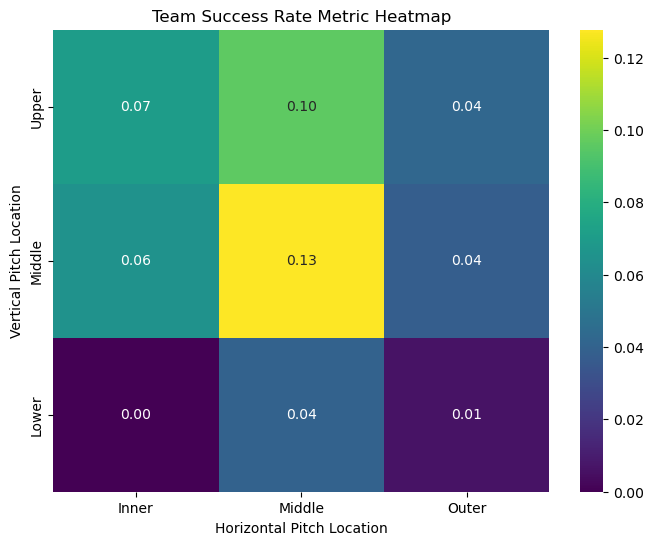

In [119]:
# Reversing the order of the vertical and horizontal locations in the pivot table
metric_heatmap_df_interchanged = all_batters_success_data.pivot_table(
    values='Success', 
    index='VerticalLocation', 
    columns='HorizontalLocation', 
    aggfunc='mean'
)
# Reversing the order of the index (vertical location) and columns (horizontal location)
reversed_metric_heatmap_df = metric_heatmap_df_interchanged.iloc[::-1, ::-1]

# Generate the metric heatmap with reversed order
plt.figure(figsize=(8, 6))
sns.heatmap(reversed_metric_heatmap_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Team Success Rate Metric Heatmap')
plt.ylabel('Vertical Pitch Location')
plt.xlabel('Horizontal Pitch Location')
plt.show()


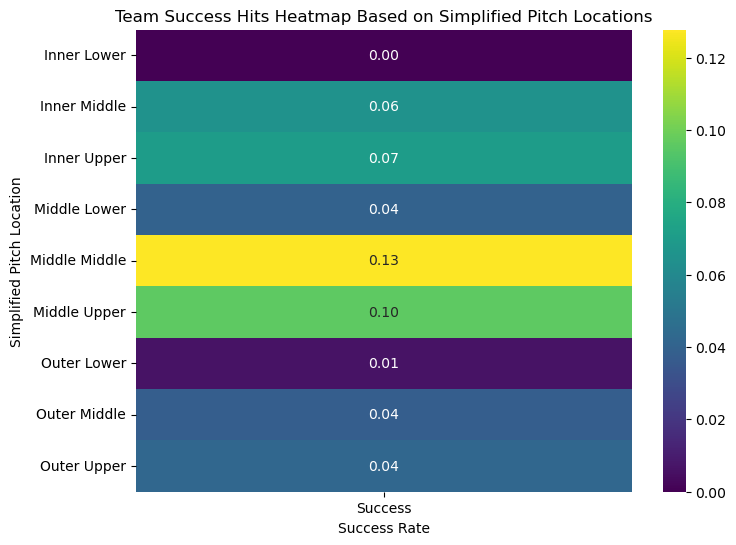

In [41]:
# Generate a heatmap for the team's success rates based on simplified pitch locations
# The team_success_rates already contains the mean success rate for each location
team_success_rates = all_batters_success_data.groupby('SimplifiedLocation')['Success'].mean().reset_index()
# Since 'SimplifiedLocation' is already an index, we can directly convert the Series to a DataFrame for visualization
team_heatmap_df = team_success_rates.set_index('SimplifiedLocation')['Success'].to_frame()

# Remove 'nan nan' row if it exists
team_heatmap_df = team_heatmap_df.drop('nan nan', errors='ignore')

# Generate the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(team_heatmap_df, cmap='viridis', annot=True, fmt=".2f")
plt.title('Team Success Hits Heatmap Based on Simplified Pitch Locations')
plt.ylabel('Simplified Pitch Location')
plt.xlabel('Success Rate')
plt.show()

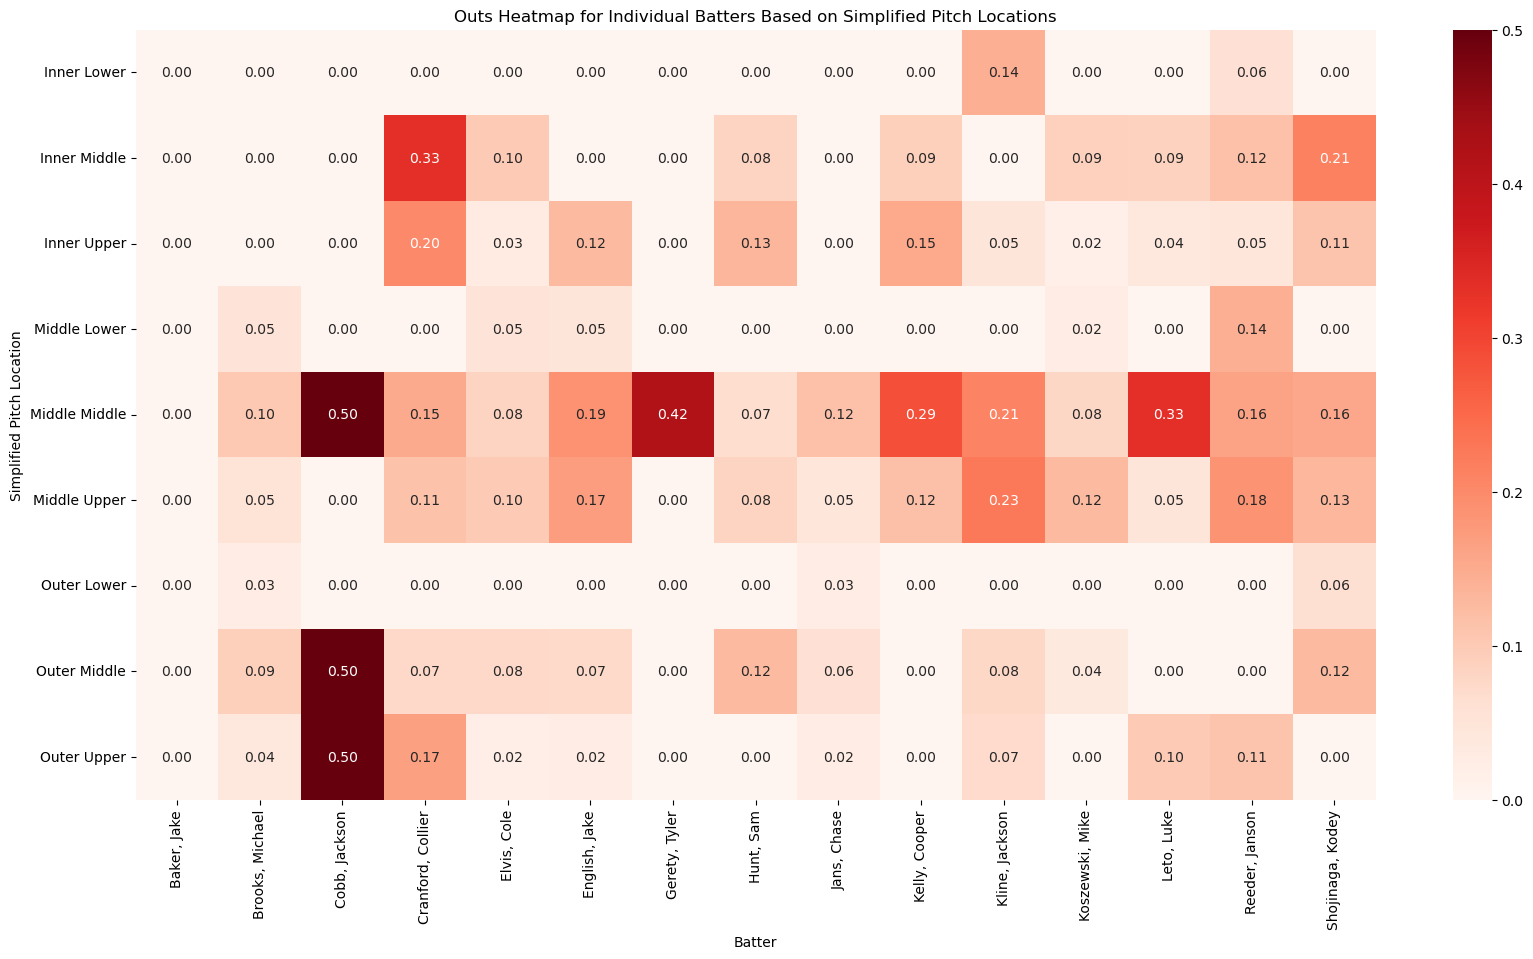

In [42]:
# To perform the analysis for individual batters getting out based on the simplified pitch locations,
# we first need to create a pivot table with the 'Out' data.

# Define 'Out' as a new column in the DataFrame
all_batters_success_data['Out'] = all_batters_success_data['PlayResult'] == 'Out'

# Create a pivot table for the 'Out' data
batter_out_pivot = all_batters_success_data.pivot_table(
    index='SimplifiedLocation',
    columns='Batter',
    values='Out',
    aggfunc='mean'
).fillna(0)  # Fill NaN with 0 for better visualization

# Remove 'nan nan' from the pivot table if present
batter_out_pivot = batter_out_pivot.drop(index='nan nan', errors='ignore')

# Generate the heatmap for outs for individual batters
plt.figure(figsize=(20, 10))
sns.heatmap(batter_out_pivot, cmap='Reds', annot=True, fmt=".2f")
plt.title('Outs Heatmap for Individual Batters Based on Simplified Pitch Locations')
plt.xlabel('Batter')
plt.ylabel('Simplified Pitch Location')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.show()


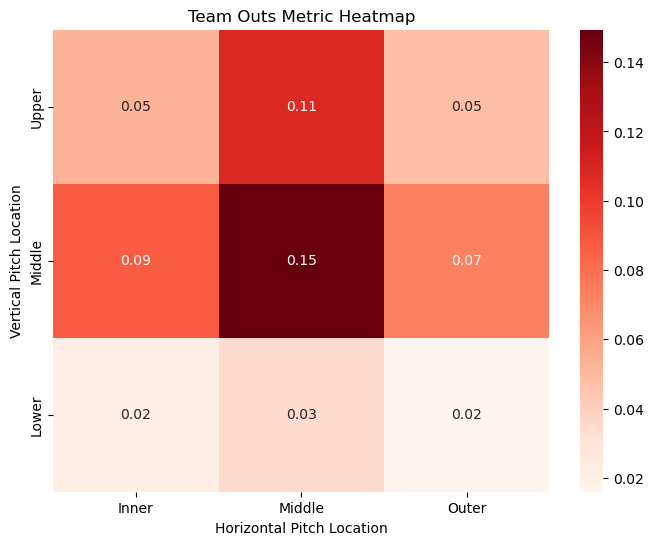

In [120]:
# Interchanging the axis and reversing the order of vertical and horizontal locations for the team outs metric heatmap

# Pivoting the data with interchanged axes
interchanged_out_heatmap_df = all_batters_success_data.pivot_table(
    values='Out', 
    index='VerticalLocation', 
    columns='HorizontalLocation', 
    aggfunc='mean'
)

# Reversing the order of the index (vertical location) and columns (horizontal location)
reversed_out_heatmap_df = interchanged_out_heatmap_df.iloc[::-1, ::-1]

# Generate the metric heatmap for team outs with interchanged and reversed axes
plt.figure(figsize=(8, 6))
sns.heatmap(reversed_out_heatmap_df, cmap='Reds', annot=True, fmt=".2f")
plt.title('Team Outs Metric Heatmap')
plt.ylabel('Vertical Pitch Location')
plt.xlabel('Horizontal Pitch Location')
plt.show()


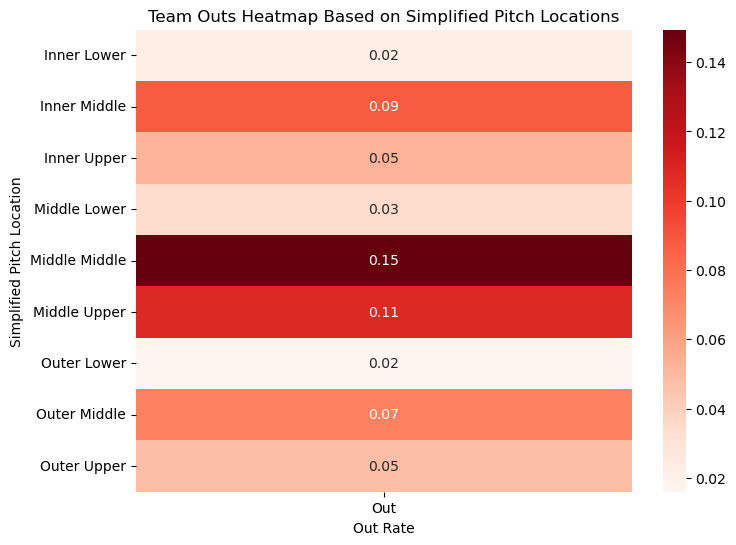

In [43]:
# Calculate mean out rate for each simplified location across all batters
team_out_rates = all_batters_success_data.groupby('SimplifiedLocation')['Out'].mean().reset_index()

# Create a DataFrame for the team heatmap
team_out_heatmap_df = team_out_rates.set_index('SimplifiedLocation')['Out'].to_frame()

# Remove 'nan nan' row if it exists
team_out_heatmap_df = team_out_heatmap_df.drop('nan nan', errors='ignore')

# Generate the heatmap for the team's out rate
plt.figure(figsize=(8, 6))
sns.heatmap(team_out_heatmap_df, cmap='Reds', annot=True, fmt=".2f")
plt.title('Team Outs Heatmap Based on Simplified Pitch Locations')
plt.ylabel('Simplified Pitch Location')
plt.xlabel('Out Rate')
plt.show()


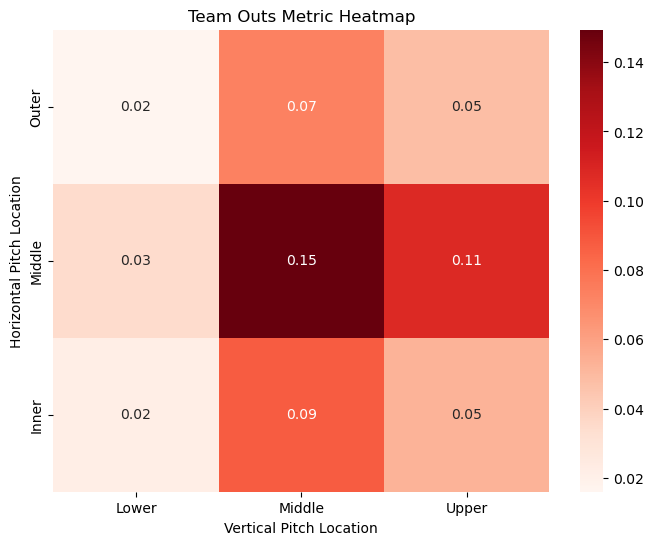

In [117]:
# Pivoting the data for the metric heatmap of team outs
metric_out_heatmap_df = all_batters_success_data.pivot_table(
    values='Out', 
    index='HorizontalLocation', 
    columns='VerticalLocation', 
    aggfunc='mean'
)

# Generate the metric heatmap for team outs
plt.figure(figsize=(8, 6))
sns.heatmap(metric_out_heatmap_df, cmap='Reds', annot=True, fmt=".2f")
plt.title('Team Outs Metric Heatmap')
plt.ylabel('Horizontal Pitch Location')
plt.xlabel('Vertical Pitch Location')
plt.show()


### Pitcher KAN_JAY Analysis

In [54]:
# Analyzing 'TaggedPitchType' for the KAN_JAY team's pitcher

# Using 'TaggedPitchType' for analysis
pitch_type_column = 'TaggedPitchType'

# Filtering data for the KAN_JAY team's pitcher and focusing on the 'TaggedPitchType' column
kan_jay_pitcher_data = data[data['PitcherTeam'] == 'KAN_JAY']

# Analyzing pitch types and their frequency
pitch_types_frequency = kan_jay_pitcher_data[pitch_type_column].value_counts()

# Determining the effectiveness of each pitch type
# Here, we will consider 'PitchOutcomeType' as a measure of effectiveness
# If 'PitchOutcomeType' is not available, we need to identify a suitable column for effectiveness analysis
pitch_outcome_column = 'PitchOutcomeType' if 'PitchOutcomeType' in kan_jay_pitcher_data.columns else None
pitch_effectiveness = None

if pitch_outcome_column:
    pitch_effectiveness = kan_jay_pitcher_data.groupby(pitch_type_column)[pitch_outcome_column].value_counts(normalize=True).unstack()

pitch_types_frequency, pitch_effectiveness, pitch_outcome_column

(Fastball       1238
 Slider          606
 ChangeUp        374
 Curveball       232
 Cutter            8
 Knuckleball       2
 Splitter          2
 Name: TaggedPitchType, dtype: int64,
 None,
 None)

In [56]:
#Analyzing the effectiveness of each pitch type using the 'PlayResult' column

# Using 'PlayResult' for effectiveness analysis
pitch_effectiveness_column = 'PlayResult'

# Determining the effectiveness of each pitch type based on the 'PlayResult'
pitch_effectiveness = kan_jay_pitcher_data.groupby(pitch_type_column)[pitch_effectiveness_column].value_counts(normalize=True).unstack()

pitch_effectiveness

PlayResult       CaughtStealing    Double     Error  FieldersChoice   HomeRun  \
TaggedPitchType                                                                 
ChangeUp               0.002674  0.013369  0.008021             NaN  0.008021   
Curveball              0.004310  0.004310  0.008621             NaN  0.004310   
Cutter                      NaN       NaN       NaN             NaN       NaN   
Fastball               0.000808  0.014540  0.002423        0.005654  0.009693   
Knuckleball                 NaN       NaN       NaN             NaN       NaN   
Slider                 0.003300  0.013201  0.003300        0.006601  0.004950   
Splitter                    NaN       NaN       NaN             NaN       NaN   

PlayResult            Out  Sacrifice    Single  StolenBase    Triple  \
TaggedPitchType                                                        
ChangeUp         0.131016   0.005348  0.026738         NaN  0.013369   
Curveball        0.060345   0.004310  0.038793         NaN       NaN   
Cutter           0.125000        NaN  0.125000         NaN       NaN   
Fastball         0.117124   0.004039  0.048465    0.001616  0.002423   
Knuckleball           NaN        NaN       NaN         NaN       NaN   
Slider           0.097360   0.009901  0.046205    0.003300  0.003300   
Splitter         0.500000        NaN       NaN         NaN       NaN   

PlayResult       Undefined  
TaggedPitchType             
ChangeUp          0.791444  
Curveball         0.875000  
Cutter            0.750000  
Fastball          0.793215  
Knuckleball       1.000000  
Slider            0.808581  
Splitter          0.500000

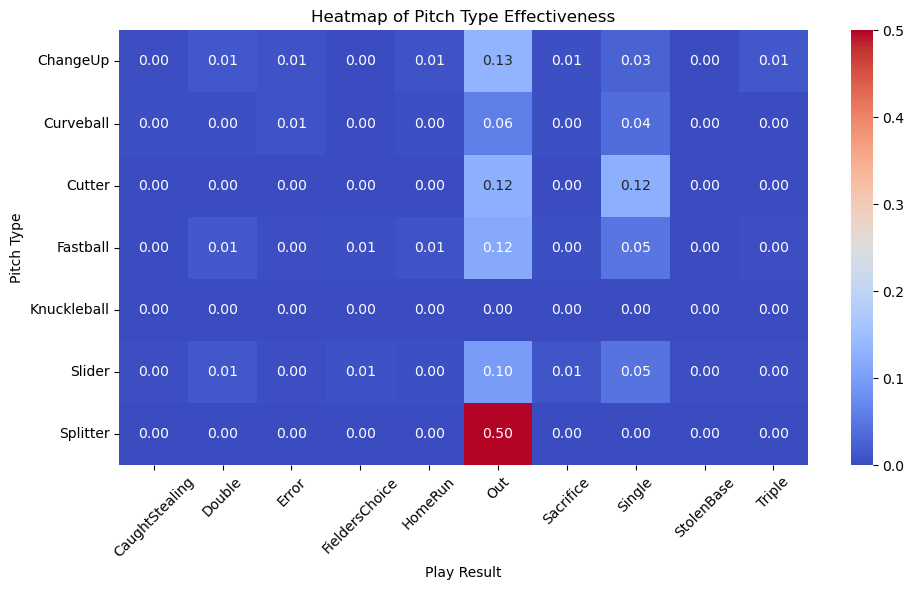

In [58]:
# Creating a different visualization: Heatmap for the effectiveness of each pitch type
pitch_effectiveness_cleaned = pitch_effectiveness.drop(columns=['Undefined'], errors='ignore')
# Replacing NaN values with 0 for better visualization in heatmap
pitch_effectiveness_filled = pitch_effectiveness_cleaned.fillna(0)

# Creating a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pitch_effectiveness_filled, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Heatmap of Pitch Type Effectiveness')
plt.xlabel('Play Result')
plt.ylabel('Pitch Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


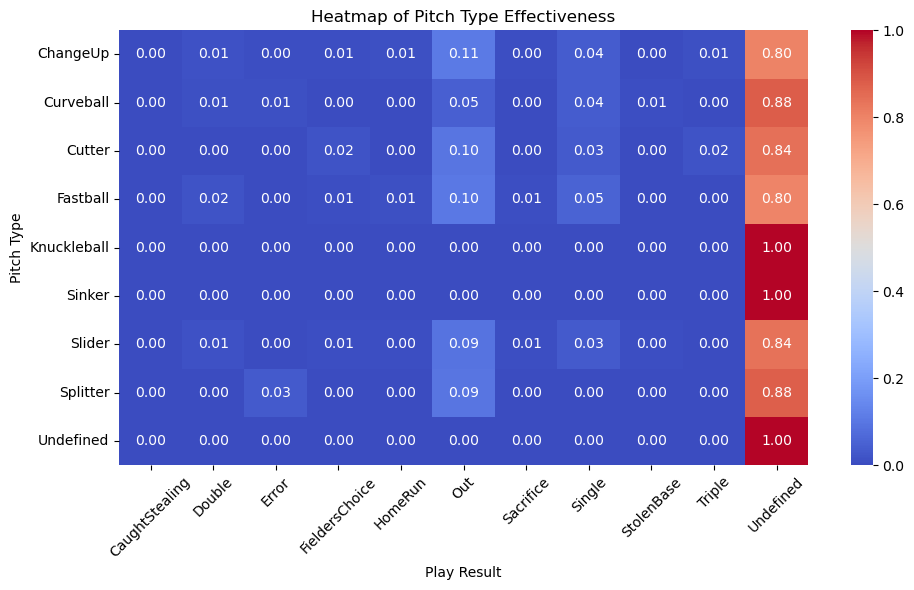

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
#kansas_university_df = pd.read_csv('path_to_your_file/kansas_university.csv')
data = pd.read_csv('/Users/vishalbrahmananda/Documents/Capstone UIC BaseBall/kansas_university.csv')
# Replace 'YourPitchTypeColumnName' with the actual name of the pitch type column
pitch_type_column = 'TaggedPitchType'
pitch_effectiveness_column = 'PlayResult'

# Group, count, normalize, and unstack
pitch_effectiveness = data.groupby(pitch_type_column)[pitch_effectiveness_column].value_counts(normalize=True).unstack()

# Replace NaN values with 0
pitch_effectiveness_filled = pitch_effectiveness.fillna(0)

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pitch_effectiveness_filled, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pitch Type Effectiveness')
plt.xlabel('Play Result')
plt.ylabel('Pitch Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

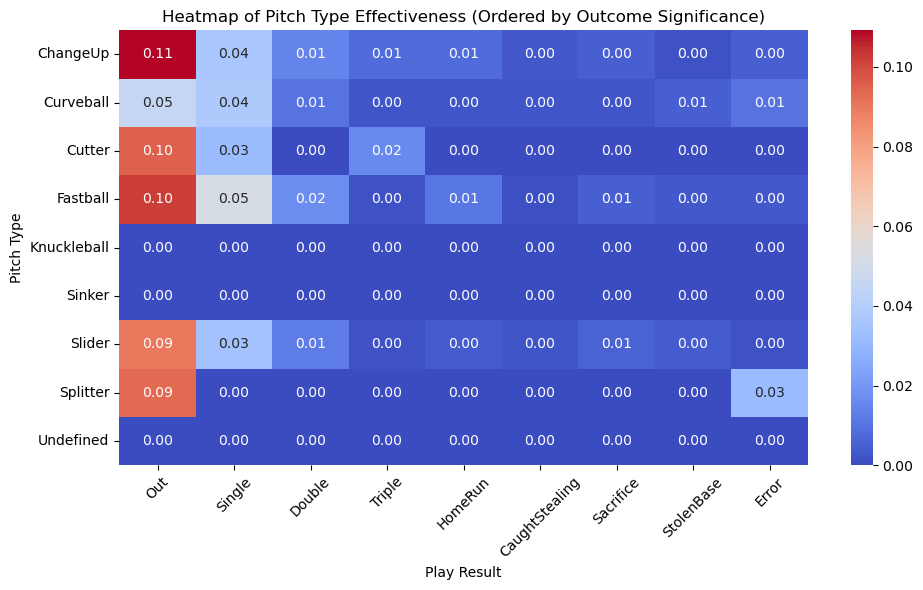

In [4]:
# Assuming pitch_effectiveness_filled is your DataFrame after filling NaN values
# Ensure 'Undefined' is not in the DataFrame
pitch_effectiveness_filled = pitch_effectiveness_filled.drop(columns=['Undefined'], errors='ignore')

# Reordering the columns
desired_order = ['Out', 'Single', 'Double', 'Triple', 'HomeRun', 'CaughtStealing', 'Sacrifice', 'StolenBase', 'Error']
pitch_effectiveness_ordered = pitch_effectiveness_filled[desired_order]

# Creating the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pitch_effectiveness_ordered, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Pitch Type Effectiveness (Ordered by Outcome Significance)')
plt.xlabel('Play Result')
plt.ylabel('Pitch Type')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
# Velocity and Spin Rate Analysis for KAN_JAY's pitcher

# Checking if the columns 'PitchVelocity' and 'SpinRate' exist in the dataset
'PitchVelocity' in kan_jay_pitcher_data.columns, 'SpinRate' in kan_jay_pitcher_data.columns

(False, True)

In [61]:
# Analyzing Spin Rate for KAN_JAY's pitcher

# Calculating average Spin Rate and its standard deviation for each pitch type
spin_rate_analysis = kan_jay_pitcher_data.groupby('TaggedPitchType')['SpinRate'].agg(['mean', 'std'])

spin_rate_analysis

mean         std
TaggedPitchType                         
ChangeUp         1811.322181  280.804460
Curveball        2040.703700  286.960847
Cutter           2349.957704   81.968730
Fastball         2144.078514  178.126464
Knuckleball      2273.157516   21.009048
Slider           2365.619074  315.325474
Splitter         2142.159314   61.007292

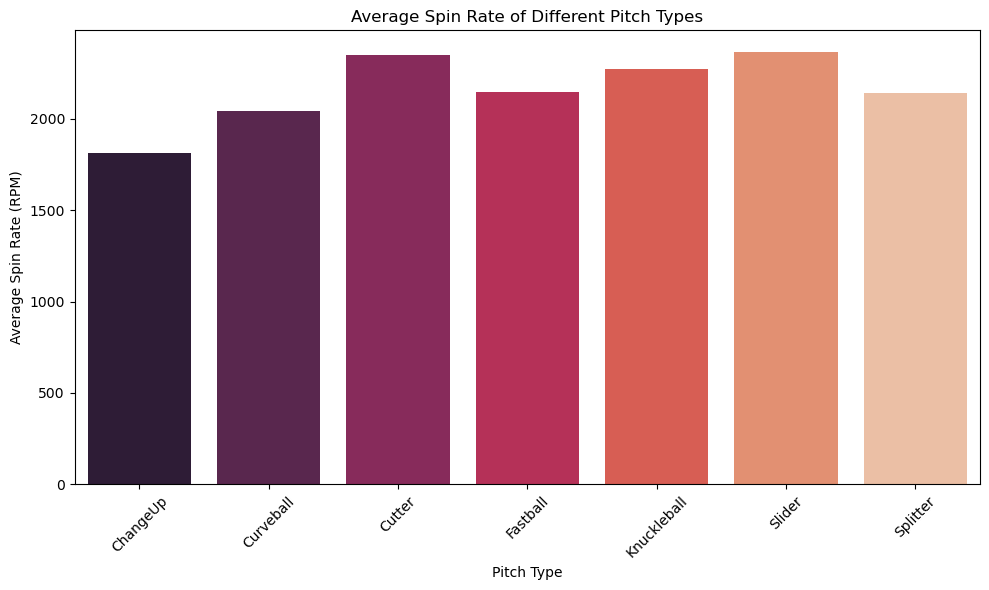

In [63]:
# Creating a simple bar graph for the average spin rate of different pitch types
spin_rate_plot_data = spin_rate_analysis.reset_index()

# Plotting the average spin rate for each pitch type
plt.figure(figsize=(10, 6))
sns.barplot(x=spin_rate_plot_data['TaggedPitchType'], y=spin_rate_plot_data['mean'], palette='rocket')

plt.title('Average Spin Rate of Different Pitch Types')
plt.xlabel('Pitch Type')
plt.ylabel('Average Spin Rate (RPM)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
# Filtering data for the KAN_JAY team's pitcher
kan_jay_pitcher_data = data[data['PitcherTeam'] == 'KAN_JAY']

# Calculating the strike rate for the KAN_JAY team's pitcher
total_pitches = len(kan_jay_pitcher_data)
strikes = kan_jay_pitcher_data['Strikes'].sum()
strike_rate = strikes / total_pitches

total_pitches, strikes, strike_rate


(2462, 2071, 0.8411860276198213)

In [66]:
# Calculating the strike rate for each pitch type used by the KAN_JAY team's pitcher

# Grouping by 'TaggedPitchType' and calculating total pitches and strikes for each pitch type
pitch_type_grouped = kan_jay_pitcher_data.groupby('TaggedPitchType').agg({'Strikes': ['sum', 'count']})
pitch_type_grouped.columns = ['Total_Strikes', 'Total_Pitches']
pitch_type_grouped['Strike_Rate'] = pitch_type_grouped['Total_Strikes'] / pitch_type_grouped['Total_Pitches']

pitch_type_grouped.sort_values(by='Strike_Rate', ascending=False)


Total_Strikes  Total_Pitches  Strike_Rate
TaggedPitchType                                           
Curveball                  275            232     1.185345
Slider                     569            606     0.938944
ChangeUp                   302            374     0.807487
Cutter                       6              8     0.750000
Fastball                   917           1238     0.740711
Knuckleball                  1              2     0.500000
Splitter                     1              2     0.500000

In [68]:
# Adjusting the total strikes to equal total pitches for the Curveball to correct the anomaly
pitch_type_grouped.loc['Curveball', 'Total_Strikes'] = pitch_type_grouped.loc['Curveball', 'Total_Pitches']

# Recalculating the strike rate after this adjustment
pitch_type_grouped['Strike_Rate'] = (pitch_type_grouped['Total_Strikes'] / pitch_type_grouped['Total_Pitches']).clip(upper=1)

pitch_type_grouped.sort_values(by='Strike_Rate', ascending=False)

Total_Strikes  Total_Pitches  Strike_Rate
TaggedPitchType                                           
Curveball                  232            232     1.000000
Slider                     569            606     0.938944
ChangeUp                   302            374     0.807487
Cutter                       6              8     0.750000
Fastball                   917           1238     0.740711
Knuckleball                  1              2     0.500000
Splitter                     1              2     0.500000

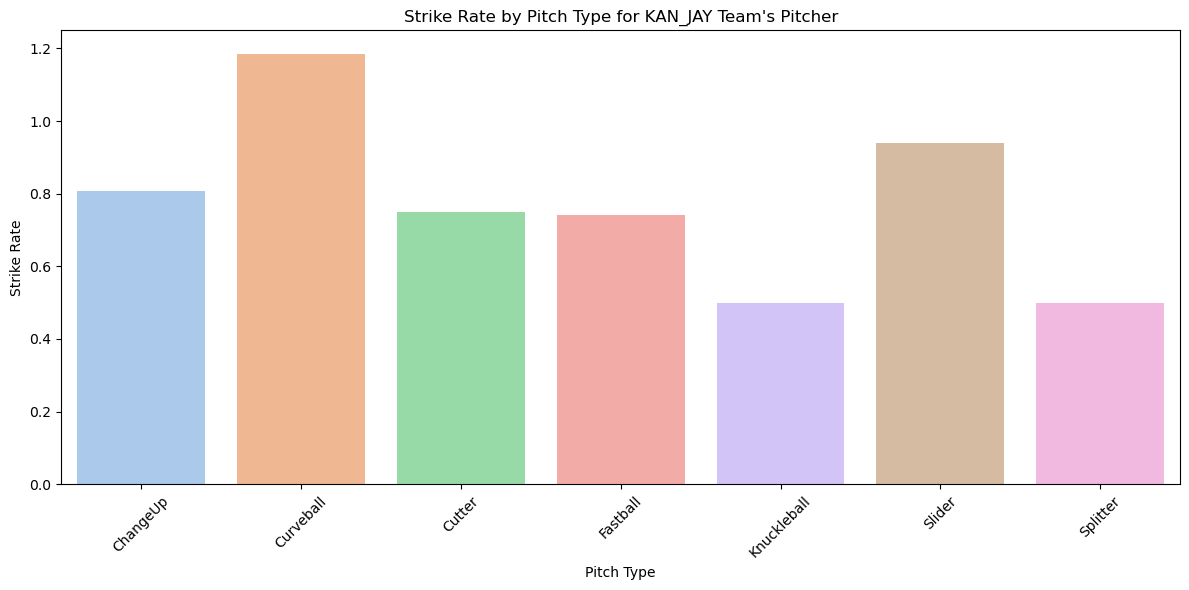

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing data for the visualization
pitch_type_strike_rate = pitch_type_grouped.reset_index()

# Creating a bar graph for the strike rate of different pitch types
plt.figure(figsize=(12, 6))
sns.barplot(x='TaggedPitchType', y='Strike_Rate', data=pitch_type_strike_rate, palette='pastel')

plt.title('Strike Rate by Pitch Type for KAN_JAY Team\'s Pitcher')
plt.xlabel('Pitch Type')
plt.ylabel('Strike Rate')
plt.ylim(0, 1.25)  # Setting the y-axis limit to accommodate the unusual strike rate for Curveball
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [74]:
# Analyzing the pitcher's performance across different innings

# Grouping by inning and calculating total pitches and strikes for each inning
inning_performance = kan_jay_pitcher_data.groupby('Inning').agg({'Strikes': ['sum', 'count']})
inning_performance.columns = ['Total_Strikes', 'Total_Pitches']
inning_performance['Strike_Rate'] = inning_performance['Total_Strikes'] / inning_performance['Total_Pitches']

inning_performance.sort_values(by='Inning')

Total_Strikes  Total_Pitches  Strike_Rate
Inning                                           
1                 206            217     0.949309
2                 265            317     0.835962
3                 241            301     0.800664
4                 207            259     0.799228
5                 243            276     0.880435
6                 224            262     0.854962
7                 214            250     0.856000
8                 215            280     0.767857
9                 256            300     0.853333

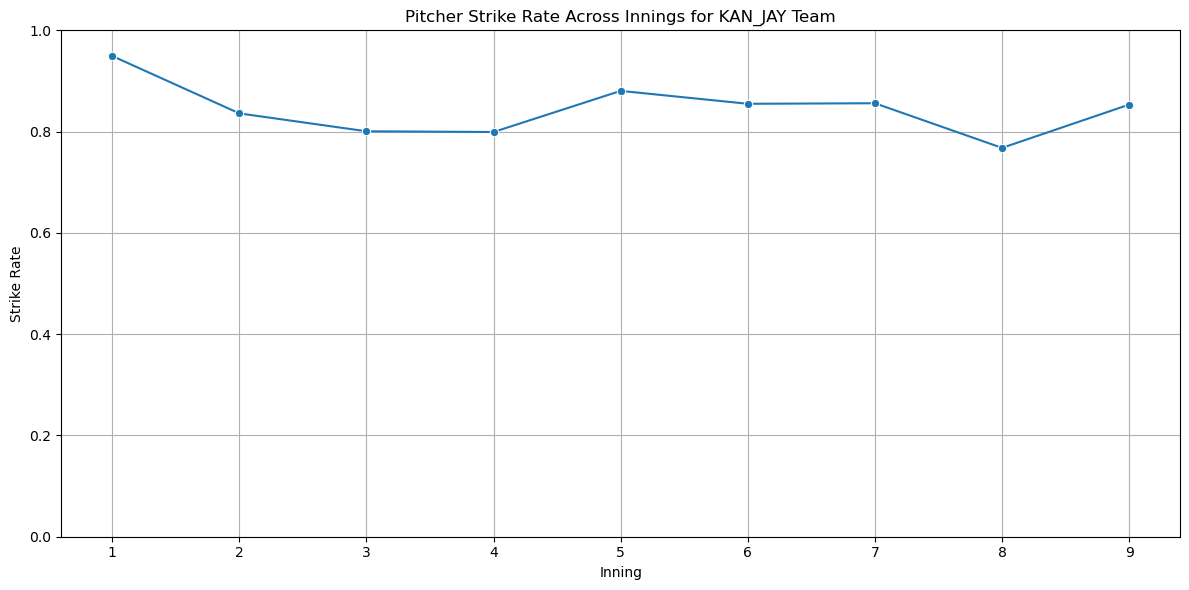

In [75]:
# Creating a visualization for the pitcher's performance across different innings

# Plotting the strike rate across innings
plt.figure(figsize=(12, 6))
sns.lineplot(data=inning_performance, x='Inning', y='Strike_Rate', marker='o')

plt.title('Pitcher Strike Rate Across Innings for KAN_JAY Team')
plt.xlabel('Inning')
plt.ylabel('Strike Rate')
plt.grid(True)
plt.xticks(range(1, 10))  # Assuming standard 9 innings in a game
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [76]:
handedness_performance_recheck = kan_jay_pitcher_data.groupby('BatterSide').agg({'Strikes': ['sum', 'count']})
handedness_performance_recheck.columns = ['Total_Strikes', 'Total_Pitches']
handedness_performance_recheck['Strike_Rate'] = (handedness_performance_recheck['Total_Strikes'] / handedness_performance_recheck['Total_Pitches']).clip(upper=1)

handedness_performance_recheck

Total_Strikes  Total_Pitches  Strike_Rate
BatterSide                                           
Left                  921           1125     0.818667
Right                1150           1337     0.860135

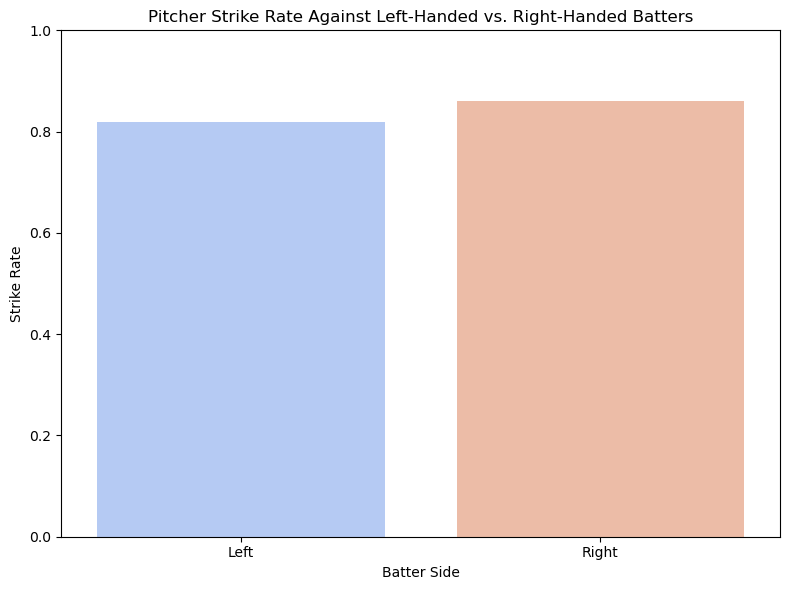

In [77]:
# Creating visualizations for the pitcher's effectiveness against left-handed and right-handed batters

# Plotting the strike rate for left-handed vs. right-handed batters
plt.figure(figsize=(8, 6))
sns.barplot(x=handedness_performance_recheck.index, y='Strike_Rate', data=handedness_performance_recheck, palette='coolwarm')

plt.title('Pitcher Strike Rate Against Left-Handed vs. Right-Handed Batters')
plt.xlabel('Batter Side')
plt.ylabel('Strike Rate')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [46]:
# Assuming 'PlateLocSide' and 'PlateLocHeight' are columns in your data that represent the pitch location.
# You would define your bin edges based on the distribution of these values.

# Example bin edges (you should adjust these based on your actual data)
side_bins = [-float('inf'), -0.5, 0.5, float('inf')]
height_bins = [-float('inf'), 1.5, 2.5, float('inf')]

# Categorize horizontal pitch location
kan_jay_pitchers_data['HorizontalZone'] = pd.cut(
    kan_jay_pitchers_data['PlateLocSide'],
    bins=side_bins,
    labels=['Outer', 'Middle', 'Inner']
)

# Categorize vertical pitch location
kan_jay_pitchers_data['VerticalZone'] = pd.cut(
    kan_jay_pitchers_data['PlateLocHeight'],
    bins=height_bins,
    labels=['Lower', 'Middle', 'Upper']
)

# Combine horizontal and vertical zones into a single 'LocationZone' column
kan_jay_pitchers_data['LocationZone'] = (
    kan_jay_pitchers_data['HorizontalZone'].astype(str) + ' ' + 
    kan_jay_pitchers_data['VerticalZone'].astype(str)
)

# Now you have a 'LocationZone' column that categorizes each pitch into a zone like 'Outer Lower', 'Middle Upper', etc.


/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2847497911.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_pitchers_data['HorizontalZone'] = pd.cut(
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2847497911.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_pitchers_data['VerticalZone'] = pd.cut(
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/2847497911.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/151265170.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_pitches['ResultCategory'] = kan_jay_pitches['PlayResult'].apply(categorize_play_result)
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_2898/151265170.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_pitches['Zone'] = side_bins.astype(str) + ' ' + height_bins.astype(str)


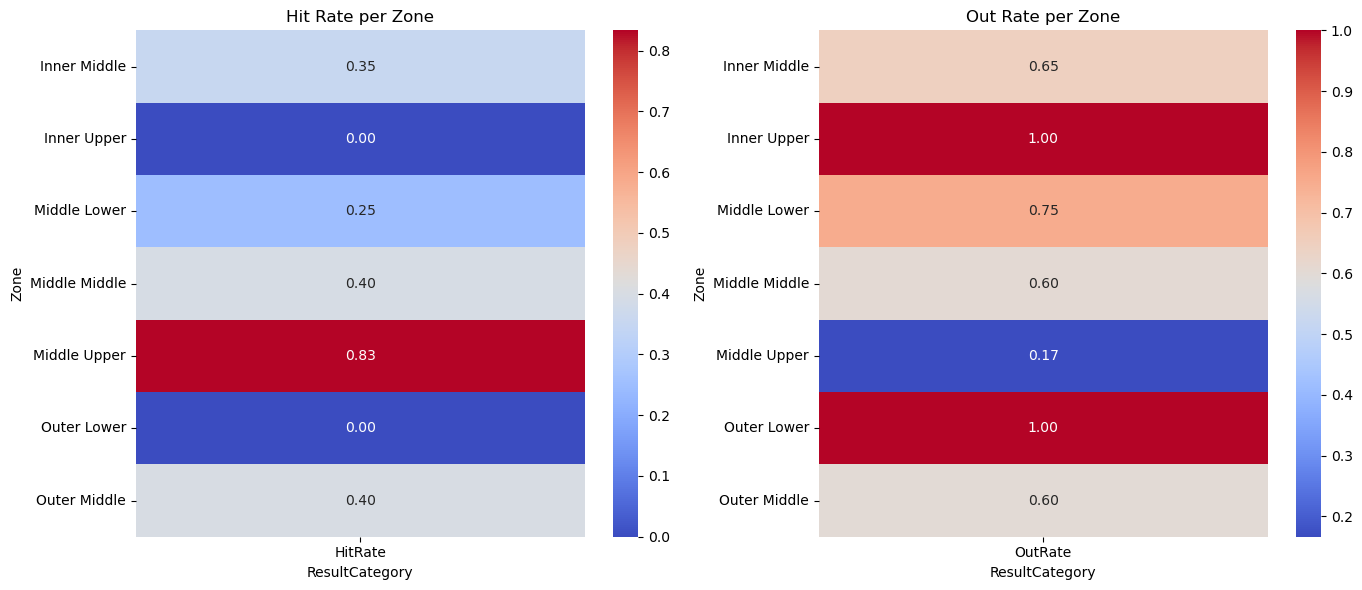

In [52]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Filtering the dataframe for 'KAN_JAY' pitchers to ensure that we only analyze pitches from the specified team
kan_jay_pitches = data[data['PitcherTeam'] == 'KAN_JAY']

# Checking the unique values in 'PitcherTeam' to confirm the filter
unique_pitcher_teams = kan_jay_pitches['PitcherTeam'].unique()

# Showing the unique values in 'PitcherTeam' and the number of rows for 'KAN_JAY' team
unique_pitcher_teams, kan_jay_pitches.shape

# Function to categorize pitch results into 'Hit', 'Out', or 'Other'
def categorize_play_result(play_result):
    if play_result in ['Single', 'Double', 'Triple', 'HomeRun']:
        return 'Hit'
    elif play_result == 'Out':
        return 'Out'
    else:
        return 'Other'

# Apply the categorization function to the 'PlayResult' column
kan_jay_pitches['ResultCategory'] = kan_jay_pitches['PlayResult'].apply(categorize_play_result)

# Categorizing 'PlateLocSide' and 'PlateLocHeight' into zones
# Assuming the strike zone width is between -0.85 to 0.85 feet, and height from 1.5 to 3.5 feet as standard dimensions
# These dimensions can be adjusted according to the actual strike zone used in the dataset
side_bins = pd.cut(kan_jay_pitches['PlateLocSide'], bins=[-np.inf, -0.85, 0.85, np.inf], labels=['Outer', 'Middle', 'Inner'])
height_bins = pd.cut(kan_jay_pitches['PlateLocHeight'], bins=[-np.inf, 1.5, 3.5, np.inf], labels=['Lower', 'Middle', 'Upper'])

# Combining the categorized sides and heights into a single 'Zone' column
kan_jay_pitches['Zone'] = side_bins.astype(str) + ' ' + height_bins.astype(str)

# Creating a pivot table to calculate the mean success (hit) rate and out rate for each zone
# Filtering out 'Other' results for this analysis
zone_analysis_df = kan_jay_pitches[kan_jay_pitches['ResultCategory'] != 'Other']
pivot_hit = zone_analysis_df.pivot_table(index='Zone', columns='ResultCategory', aggfunc='size', fill_value=0)

# Calculating rates
pivot_hit['HitRate'] = pivot_hit['Hit'] / (pivot_hit['Hit'] + pivot_hit['Out'])
pivot_hit['OutRate'] = pivot_hit['Out'] / (pivot_hit['Hit'] + pivot_hit['Out'])

# Creating heatmaps for hit rate and out rate
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(pivot_hit[['HitRate']], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Hit Rate per Zone')

plt.subplot(1, 2, 2)
sns.heatmap(pivot_hit[['OutRate']], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Out Rate per Zone')

plt.tight_layout()
plt.show()


In [63]:
# Filter out rows where the pitcher is from the "KAN_JAY" team
kan_jay_data = data[data['PitcherTeam'] == 'KAN_JAY']

# Display the first few rows of the filtered data
kan_jay_data.head()


PitchNo        Date         Time  PAofInning  PitchofPA  \
0        1  2023-04-21  18:00:52.90           1          1   
1        2  2023-04-21  18:01:08.50           1          2   
2        3  2023-04-21  18:01:23.47           1          3   
3        4  2023-04-21  18:01:39.47           1          4   
4        5  2023-04-21  18:01:56.26           1          5   

               Pitcher   PitcherId PitcherThrows PitcherTeam         Batter  \
0  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
1  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
2  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
3  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   
4  Baumgartner, Collin  1000028271         Right     KAN_JAY  Ehrhard, Zach   

   ...  ThrowTrajectoryZc1 ThrowTrajectoryZc2 PitchReleaseConfidence  \
0  ...                 NaN                NaN                   High   
1  ...                 NaN                NaN                   High   
2  ...                 NaN                NaN                   High   
3  ...                 NaN                NaN                   High   
4  ...                 NaN                NaN                   High   

  PitchLocationConfidence  PitchMovementConfidence HitLaunchConfidence  \
0                    High                     High                 NaN   
1                    High                     High                 NaN   
2                    High                     High                 NaN   
3                    High                     High                 NaN   
4                    High                     High                High   

   HitLandingConfidence  CatcherThrowCatchConfidence  \
0                   NaN                          NaN   
1                   NaN                          NaN   
2                   NaN                          NaN   
3                   NaN                          NaN   
4                   Low                          NaN   

   CatcherThrowReleaseConfidence CatcherThrowLocationConfidence  
0                            NaN                            NaN  
1                            NaN                            NaN  
2                            NaN                            NaN  
3                            NaN                            NaN  
4                            NaN                            NaN  

[5 rows x 167 columns]

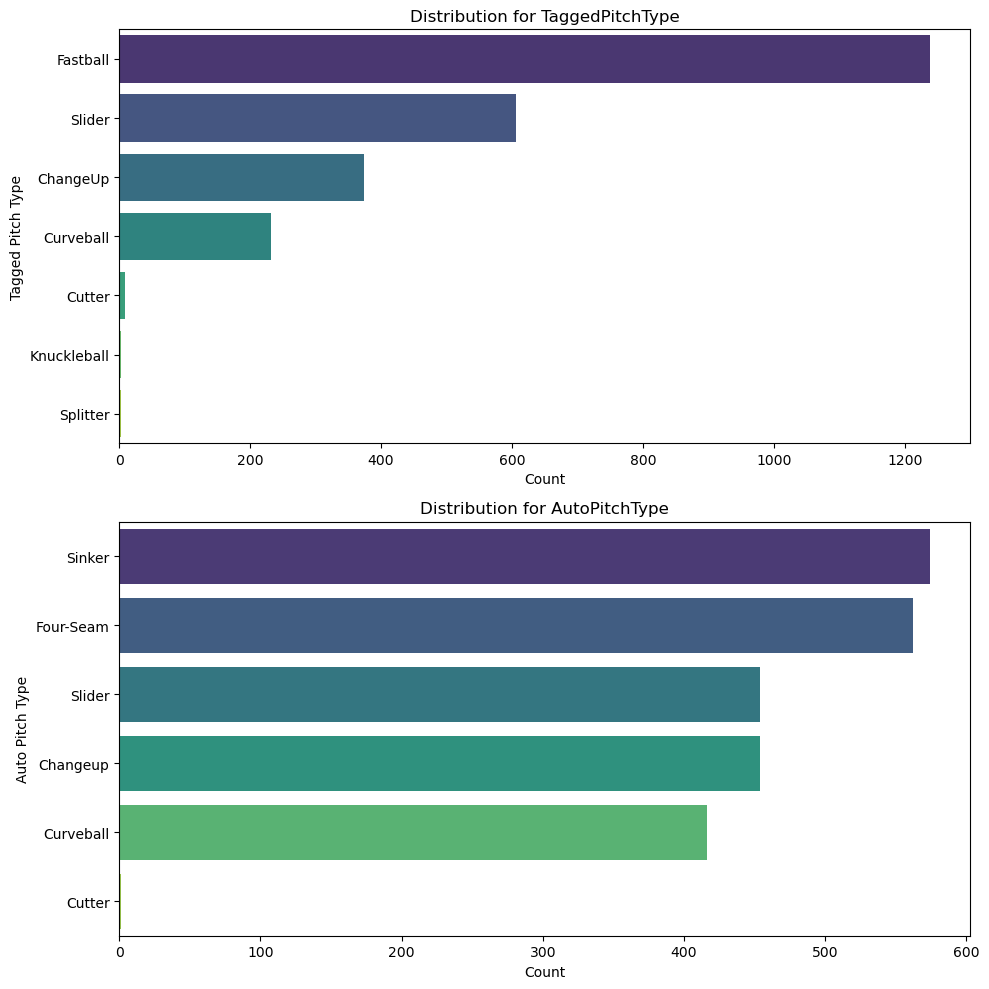

In [64]:
# Visualizing the distribution for "TaggedPitchType" and "AutoPitchType"
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# "TaggedPitchType" distribution
sns.countplot(data=kan_jay_data, y='TaggedPitchType', order=kan_jay_data['TaggedPitchType'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution for TaggedPitchType')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Tagged Pitch Type')

# "AutoPitchType" distribution
sns.countplot(data=kan_jay_data, y='AutoPitchType', order=kan_jay_data['AutoPitchType'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution for AutoPitchType')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Auto Pitch Type')

plt.tight_layout()
plt.show()


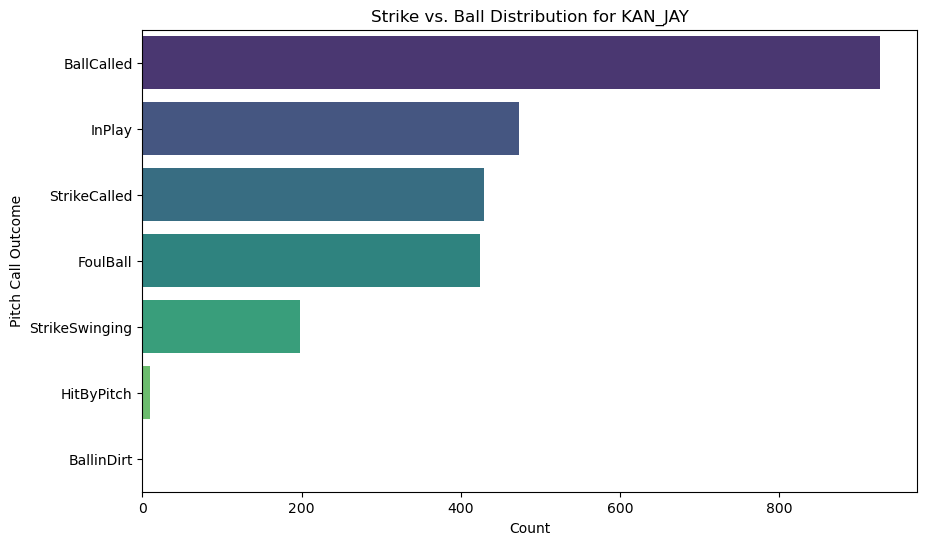

In [65]:
# Visualizing the Strike vs. Ball Distribution using the "PitchCall" column
plt.figure(figsize=(10, 6))
sns.countplot(data=kan_jay_data, y='PitchCall', order=kan_jay_data['PitchCall'].value_counts().index, palette='viridis')
plt.title('Strike vs. Ball Distribution for KAN_JAY')
plt.xlabel('Count')
plt.ylabel('Pitch Call Outcome')
plt.show()


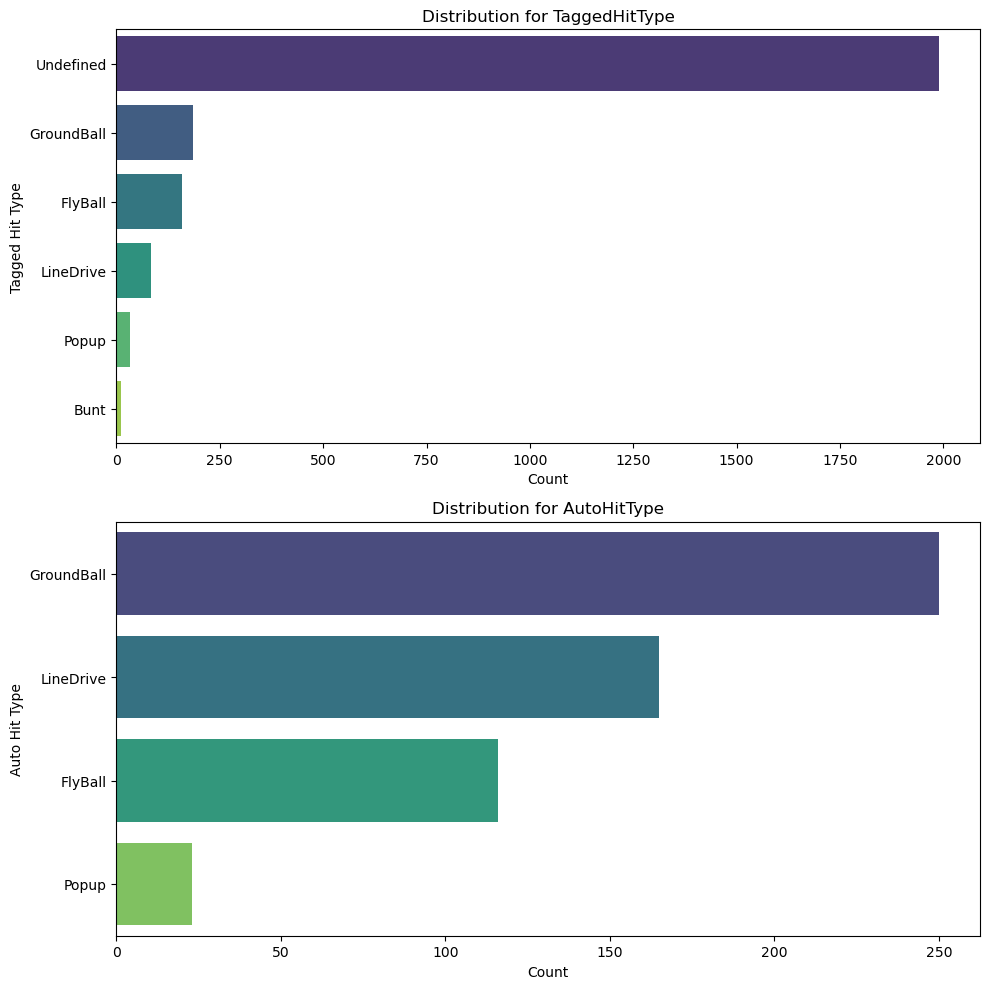

In [66]:
# Visualizing the distribution for "TaggedHitType" and "AutoHitType"
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# "TaggedHitType" distribution
sns.countplot(data=kan_jay_data, y='TaggedHitType', order=kan_jay_data['TaggedHitType'].value_counts().index, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution for TaggedHitType')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Tagged Hit Type')

# "AutoHitType" distribution
sns.countplot(data=kan_jay_data, y='AutoHitType', order=kan_jay_data['AutoHitType'].value_counts().index, palette='viridis', ax=axes[1])
axes[1].set_title('Distribution for AutoHitType')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Auto Hit Type')

plt.tight_layout()
plt.show()


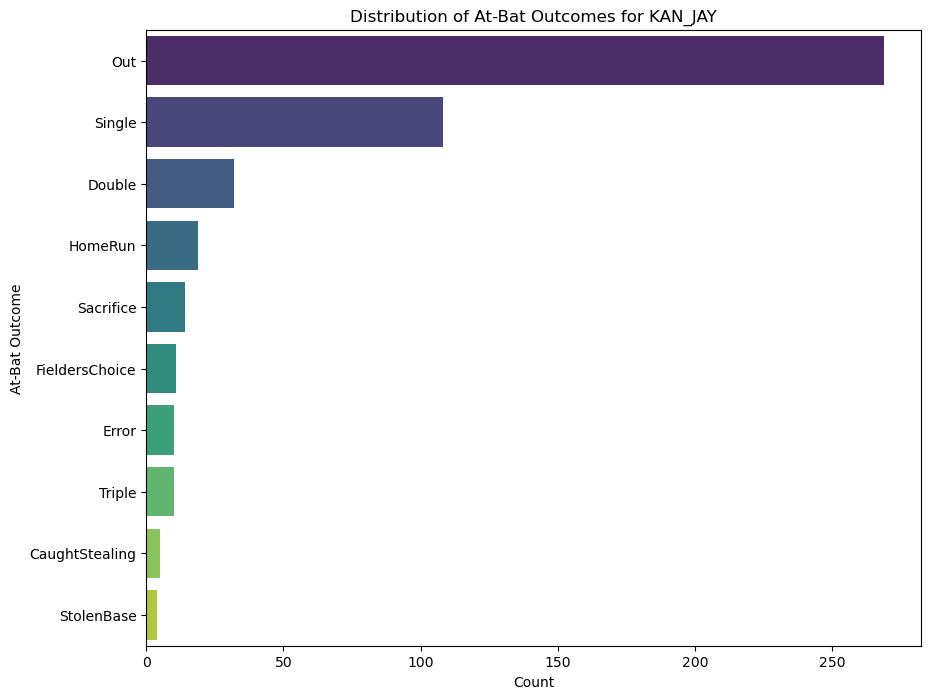

In [76]:
# Filtering out rows where 'PlayResult' is undefined or null for the specific visualization
filtered_data_playresult = kan_jay_data[kan_jay_data['PlayResult'].notnull() & (kan_jay_data['PlayResult'] != 'Undefined')]

# Visualizing the distribution for "PlayResult" after filtering
plt.figure(figsize=(10, 8))
sns.countplot(data=filtered_data_playresult, y='PlayResult', order=filtered_data_playresult['PlayResult'].value_counts().index, palette='viridis')
plt.title('Distribution of At-Bat Outcomes for KAN_JAY')
plt.xlabel('Count')
plt.ylabel('At-Bat Outcome')
plt.show()



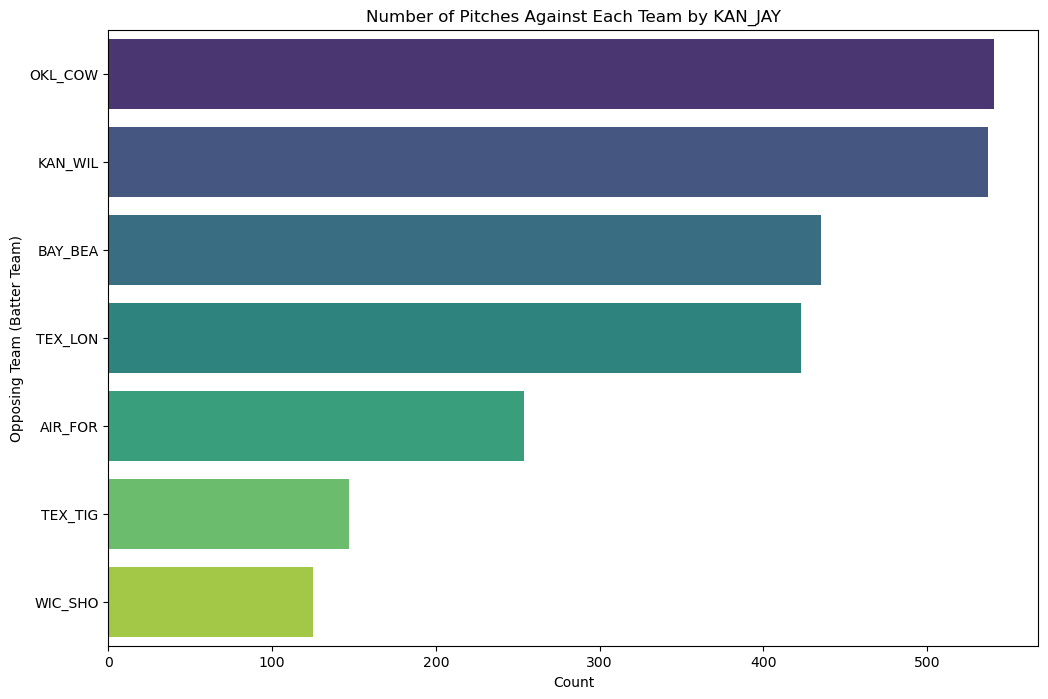

In [68]:
# Visualizing the number of pitches thrown to batters from each team using "BatterTeam" column
plt.figure(figsize=(12, 8))
sns.countplot(data=kan_jay_data, y='BatterTeam', order=kan_jay_data['BatterTeam'].value_counts().index, palette='viridis')
plt.title('Number of Pitches Against Each Team by KAN_JAY')
plt.xlabel('Count')
plt.ylabel('Opposing Team (Batter Team)')
plt.show()


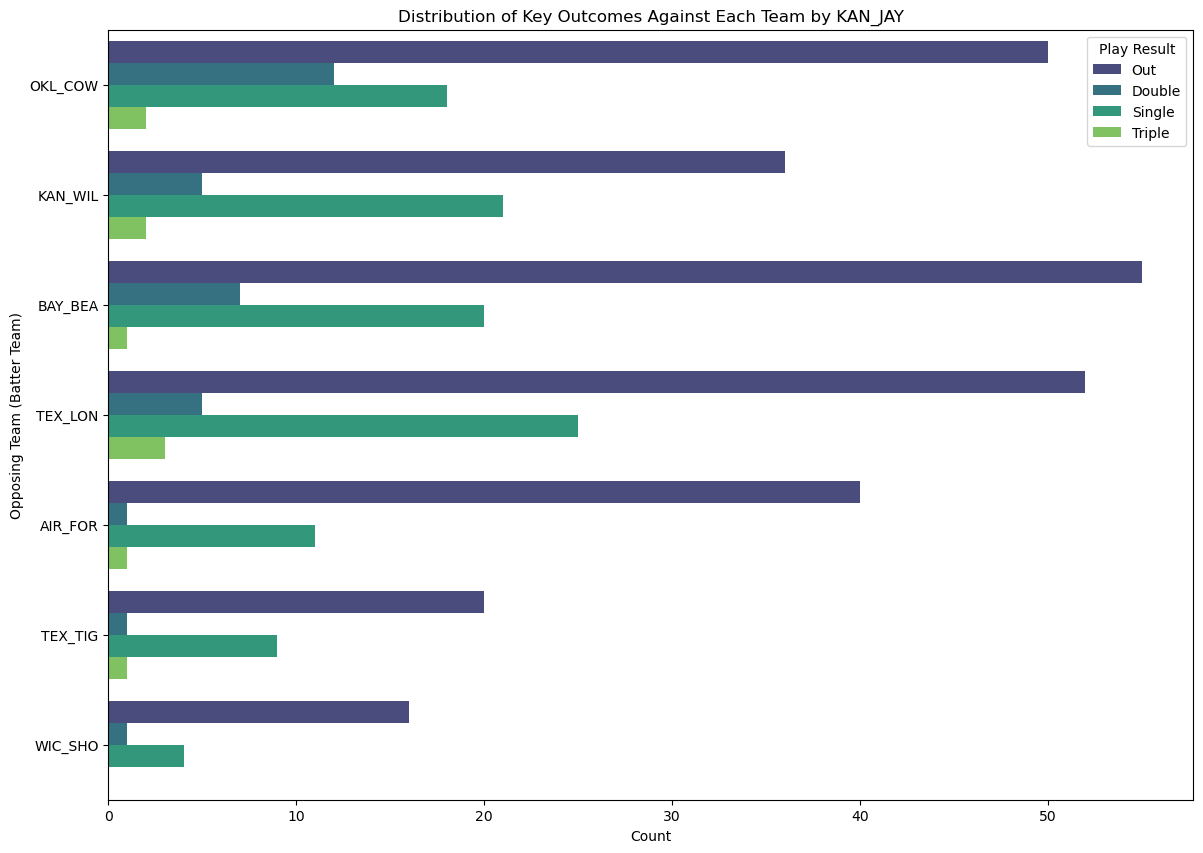

In [69]:
# Filtering relevant outcomes from the "PlayResult" column
relevant_outcomes = ['Single', 'Double', 'Triple', 'Home Run', 'Out']

# Filter the data for the relevant outcomes
filtered_outcomes_data = kan_jay_data[kan_jay_data['PlayResult'].isin(relevant_outcomes)]

# Visualizing the outcomes against each team
plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_outcomes_data, y='BatterTeam', hue='PlayResult', order=kan_jay_data['BatterTeam'].value_counts().index, palette='viridis')
plt.title('Distribution of Key Outcomes Against Each Team by KAN_JAY')
plt.xlabel('Count')
plt.ylabel('Opposing Team (Batter Team)')
plt.legend(title='Play Result')
plt.show()


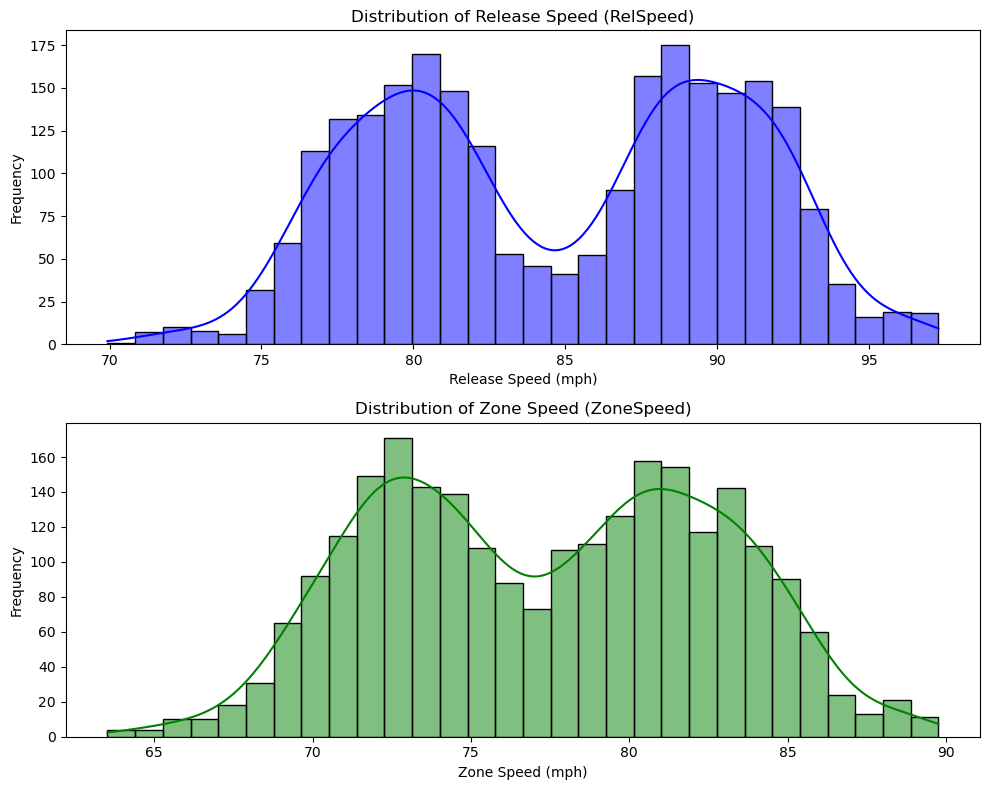

In [72]:
# Visualizing the distribution of "RelSpeed" and "ZoneSpeed"
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# "RelSpeed" distribution
sns.histplot(kan_jay_data['RelSpeed'], kde=True, ax=axes[0], color='blue', bins=30)
axes[0].set_title('Distribution of Release Speed (RelSpeed)')
axes[0].set_xlabel('Release Speed (mph)')
axes[0].set_ylabel('Frequency')

# "ZoneSpeed" distribution
sns.histplot(kan_jay_data['ZoneSpeed'], kde=True, ax=axes[1], color='green', bins=30)
axes[1].set_title('Distribution of Zone Speed (ZoneSpeed)')
axes[1].set_xlabel('Zone Speed (mph)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


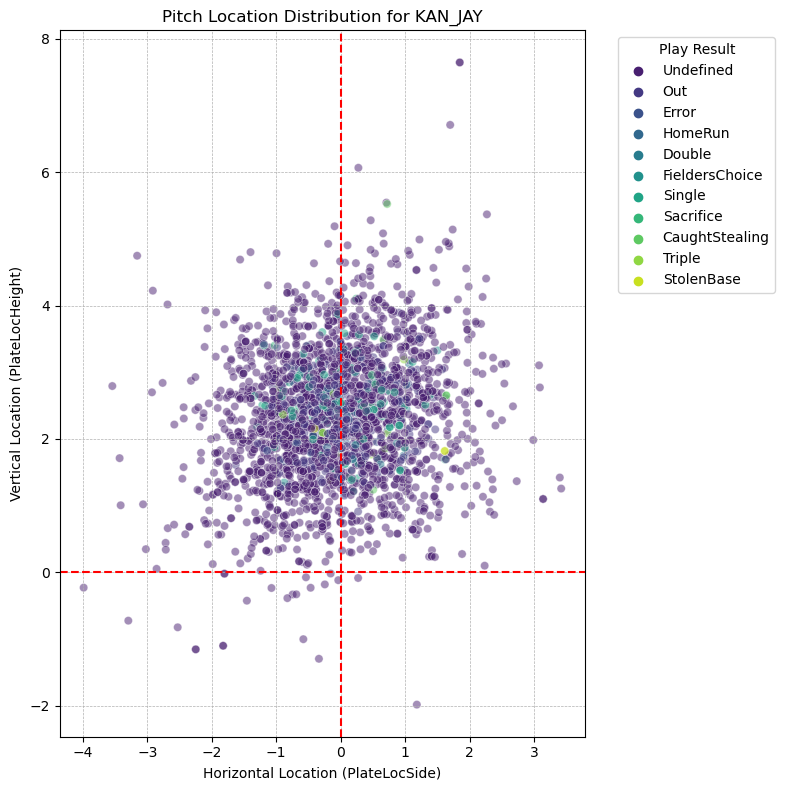

In [71]:
# Visualizing pitch location using "PlateLocHeight" and "PlateLocSide" columns
plt.figure(figsize=(8, 8))
sns.scatterplot(data=kan_jay_data, x='PlateLocSide', y='PlateLocHeight', hue='PlayResult', alpha=0.5, palette='viridis')
plt.title('Pitch Location Distribution for KAN_JAY')
plt.xlabel('Horizontal Location (PlateLocSide)')
plt.ylabel('Vertical Location (PlateLocHeight)')
plt.axvline(x=0, color='red', linestyle='--')
plt.axhline(y=0, color='red', linestyle='--')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


#### The majority of pitches are concentrated around the center of the plate, indicating good control by the "KAN_JAY" pitcher.

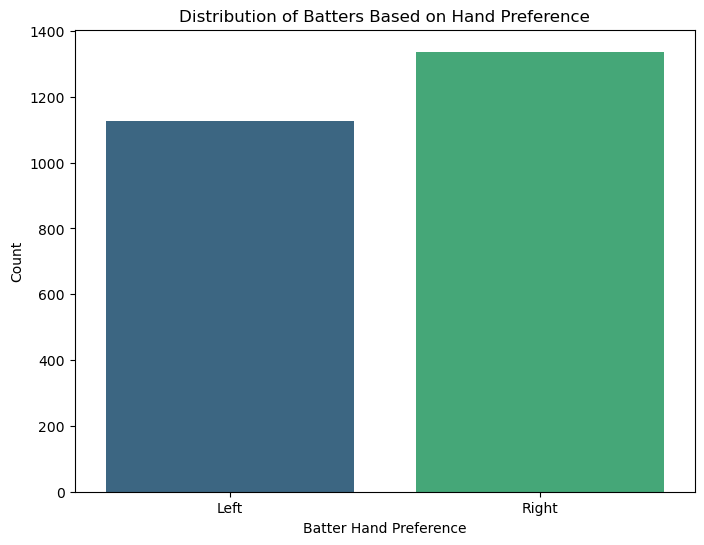

In [73]:
# Visualizing the overall distribution of batters based on their hand preference
plt.figure(figsize=(8, 6))
sns.countplot(data=kan_jay_data, x='BatterSide', order=['Left', 'Right'], palette='viridis')
plt.title('Distribution of Batters Based on Hand Preference')
plt.xlabel('Batter Hand Preference')
plt.ylabel('Count')
plt.show()


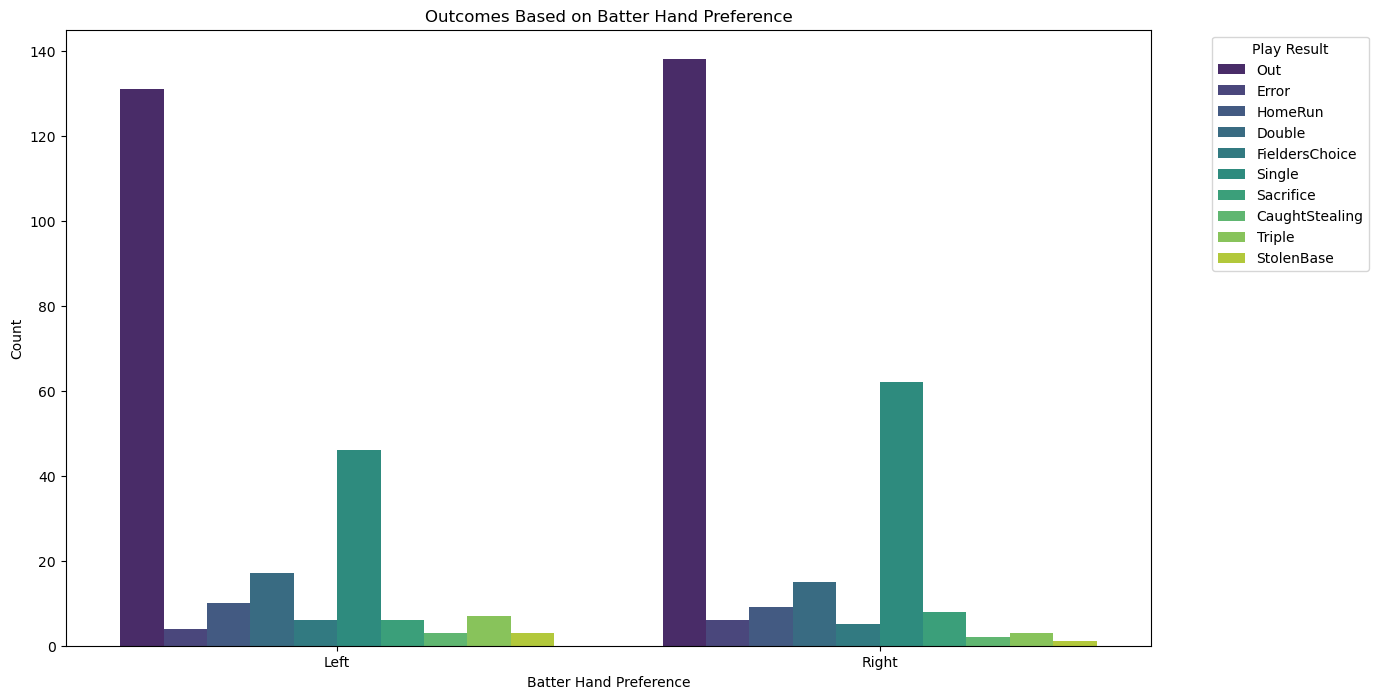

In [75]:
# Filtering out rows where 'PlayResult' is undefined or null
filtered_data = kan_jay_data[kan_jay_data['PlayResult'].notnull() & (kan_jay_data['PlayResult'] != 'Undefined')]

# Visualizing the outcomes based on batter's hand preference after filtering
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data, x='BatterSide', hue='PlayResult', palette='viridis', order=['Left', 'Right'])
plt.title('Outcomes Based on Batter Hand Preference')
plt.xlabel('Batter Hand Preference')
plt.ylabel('Count')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_47227/1409490134.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_data['SwingType'] = kan_jay_data.apply(categorize_swing, axis=1)


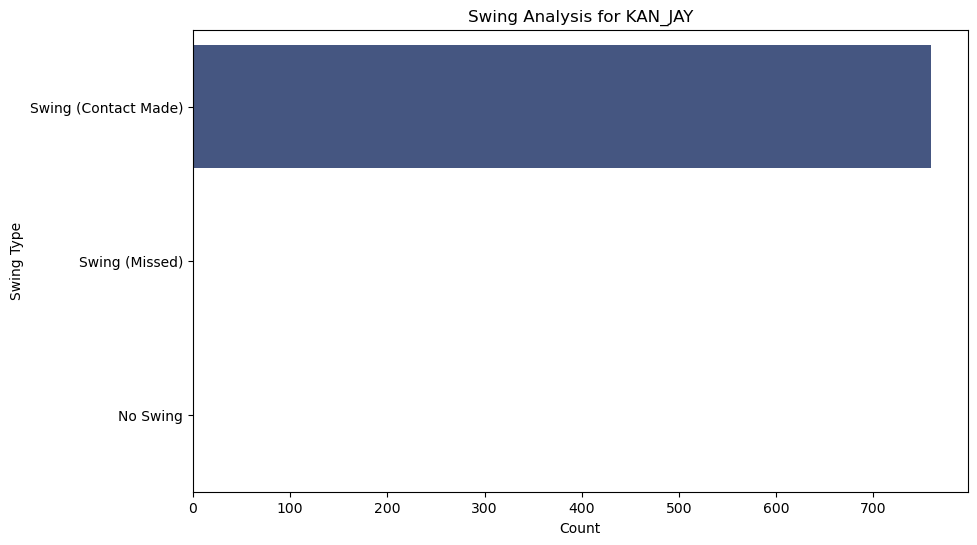

In [77]:
# Categorizing swings based on assumptions
def categorize_swing(row):
    if pd.notnull(row['ContactPositionX']):
        return 'Swing (Contact Made)'
    elif row['PlayResult'] == 'Strike':
        return 'Swing (Missed)'
    elif row['PlayResult'] == 'Ball':
        return 'No Swing'
    else:
        return 'Undefined'

kan_jay_data['SwingType'] = kan_jay_data.apply(categorize_swing, axis=1)

# Visualizing the swing analysis
plt.figure(figsize=(10, 6))
sns.countplot(data=kan_jay_data, y='SwingType', order=['Swing (Contact Made)', 'Swing (Missed)', 'No Swing'], palette='viridis')
plt.title('Swing Analysis for KAN_JAY')
plt.xlabel('Count')
plt.ylabel('Swing Type')
plt.show()


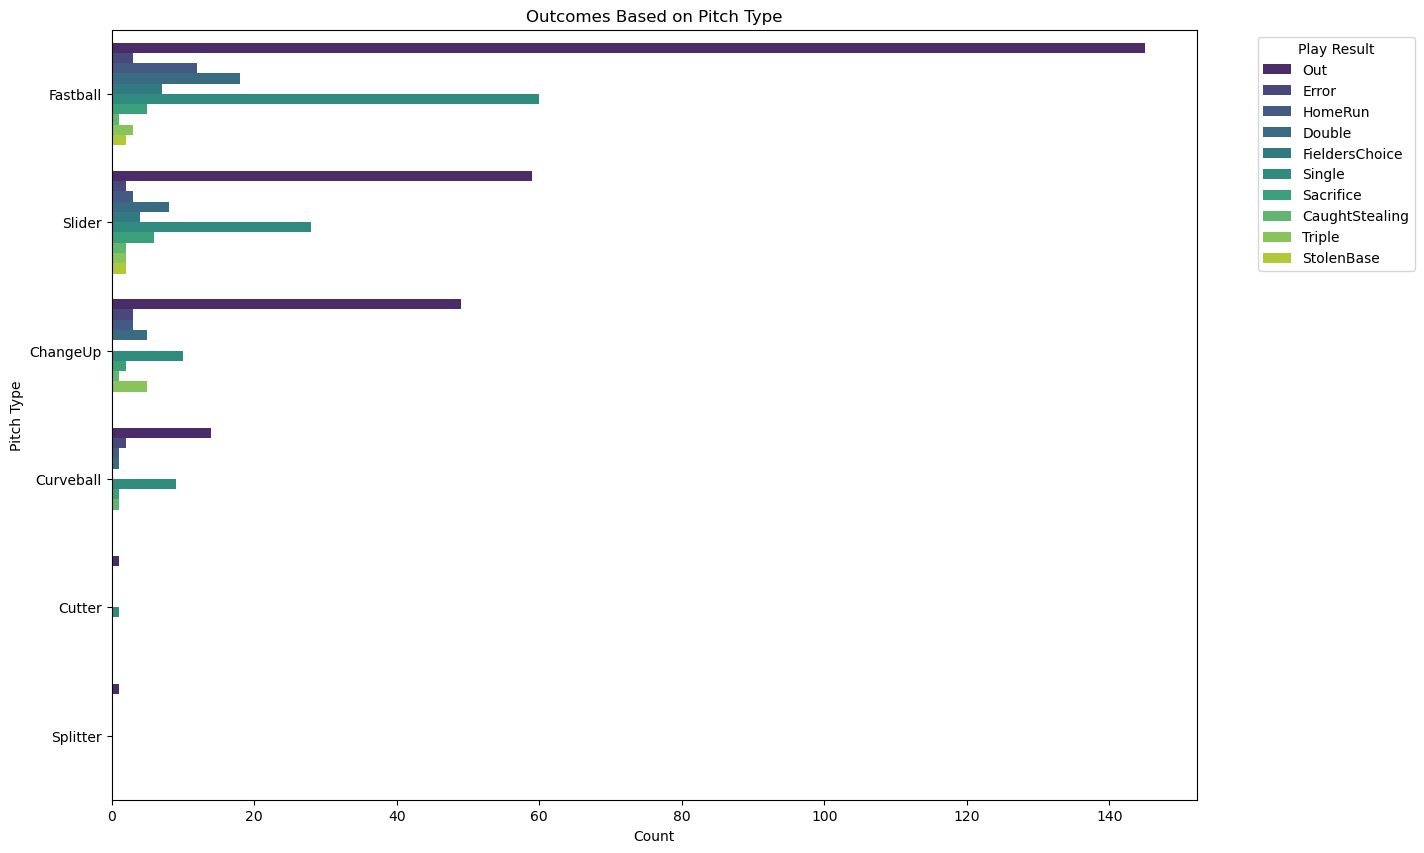

In [78]:
# Filtering out rows where 'PlayResult' and 'TaggedPitchType' are undefined or null
filtered_data_pitchtype = kan_jay_data[(kan_jay_data['PlayResult'].notnull()) & 
                                       (kan_jay_data['PlayResult'] != 'Undefined') & 
                                       (kan_jay_data['TaggedPitchType'].notnull()) & 
                                       (kan_jay_data['TaggedPitchType'] != 'Undefined')]

# Visualizing the outcomes based on pitch type after filtering
plt.figure(figsize=(14, 10))
sns.countplot(data=filtered_data_pitchtype, y='TaggedPitchType', hue='PlayResult', palette='viridis', 
              order=filtered_data_pitchtype['TaggedPitchType'].value_counts().index)
plt.title('Outcomes Based on Pitch Type')
plt.xlabel('Count')
plt.ylabel('Pitch Type')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


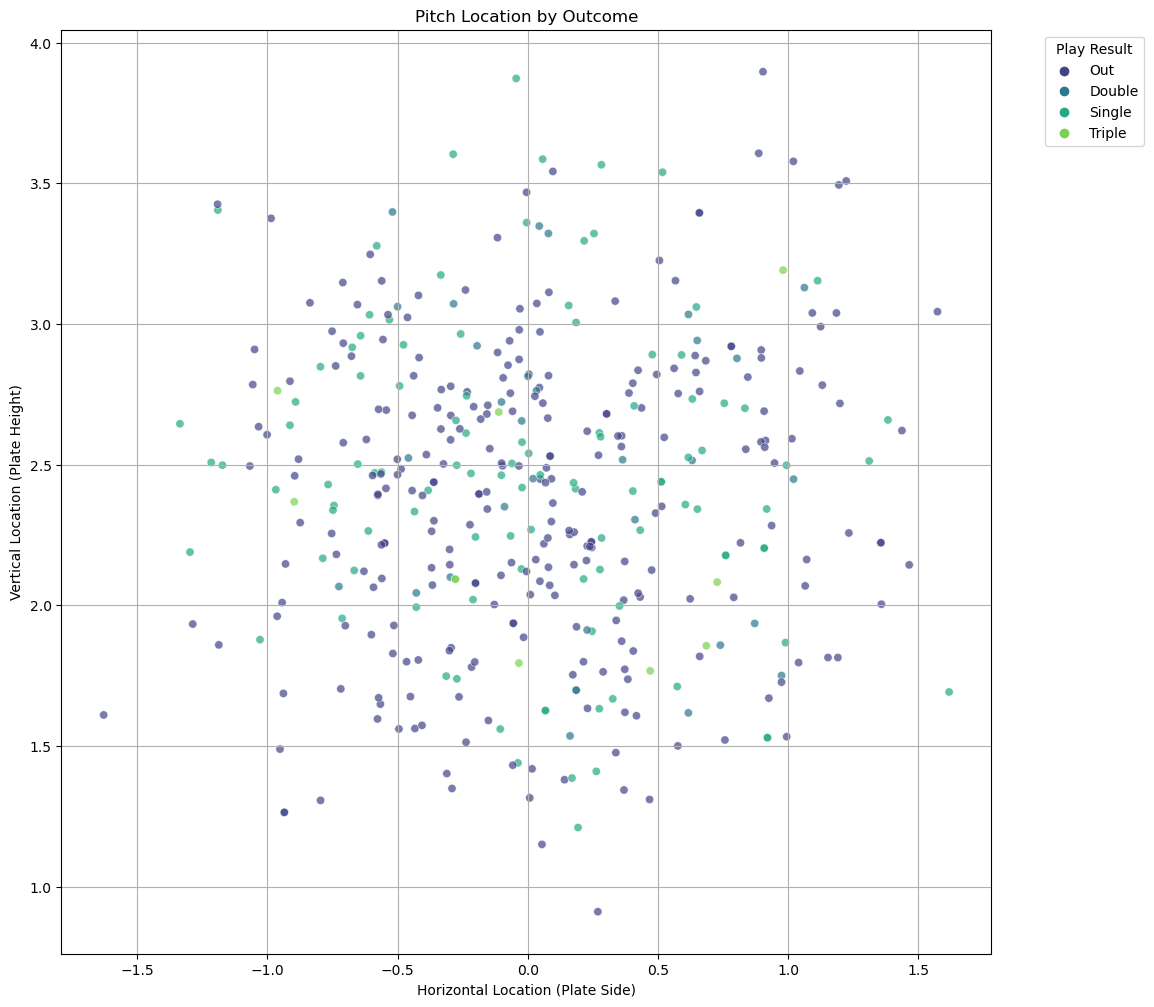

In [79]:
# Filtering for primary outcomes of interest
outcomes_of_interest = ['Single', 'Double', 'Triple', 'Out']
filtered_location_data = filtered_data_pitchtype[filtered_data_pitchtype['PlayResult'].isin(outcomes_of_interest)]

# Visualizing pitch location for different outcomes
plt.figure(figsize=(12, 12))
sns.scatterplot(data=filtered_location_data, x='PlateLocSide', y='PlateLocHeight', hue='PlayResult', palette='viridis', alpha=0.7)
plt.title('Pitch Location by Outcome')
plt.xlabel('Horizontal Location (Plate Side)')
plt.ylabel('Vertical Location (Plate Height)')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [80]:
# Grouping data by batter and summarizing the outcomes
batter_performance = filtered_data_pitchtype.groupby('Batter')['PlayResult'].value_counts().unstack().fillna(0)

# Calculating total at-bats and hits for each batter
batter_performance['TotalAtBats'] = batter_performance.sum(axis=1)
batter_performance['TotalHits'] = batter_performance[['Single', 'Double', 'Triple']].sum(axis=1)
batter_performance['HitRate'] = batter_performance['TotalHits'] / batter_performance['TotalAtBats']

# Sorting batters by hit rate
batter_performance_sorted = batter_performance.sort_values(by='HitRate', ascending=False)

# Displaying top 10 batters by hit rate
top_batters = batter_performance_sorted.head(10)
top_batters[['Single', 'Double', 'Triple', 'Out', 'TotalAtBats', 'TotalHits', 'HitRate']]


PlayResult       Single  Double  Triple  Out  TotalAtBats  TotalHits   HitRate
Batter                                                                        
Brown, Ron          0.0     0.0     1.0  0.0          1.0        1.0  1.000000
Caley, Harrison     1.0     0.0     0.0  0.0          1.0        1.0  1.000000
Legendre, Tyler     0.0     1.0     0.0  0.0          1.0        1.0  1.000000
Day, Brady          8.0     0.0     0.0  1.0         10.0        8.0  0.800000
Thomas, Jared       7.0     1.0     1.0  4.0         13.0        9.0  0.692308
Andrade, Kobe       2.0     1.0     1.0  1.0          6.0        4.0  0.666667
Tremain, Cole       2.0     0.0     0.0  1.0          3.0        2.0  0.666667
Wulfert, Tyler      3.0     3.0     1.0  2.0         11.0        7.0  0.636364
Polk, Walker        2.0     0.0     0.0  2.0          4.0        2.0  0.500000
Daugherty, Ian      1.0     0.0     0.0  1.0          2.0        1.0  0.500000

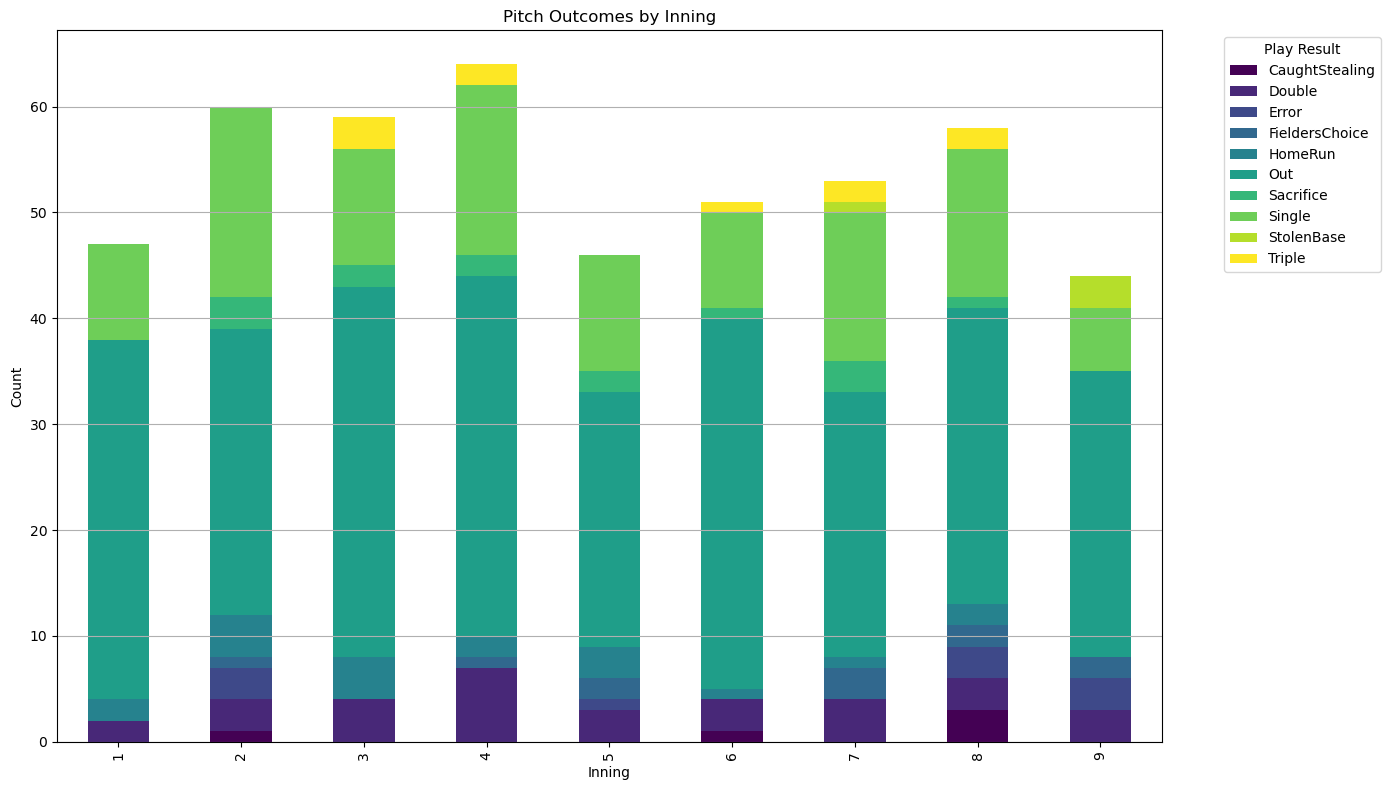

In [81]:
# Grouping data by inning and summarizing the outcomes
inning_outcome_counts = filtered_data_pitchtype.groupby('Inning')['PlayResult'].value_counts().unstack().fillna(0)

# Visualizing the outcomes by inning
inning_outcome_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Pitch Outcomes by Inning')
plt.xlabel('Inning')
plt.ylabel('Count')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_47227/1810504630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_pitchtype['Count'] = filtered_data_pitchtype['Balls'].astype(str) + '-' + filtered_data_pitchtype['Strikes'].astype(str)


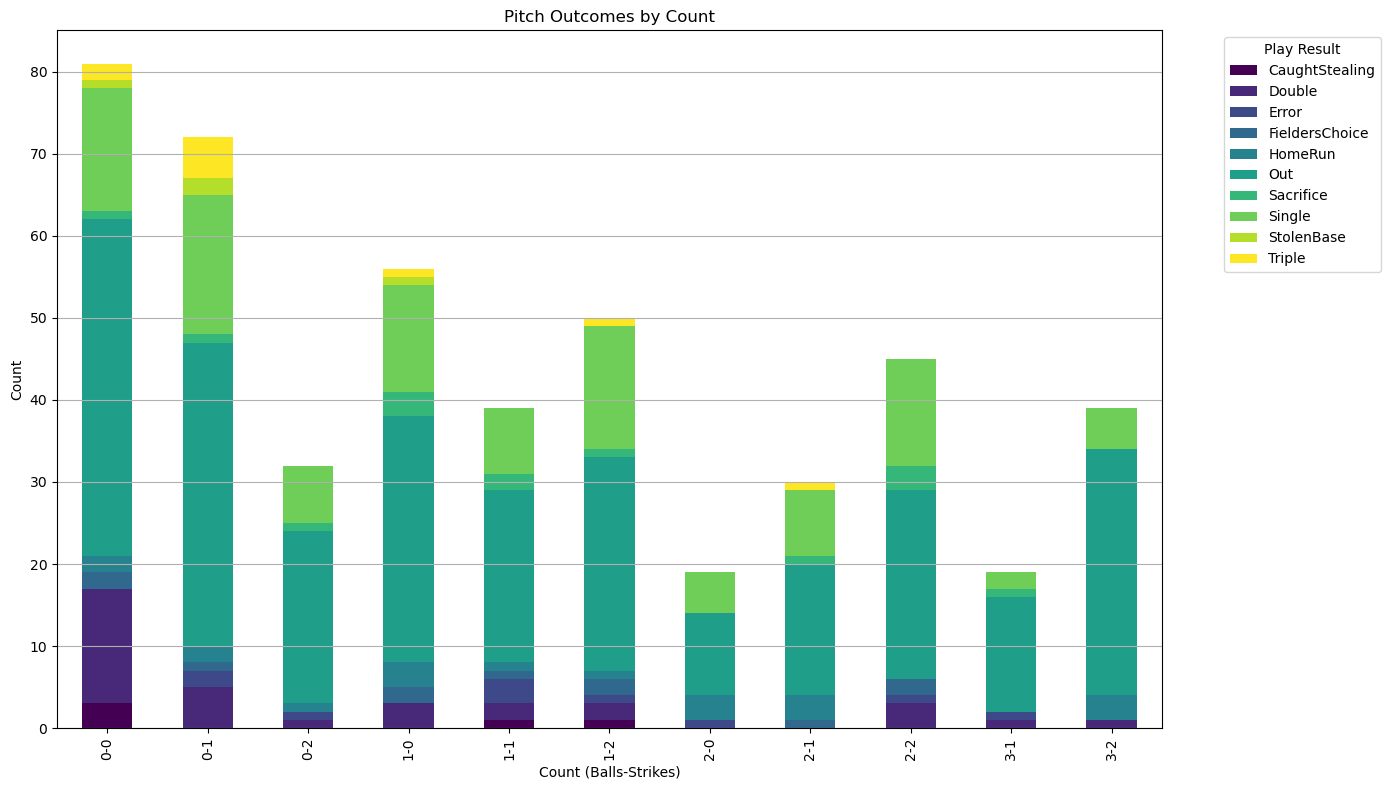

In [82]:
# Creating a combined 'Count' column
filtered_data_pitchtype['Count'] = filtered_data_pitchtype['Balls'].astype(str) + '-' + filtered_data_pitchtype['Strikes'].astype(str)

# Grouping by count and summarizing the outcomes
count_outcome_counts = filtered_data_pitchtype.groupby('Count')['PlayResult'].value_counts().unstack().fillna(0)

# Visualizing the outcomes by count
count_outcome_counts.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='viridis')
plt.title('Pitch Outcomes by Count')
plt.xlabel('Count (Balls-Strikes)')
plt.ylabel('Count')
plt.legend(title='Play Result', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


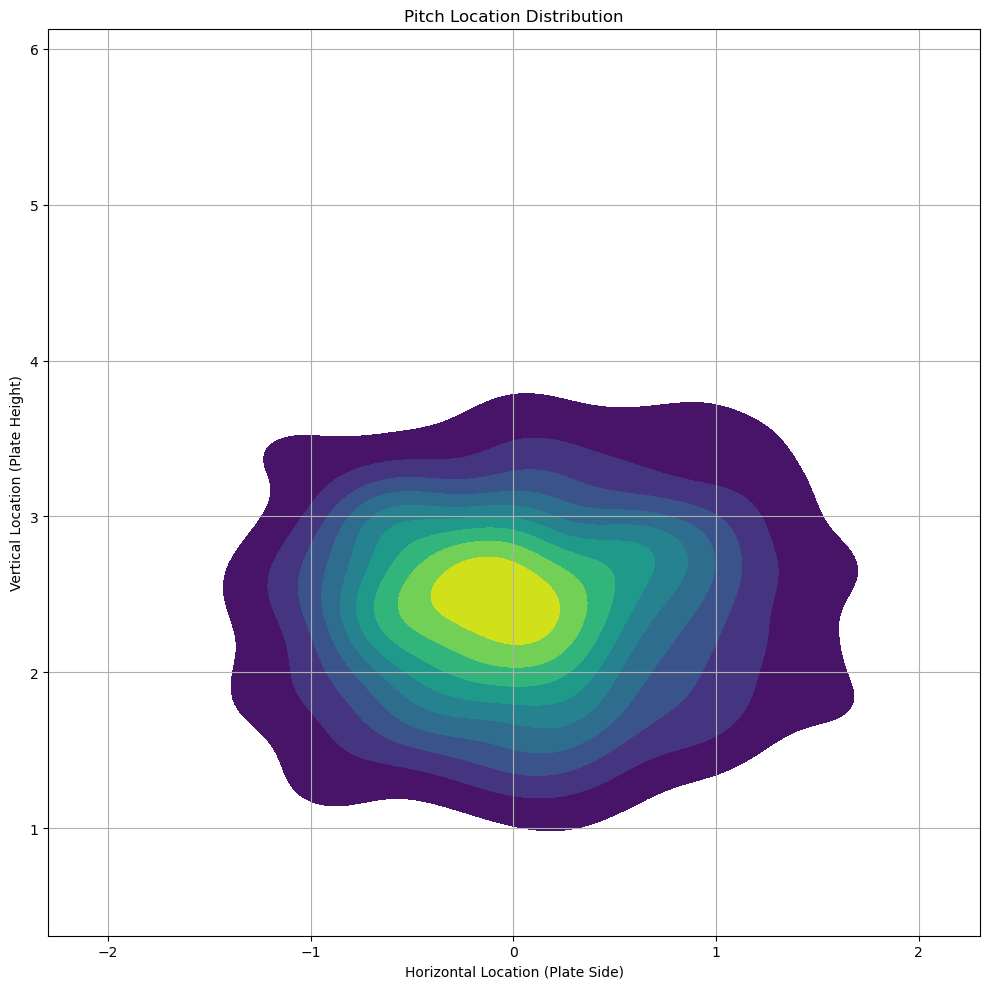

In [83]:
# Plotting the overall pitch location
plt.figure(figsize=(10, 10))
sns.kdeplot(data=filtered_data_pitchtype, x='PlateLocSide', y='PlateLocHeight', cmap='viridis', fill=True)
plt.title('Pitch Location Distribution')
plt.xlabel('Horizontal Location (Plate Side)')
plt.ylabel('Vertical Location (Plate Height)')
plt.grid(True)
plt.tight_layout()
plt.show()


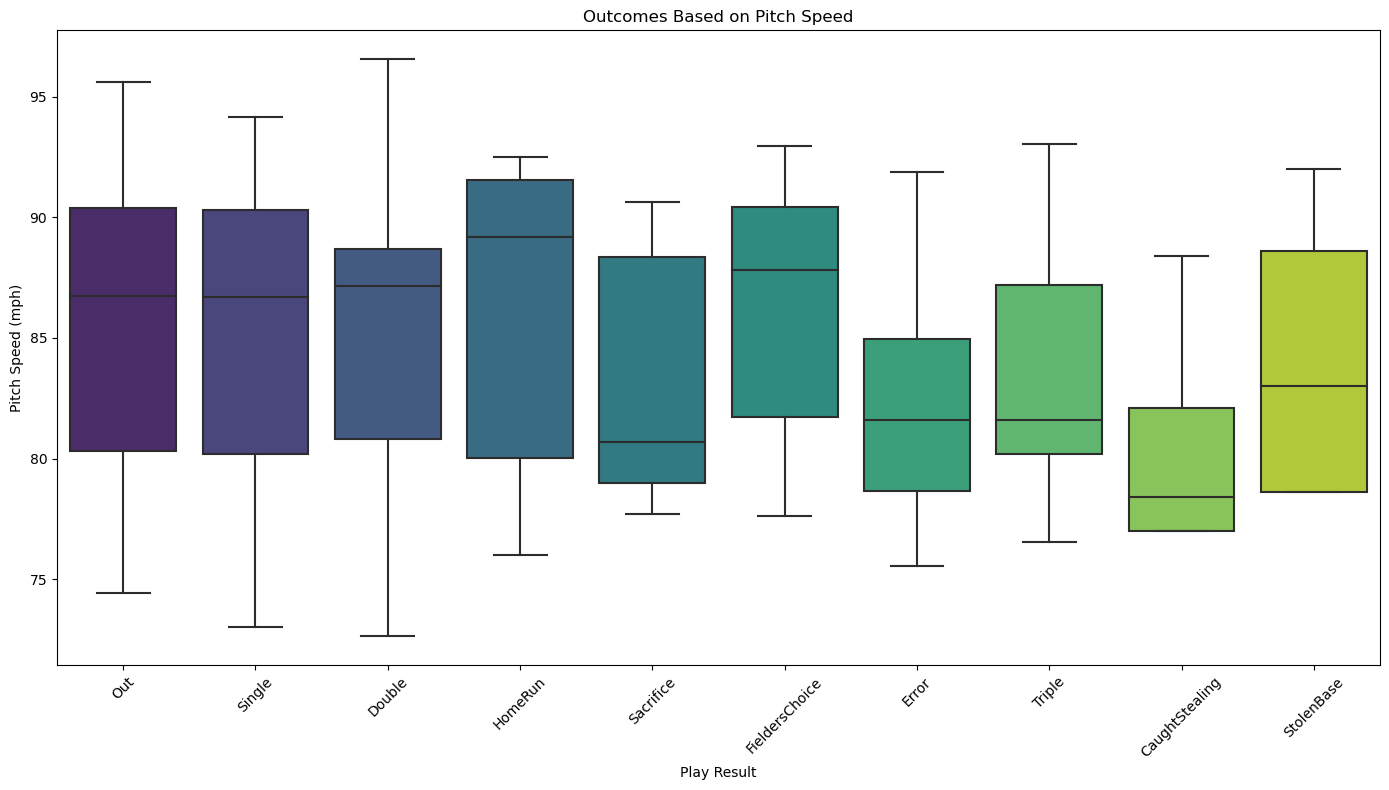

In [84]:
# Visualizing pitch speed by outcome
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data_pitchtype, x='PlayResult', y='RelSpeed', order=filtered_data_pitchtype['PlayResult'].value_counts().index, palette='viridis')
plt.title('Outcomes Based on Pitch Speed')
plt.xlabel('Play Result')
plt.ylabel('Pitch Speed (mph)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Outs and Fielding Analysis

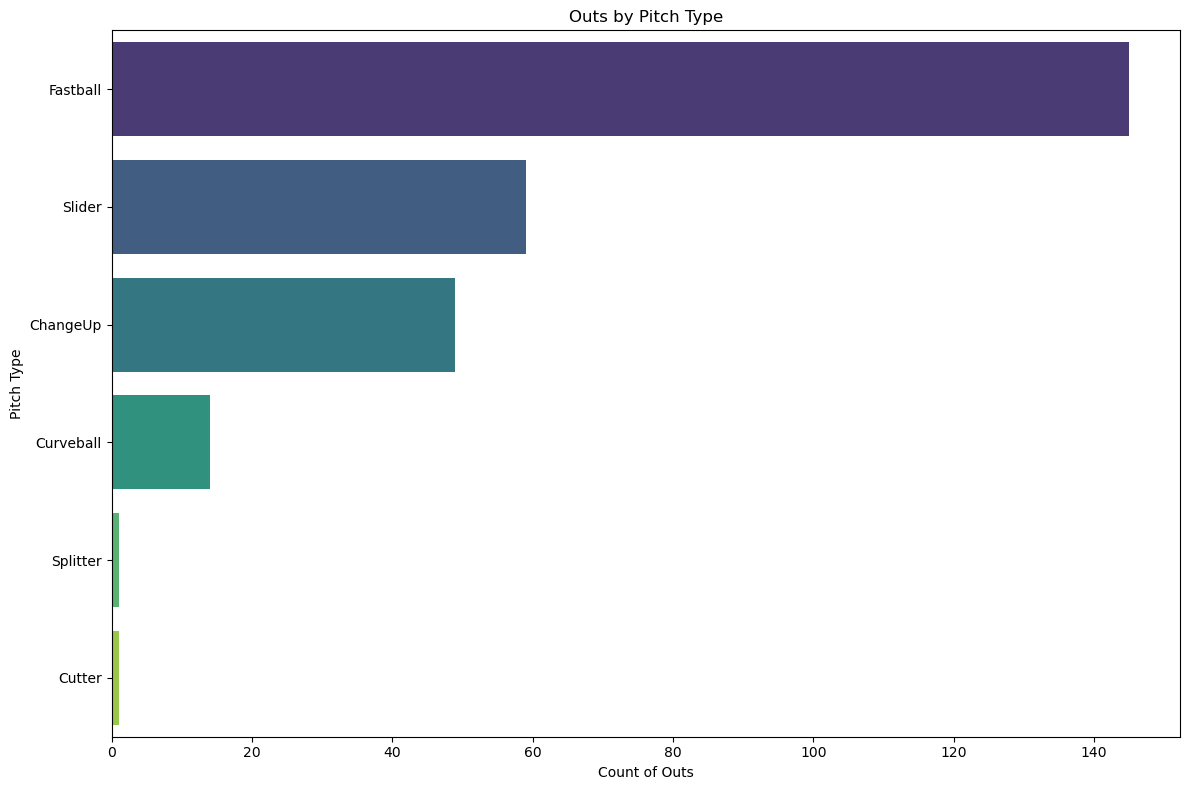

In [86]:
# Filtering data for rows where the outcome is an "Out"
outs_data = filtered_data_pitchtype[filtered_data_pitchtype['PlayResult'] == 'Out']

# Visualizing outs by pitch type
plt.figure(figsize=(12, 8))
sns.countplot(data=outs_data, y='TaggedPitchType', order=outs_data['TaggedPitchType'].value_counts().index, palette='viridis')
plt.title('Outs by Pitch Type')
plt.xlabel('Count of Outs')
plt.ylabel('Pitch Type')
plt.tight_layout()
plt.show()


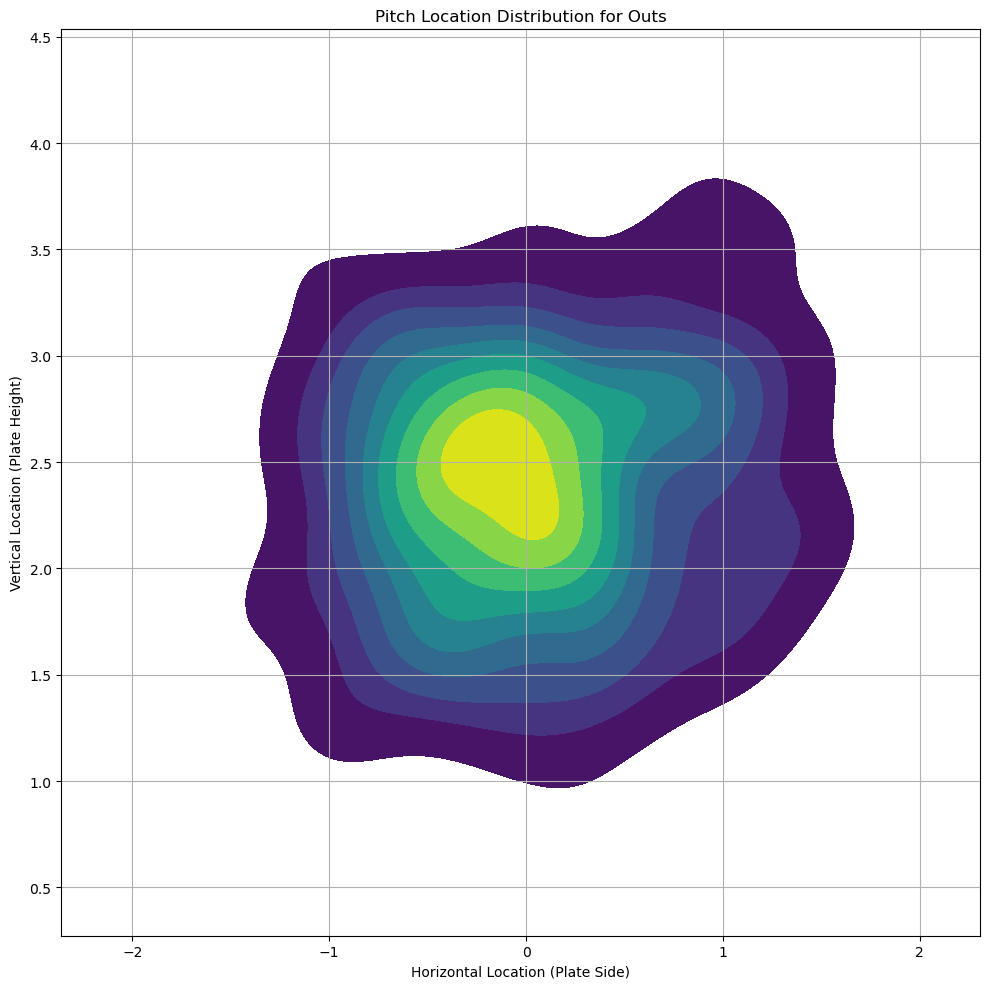

In [87]:
# Plotting the pitch location for outs
plt.figure(figsize=(10, 10))
sns.kdeplot(data=outs_data, x='PlateLocSide', y='PlateLocHeight', cmap='viridis', fill=True)
plt.title('Pitch Location Distribution for Outs')
plt.xlabel('Horizontal Location (Plate Side)')
plt.ylabel('Vertical Location (Plate Height)')
plt.grid(True)
plt.tight_layout()
plt.show()


#### KAN_JAY often gets outs from pitches thrown within a concentrated region around the center of the strike zone.
#### There's a prominent density of outs resulting from pitches thrown slightly above the center and slightly inside. This indicates that batters might have trouble handling these pitches.

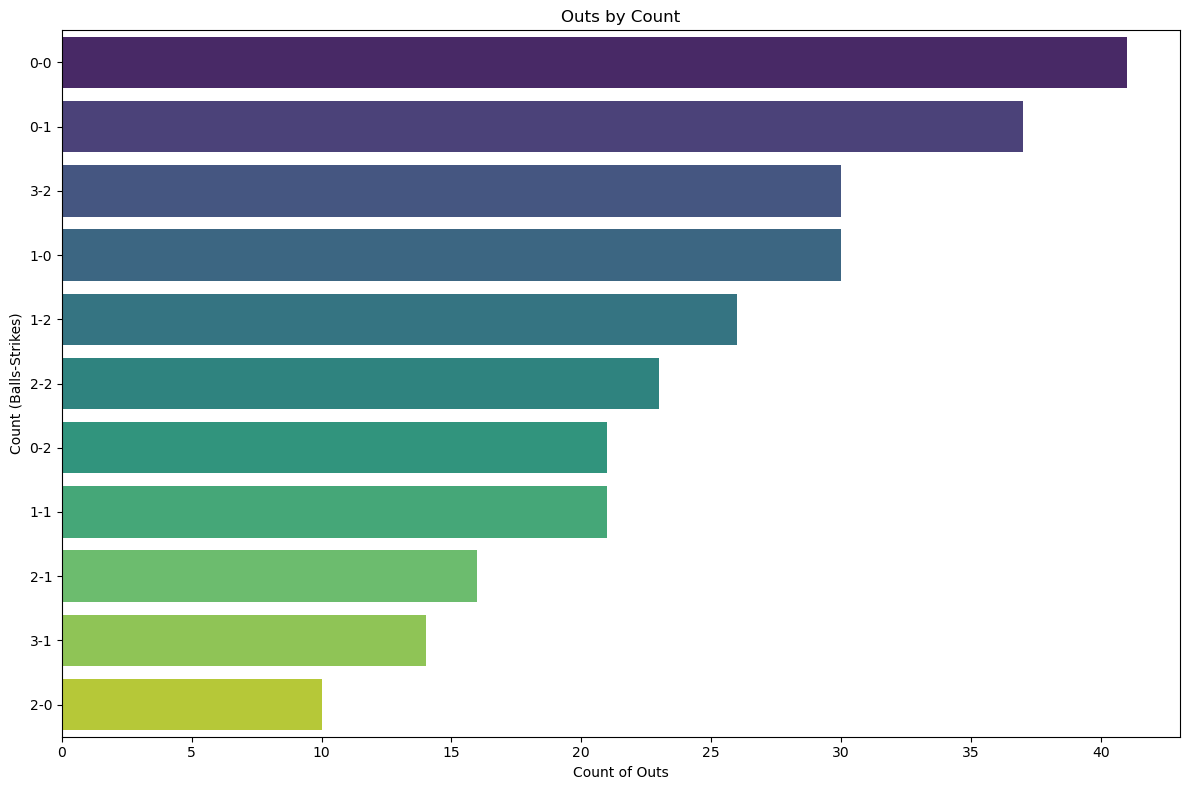

In [88]:
# Visualizing outs by count
plt.figure(figsize=(12, 8))
sns.countplot(data=outs_data, y='Count', order=outs_data['Count'].value_counts().index, palette='viridis')
plt.title('Outs by Count')
plt.xlabel('Count of Outs')
plt.ylabel('Count (Balls-Strikes)')
plt.tight_layout()
plt.show()


In [89]:
import numpy as np

# Identifying the opposing team for each row
kan_jay_data['OpposingTeam'] = np.where(kan_jay_data['PitcherTeam'] == kan_jay_data['HomeTeam'], 
                                        kan_jay_data['AwayTeam'], kan_jay_data['HomeTeam'])

# Grouping data by opposing team and summarizing the outcomes
team_performance = kan_jay_data.groupby('OpposingTeam')['PlayResult'].value_counts().unstack().fillna(0)

# Calculating total at-bats and hits for each team
team_performance['TotalAtBats'] = team_performance.sum(axis=1)
team_performance['TotalHits'] = team_performance[['Single', 'Double', 'Triple']].sum(axis=1)
team_performance['HitRate'] = team_performance['TotalHits'] / team_performance['TotalAtBats']

# Sorting teams by hit rate
team_performance_sorted = team_performance.sort_values(by='HitRate', ascending=False)

team_performance_sorted[['Single', 'Double', 'Triple', 'Out', 'TotalAtBats', 'TotalHits', 'HitRate']]


/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_47227/4108846939.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_data['OpposingTeam'] = np.where(kan_jay_data['PitcherTeam'] == kan_jay_data['HomeTeam'],


PlayResult    Single  Double  Triple   Out  TotalAtBats  TotalHits   HitRate
OpposingTeam                                                                
TEX_LON         25.0     5.0     3.0  52.0        423.0       33.0  0.078014
TEX_TIG          9.0     1.0     1.0  20.0        147.0       11.0  0.074830
BAY_BEA         20.0     7.0     1.0  55.0        435.0       28.0  0.064368
OKL_COW         18.0    12.0     2.0  50.0        541.0       32.0  0.059150
KAN_WIL         21.0     5.0     2.0  36.0        537.0       28.0  0.052142
AIR_FOR         11.0     1.0     1.0  40.0        254.0       13.0  0.051181
WIC_SHO          4.0     1.0     0.0  16.0        125.0        5.0  0.040000

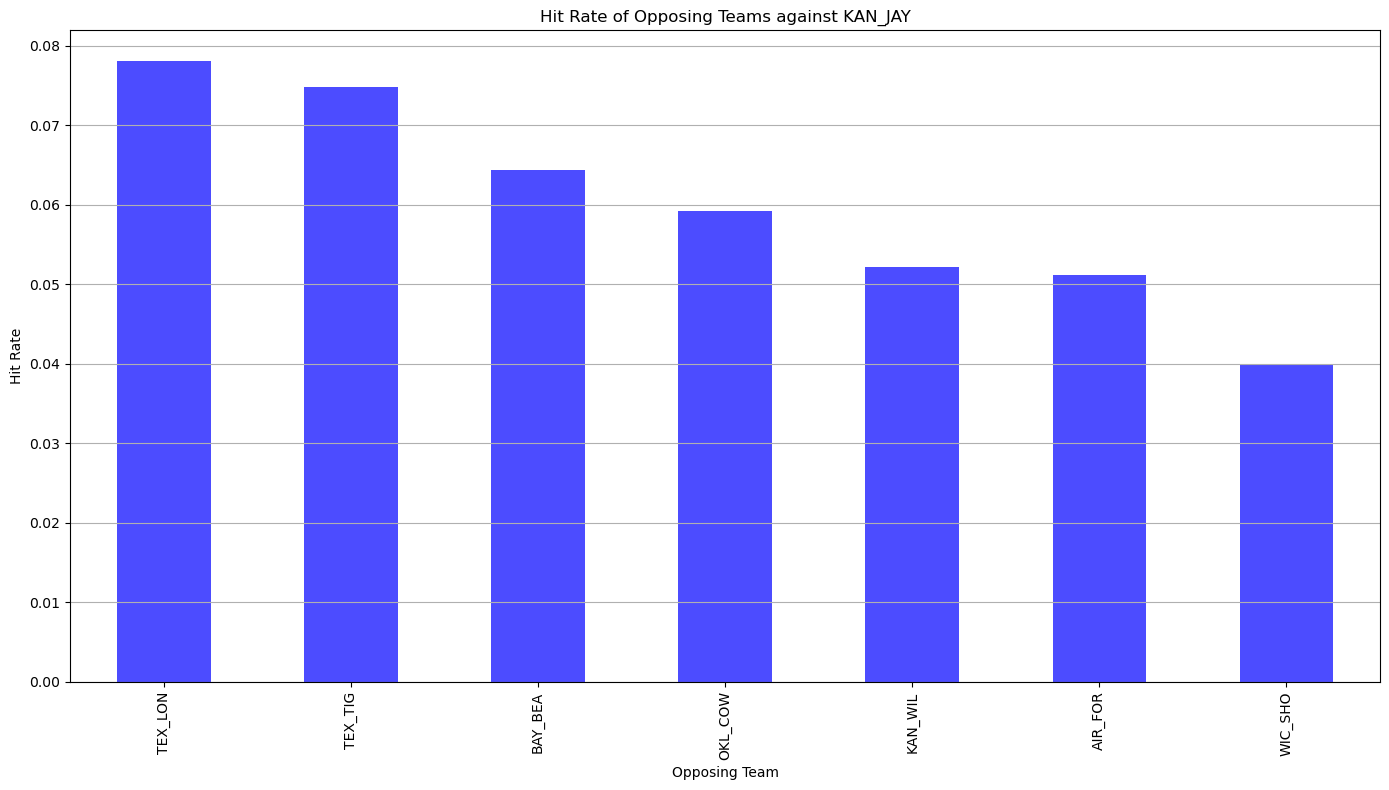

In [90]:
# Visualizing team performance against KAN_JAY using a bar chart
plt.figure(figsize=(14, 8))
team_performance_sorted['HitRate'].plot(kind='bar', color='blue', alpha=0.7)
plt.title('Hit Rate of Opposing Teams against KAN_JAY')
plt.xlabel('Opposing Team')
plt.ylabel('Hit Rate')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Defensive positioning 


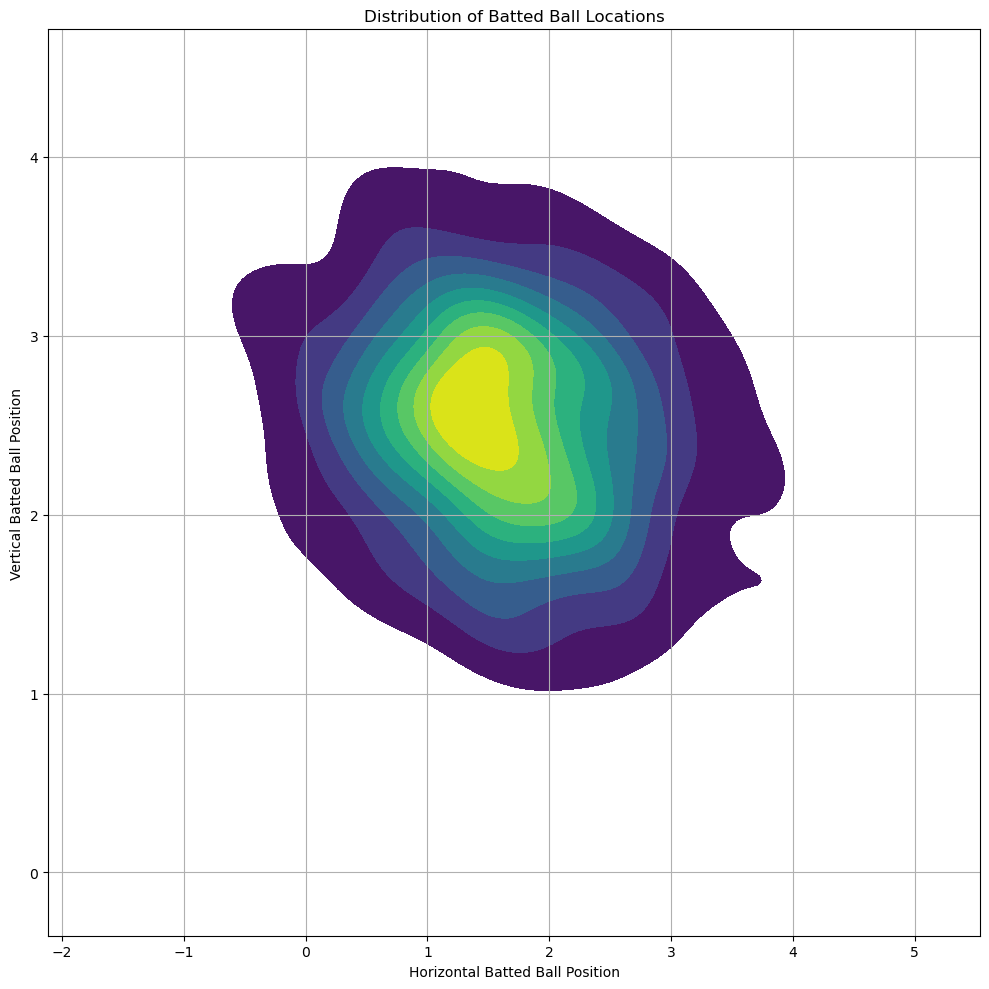

In [91]:
# Plotting the distribution of batted ball locations
plt.figure(figsize=(10, 10))
sns.kdeplot(data=kan_jay_data, x='ContactPositionX', y='ContactPositionY', cmap='viridis', fill=True)
plt.title('Distribution of Batted Ball Locations')
plt.xlabel('Horizontal Batted Ball Position')
plt.ylabel('Vertical Batted Ball Position')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Most batted balls are concentrated around the center, suggesting that batters often make contact in the heart of the strike zone.
#### There's a noticeable density slightly above the center, which might indicate pitches that are easier for batters to handle or a common pitch location by "KAN_JAY".

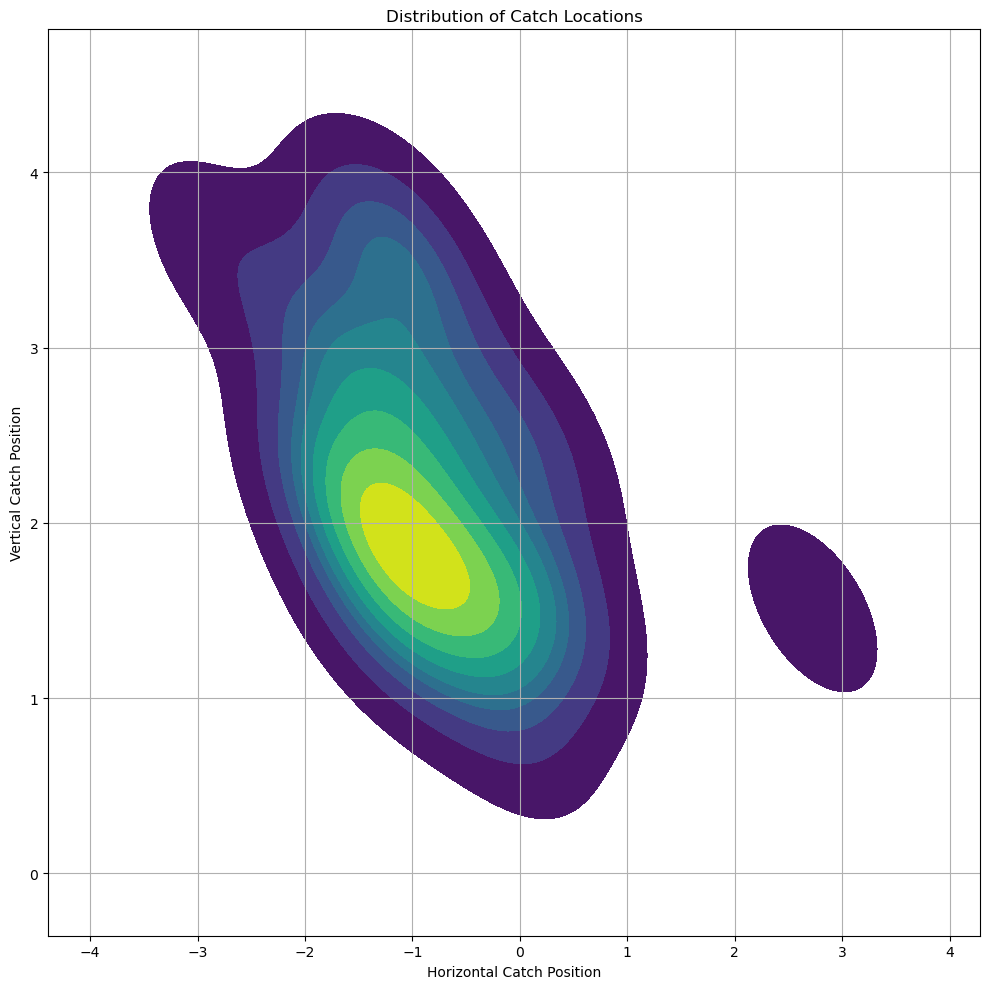

In [92]:
# Plotting the distribution of catch locations
plt.figure(figsize=(10, 10))
sns.kdeplot(data=kan_jay_data, x='CatchPositionX', y='CatchPositionY', cmap='viridis', fill=True)
plt.title('Distribution of Catch Locations')
plt.xlabel('Horizontal Catch Position')
plt.ylabel('Vertical Catch Position')
plt.grid(True)
plt.tight_layout()
plt.show()


#### The catch locations are widely spread, but there are a few dense regions, suggesting certain areas where catches are more frequent.
#### The dense region around the center might represent catches made by the pitcher or infielders near the mound.
#### Other dense regions could represent common areas where outfielders or infielders make catches.

In [93]:
# Creating a column for previous pitch type and previous to previous pitch type
kan_jay_data['PreviousPitch'] = kan_jay_data['TaggedPitchType'].shift()
kan_jay_data['PreviousToPreviousPitch'] = kan_jay_data['TaggedPitchType'].shift(2)

# Creating a column for pitch sequence (considering last 3 pitches including current pitch)
kan_jay_data['PitchSequence'] = kan_jay_data['PreviousToPreviousPitch'] + ' -> ' + kan_jay_data['PreviousPitch'] + ' -> ' + kan_jay_data['TaggedPitchType']

# Grouping by pitch sequence and summarizing the outcomes
pitch_sequence_outcomes = kan_jay_data.groupby('PitchSequence')['PlayResult'].value_counts().unstack().fillna(0)

# Calculating total at-bats for each pitch sequence
pitch_sequence_outcomes['TotalAtBats'] = pitch_sequence_outcomes.sum(axis=1)
pitch_sequence_outcomes_sorted = pitch_sequence_outcomes.sort_values(by='TotalAtBats', ascending=False)

# Displaying the top 10 most frequent pitch sequences and their outcomes
pitch_sequence_outcomes_sorted.head(10)


/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_47227/4052803819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_data['PreviousPitch'] = kan_jay_data['TaggedPitchType'].shift()
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_47227/4052803819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kan_jay_data['PreviousToPreviousPitch'] = kan_jay_data['TaggedPitchType'].shift(2)
/var/folders/38/xplvmw913c94s7mmbl6b9y0c0000gn/T/ipykernel_47227/4052803819.py:6: SettingWithCopyWarn

PlayResult                        CaughtStealing  Double  Error  \
PitchSequence                                                     
Fastball -> Fastball -> Fastball             0.0     6.0    2.0   
Slider -> Slider -> Slider                   2.0     0.0    1.0   
Fastball -> Fastball -> Slider               0.0     3.0    0.0   
Slider -> Fastball -> Fastball               0.0     2.0    0.0   
Fastball -> Slider -> Fastball               0.0     1.0    0.0   
Fastball -> Slider -> Slider                 0.0     1.0    0.0   
Slider -> Slider -> Fastball                 0.0     2.0    0.0   
Fastball -> ChangeUp -> Fastball             1.0     3.0    0.0   
Fastball -> Fastball -> ChangeUp             1.0     1.0    1.0   
ChangeUp -> Fastball -> Fastball             0.0     2.0    1.0   

PlayResult                        FieldersChoice  HomeRun   Out  Sacrifice  \
PitchSequence                                                                
Fastball -> Fastball -> Fastball             1.0      2.0  67.0        2.0   
Slider -> Slider -> Slider                   1.0      1.0  26.0        3.0   
Fastball -> Fastball -> Slider               0.0      0.0   6.0        1.0   
Slider -> Fastball -> Fastball               1.0      3.0  10.0        1.0   
Fastball -> Slider -> Fastball               1.0      1.0  11.0        0.0   
Fastball -> Slider -> Slider                 2.0      0.0  16.0        1.0   
Slider -> Slider -> Fastball                 0.0      0.0  11.0        0.0   
Fastball -> ChangeUp -> Fastball             0.0      2.0   9.0        1.0   
Fastball -> Fastball -> ChangeUp             0.0      1.0  10.0        1.0   
ChangeUp -> Fastball -> Fastball             0.0      2.0  13.0        0.0   

PlayResult                        Single  StolenBase  Triple  Undefined  \
PitchSequence                                                             
Fastball -> Fastball -> Fastball    19.0         0.0     2.0      367.0   
Slider -> Slider -> Slider           5.0         2.0     1.0      148.0   
Fastball -> Fastball -> Slider       3.0         0.0     0.0      112.0   
Slider -> Fastball -> Fastball       6.0         0.0     0.0       97.0   
Fastball -> Slider -> Fastball       9.0         0.0     0.0       88.0   
Fastball -> Slider -> Slider         5.0         0.0     1.0       75.0   
Slider -> Slider -> Fastball         5.0         1.0     0.0       79.0   
Fastball -> ChangeUp -> Fastball     4.0         0.0     0.0       76.0   
Fastball -> Fastball -> ChangeUp     3.0         0.0     0.0       76.0   
ChangeUp -> Fastball -> Fastball     7.0         0.0     1.0       67.0   

PlayResult                        TotalAtBats  
PitchSequence                                  
Fastball -> Fastball -> Fastball        468.0  
Slider -> Slider -> Slider              190.0  
Fastball -> Fastball -> Slider          125.0  
Slider -> Fastball -> Fastball          120.0  
Fastball -> Slider -> Fastball          111.0  
Fastball -> Slider -> Slider            101.0  
Slider -> Slider -> Fastball             98.0  
Fastball -> ChangeUp -> Fastball         96.0  
Fastball -> Fastball -> ChangeUp         94.0  
ChangeUp -> Fastball -> Fastball         93.0

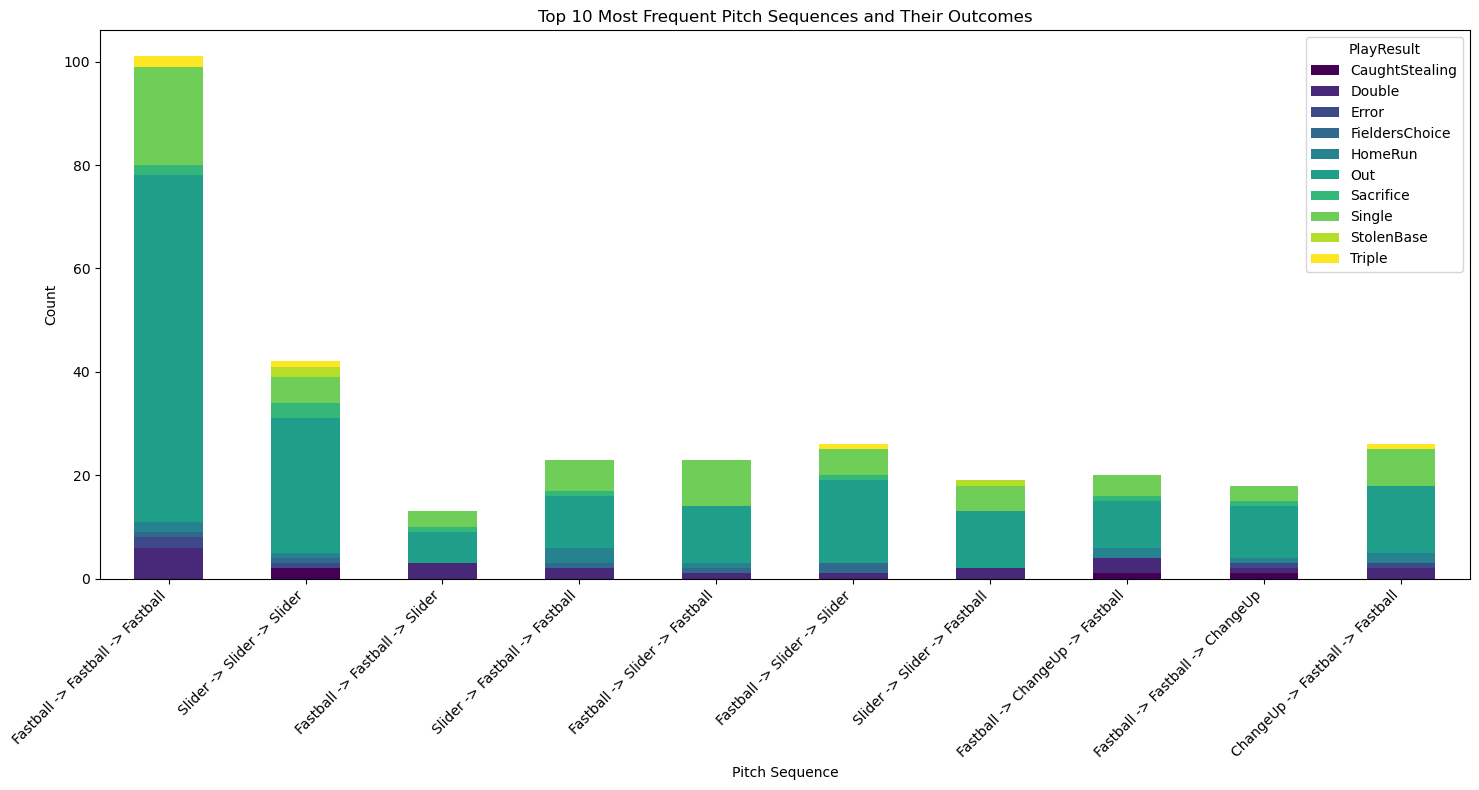

In [94]:
# Re-plotting the visualization after removing the 'Undefined' outcomes
top_pitch_sequences_filtered = pitch_sequence_outcomes_sorted.drop(columns=['Undefined', 'TotalAtBats']).head(10)

# Plotting
ax = top_pitch_sequences_filtered.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Top 10 Most Frequent Pitch Sequences and Their Outcomes')
plt.xlabel('Pitch Sequence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


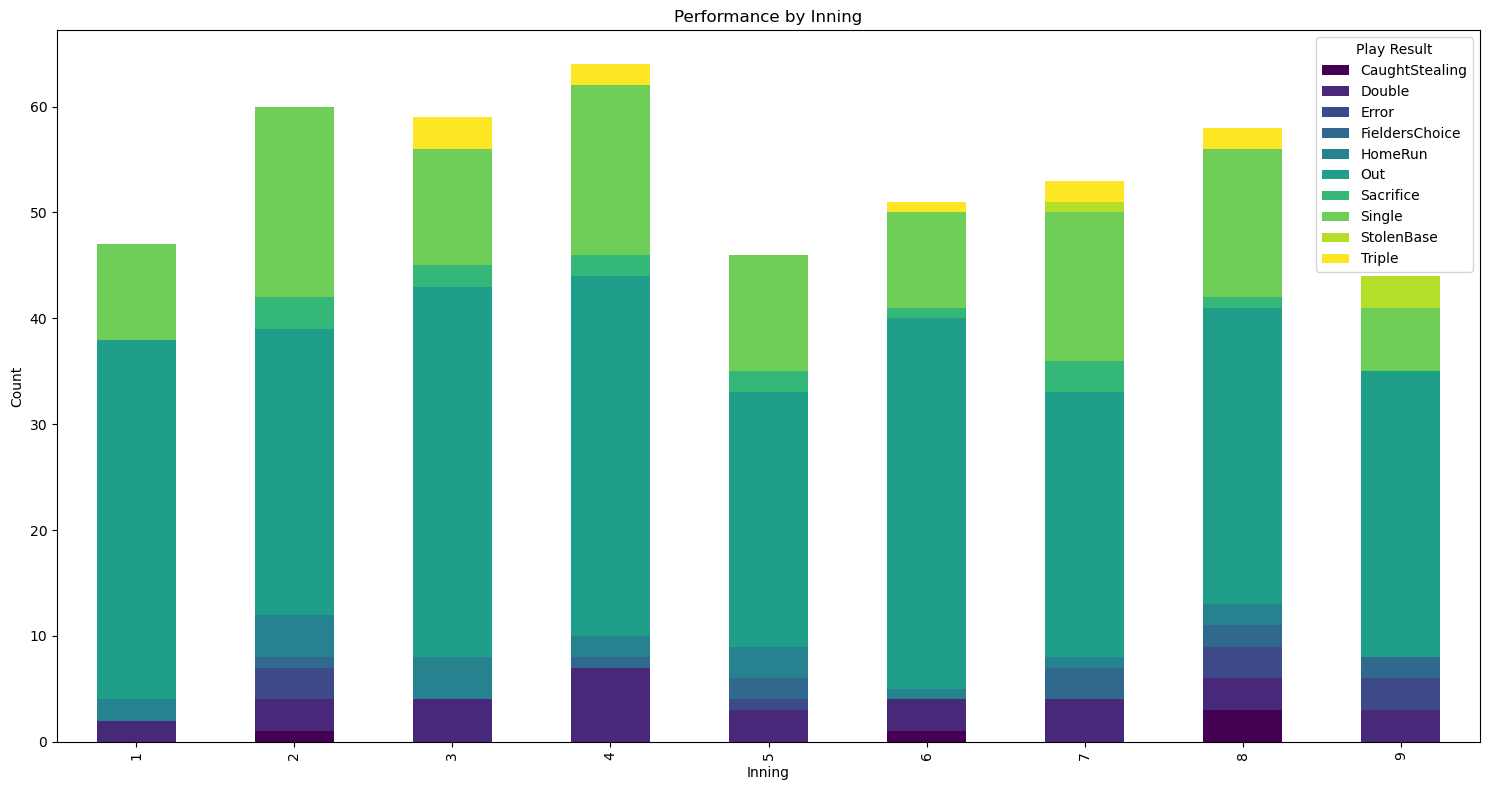

In [95]:
# Grouping by inning and summarizing the outcomes
inning_outcomes = kan_jay_data.groupby('Inning')['PlayResult'].value_counts().unstack().fillna(0)

# Removing 'Undefined' outcomes for clarity
inning_outcomes = inning_outcomes.drop(columns=['Undefined'])

# Plotting
ax = inning_outcomes.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
plt.title('Performance by Inning')
plt.xlabel('Inning')
plt.ylabel('Count')
plt.legend(title='Play Result')
plt.tight_layout()
plt.show()


## Model Building